# Topic Modelling using LDA (Gensim Library)

## Description
Here, we have implemented several classes to make the process of topic modelling easier:
- Bookshelf: It consists several book object (from class Book). Bookshelf enable managing one or multiple book and transforming their contents into dictionary and pandas dataframe format.
- Book: It consistent of processed information of a book. A book has a name, a reference to text file containing the textual contents, and some additional metadata such as how to trim the unwanted text from start and end of the textual content, how to divide it into parts (based on starting sentence or heading of each part) and finally how identify the paragraphs - here default is just by splitting based on tab '\t', having a certain a minimum threshold of word counts.
- Processor: It's a class that orchestrate a series of preprocessing steps. This can be configured to make a suitable pipline.
- LDAModel: LDA model a wrapper class Gensim that take a pandas dataframe format from bookshelf, perform preprocessing, plot c_v and u_mass measures to help you find optimum number for number of topics and finally create topics and label the dominant topic and the percentage of contribution of the dominant topic for each paragraph
- Sentiment: is a class with several functions that takes a paragraph and derive the sentiment results from flair. 
- BookVis: This class combines the results of LDA model and sentiment model with the hierarchy captured in Bookshelf: shelf > books > parts > paragraphs and create several plots in each level.


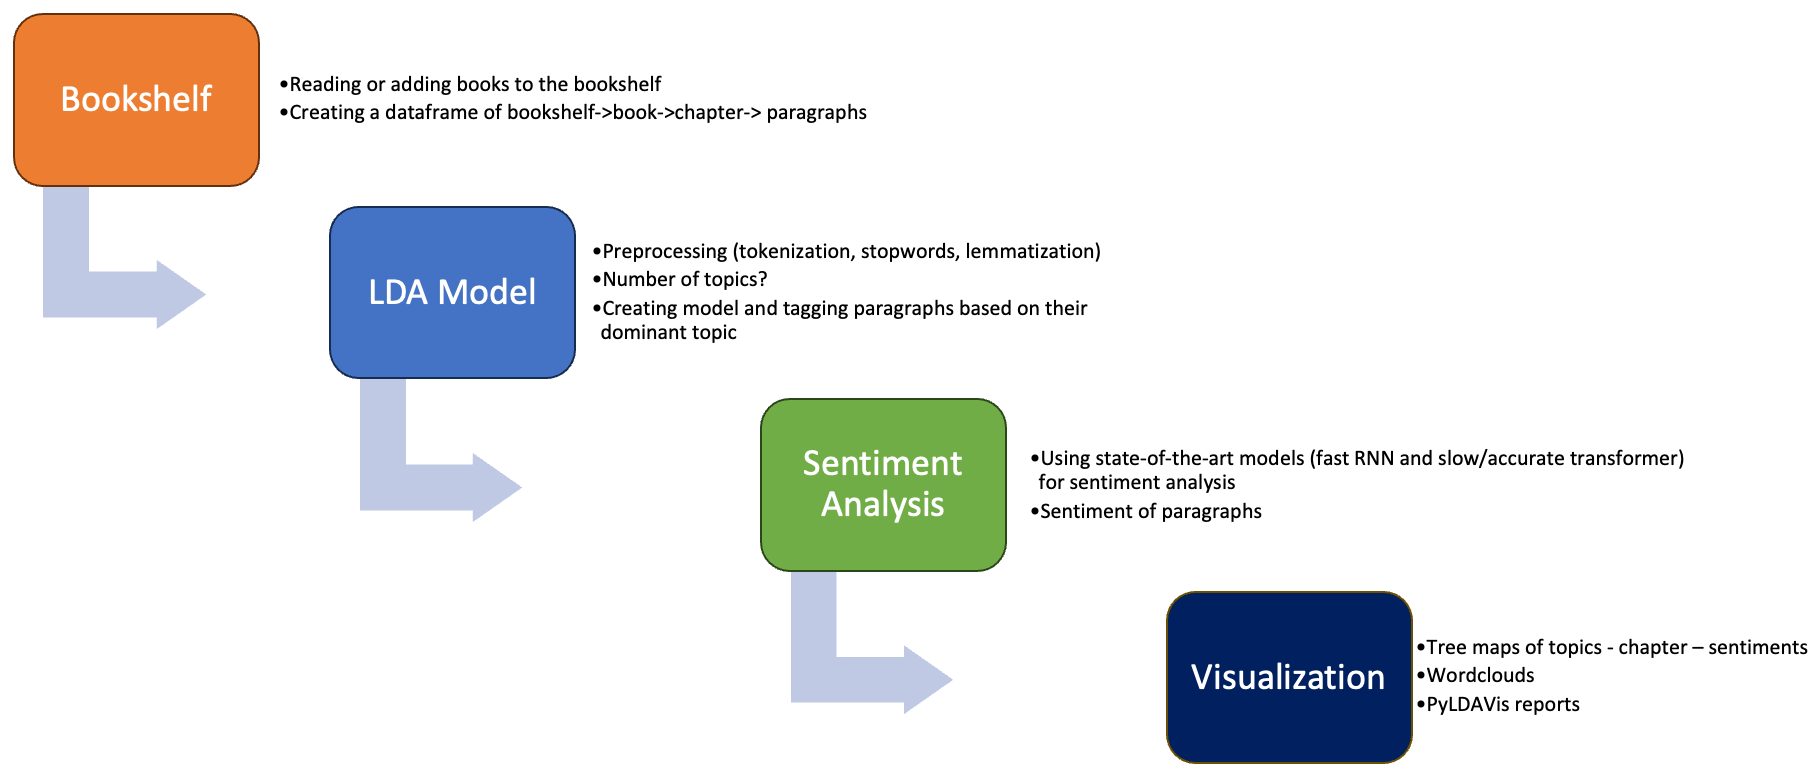

## Dependencies
- pandas
- gensim
- matplotlib
- seaborn
- pyLDAvis
- flair
- spacy (run: 'python -m spacy download en_core_web_md' after installation)
- wordcloud

## Setup

Loading the custom classes and other dependencies

In [1]:
# dependencies
import spacy

# Load English tokenizer, tagger, parser and NER
nlp = spacy.load("en_core_web_md")

# custom classes
from book import BookShelf
from lda import LDAModel
from sentiment import Sentiment
from vis import Vis

## Bookshelf
Creating a default bookshelf containing the five books - note that you can add books to bookshelf if you want it is needed in the future. Just check the implementation of the bookshelf and how the five books are already added there.

Process:
1. reading the books in bookshelf and creatign the trimmed version, finding parts and paragraphs in each part.
2. creating the dataframe for a selected book or all of them


In [2]:
bookshelf = BookShelf.read_menopause_books()

INFO:root:Bookshelf: - start checking the book files
INFO:root:		text are trimmed - Hormone Repair Manual
INFO:root:		10 parts are identified
INFO:root:		paragraphs are identified, total number of paragraphs in this book: 1157

INFO:root:	Hormone Repair Manual is preprocessed...
INFO:root:		text are trimmed - Next Level
INFO:root:		19 parts are identified
INFO:root:		paragraphs are identified, total number of paragraphs in this book: 981

INFO:root:	Next Level is preprocessed...
INFO:root:		text are trimmed - Queen Menopause
INFO:root:		12 parts are identified
INFO:root:		paragraphs are identified, total number of paragraphs in this book: 924

INFO:root:	Queen Menopause is preprocessed...
INFO:root:		text are trimmed - The Menopause Manifesto
INFO:root:		30 parts are identified
INFO:root:		paragraphs are identified, total number of paragraphs in this book: 1214

INFO:root:	The Menopause Manifesto is preprocessed...
INFO:root:		text are trimmed - Menopausing
INFO:root:		15 parts are ide

In [3]:
all_book_df = bookshelf.create_corpus_df()  # create a dataframe for all the books in the bookshelf

In [4]:
all_book_df.head()  # showing first five records

book  chapter  paragraph_number  \
0  Hormone Repair Manual        1                 1   
1  Hormone Repair Manual        1                 2   
2  Hormone Repair Manual        1                 3   
3  Hormone Repair Manual        1                 4   
4  Hormone Repair Manual        1                 5   

                                           paragraph  
0  Hormone revolution:\n\n\n\n\n\nwhy everything ...  
1  This book is about both the process of perimen...  
2  First, understand that symptoms (if you experi...  
3  Next, understand that perimenopause is not jus...  
4  Finally, know that perimenopause and the early...

## LDA Model

Process:

1. Creating a LDAModel object and passing the dataframe of books into it. 
2. Preprocessing the text in the paragraphs
3. Creating a bag-of-word representation 
4. Checking the coherence measures to find optimum numbers of topics
5. Creating the LDA model using optimum number of topics
6. Label the paragraphs based on dominant topic and its precentage of contributions 

In [5]:
lda_model = LDAModel(all_book_df)

In [6]:
custom_stopwords = ['women', 'woman', 'menopause', "it's", 'something', "you're", "you\'re", 'same', "i'm", "i\'m", 
                   'too', 'then', 'those', 'still', 'including', 'include', 'no', "'", "\'", "i've", "i\'ve", 
                    "you've", "you\'ve", "don't", "don\'t", "doesn't", "doesn\'t", "isn\'t", "can\'t", "didn\'t",
                    "i\'d", "isn't", "can't", "didn't", "said", "i'd", "final", "doing", "give", "gave", "through", "put",
                   "got", "get", "sure", "d", "g", "b", "s", "we'll", "\'", '"', "`", '\"', "\`"]
lda_model.preprocess(custom_stopwords=custom_stopwords)  # potential arguments should be discuss here

<>:5: DeprecationWarning: invalid escape sequence '\`'
<>:5: DeprecationWarning: invalid escape sequence '\`'
/var/folders/bf/z6l3vp3n7q3blbd3jscjftl00000gn/T/ipykernel_4468/883007784.py:5: DeprecationWarning: invalid escape sequence '\`'
  "got", "get", "sure", "d", "g", "b", "s", "we'll", "\'", '"', "`", '\"', "\`"]
INFO:root:Calling preprocessing in LDA model:

INFO:root:Preprocessor initiated...
INFO:root:	stopwords length (standard): 326
INFO:root:	stopwords length: 381
INFO:root:	All paragraph are normalized by removing unwanted characters
INFO:root:	tokenization and initial preprocessing is done
INFO:root:	word count is done:
INFO:root:		{'hormone': 519, 'different': 272, 'book': 232, 'feel': 666, 'body': 887, 'life': 480, 'things': 271, 'early': 205, 'brain': 445, 'time': 770, 'change': 230, 'called': 273, 'perimenopause': 448, 'years': 654, 'periods': 343, 'year': 198, 'period': 347, 'need': 802, 'important': 380, 'new': 243, 'chapter': 509, 'symptoms': 1021, 'experience': 249

preprocessing workflow started...


INFO:gensim.models.phrases:collected 159094 token types (unigram + bigrams) from a corpus of 179181 words and 5460 sentences
INFO:gensim.models.phrases:merged Phrases<159094 vocab, min_count=5, threshold=100, max_vocab_size=40000000>
INFO:gensim.utils:Phrases lifecycle event {'msg': 'built Phrases<159094 vocab, min_count=5, threshold=100, max_vocab_size=40000000> in 0.32s', 'datetime': '2023-06-11T21:10:30.132082', 'gensim': '4.3.1', 'python': '3.11.3 (main, May 15 2023, 10:43:03) [Clang 14.0.6 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'created'}
INFO:gensim.models.phrases:exporting phrases from Phrases<157710 vocab, min_count=5, threshold=100, max_vocab_size=40000000>
INFO:gensim.utils:FrozenPhrases lifecycle event {'msg': 'exported FrozenPhrases<422 phrases, min_count=5, threshold=100> from Phrases<157710 vocab, min_count=5, threshold=100, max_vocab_size=40000000> in 0.16s', 'datetime': '2023-06-11T21:10:30.288432', 'gensim': '4.3.1', 'python': '3.11.3 (main, May 15 2

In [7]:
lda_model.create_bow_model() # potential arguments should be discuss here

INFO:gensim.corpora.dictionary:adding document #0 to Dictionary<0 unique tokens: []>
INFO:gensim.corpora.dictionary:built Dictionary<4601 unique tokens: ['begins', 'changing', 'event', 'forties', 'frustrating']...> from 5460 documents (total 111665 corpus positions)
INFO:gensim.utils:Dictionary lifecycle event {'msg': "built Dictionary<4601 unique tokens: ['begins', 'changing', 'event', 'forties', 'frustrating']...> from 5460 documents (total 111665 corpus positions)", 'datetime': '2023-06-11T21:10:30.795982', 'gensim': '4.3.1', 'python': '3.11.3 (main, May 15 2023, 10:43:03) [Clang 14.0.6 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'created'}
INFO:gensim.corpora.dictionary:discarding 601 tokens: [('revolution', 5), ('teen', 5), ("''i", 4), ('rita', 4), ('detect', 5), ('mosconi', 4), ('neurosteroid', 5), ('conjugated', 4), ('permission', 5), ('sonia', 4)]...
INFO:gensim.corpora.dictionary:keeping 4000 tokens which were in no less than 5 and no more than 1092000 (=20000.0%

INFO:gensim.models.ldamodel:using symmetric alpha at 1.0
INFO:gensim.models.ldamodel:using symmetric eta at 1.0
INFO:gensim.models.ldamodel:using serial LDA version on this node
INFO:gensim.models.ldamulticore:running online LDA training, 1 topics, 10 passes over the supplied corpus of 5460 documents, updating every 16000 documents, evaluating every ~5460 documents, iterating 10x with a convergence threshold of 0.001000
INFO:gensim.models.ldamulticore:training LDA model using 8 processes
INFO:gensim.models.ldamulticore:PROGRESS: pass 0, dispatched chunk #0 = documents up to #2000/5460, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 0, dispatched chunk #1 = documents up to #4000/5460, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 0, dispatched chunk #2 = documents up to #5460/5460, outstanding queue size 3
INFO:gensim.models.ldamodel:topic #0 (1.000): 0.002*"effect" + 0.002*"longer" + 0.002*"osteoporosis" + 0.002*"natural" + 0.002*"supp

INFO:gensim.models.ldamodel:topic diff=0.000005, rho=0.280276
INFO:gensim.models.ldamodel:-7.935 per-word bound, 244.7 perplexity estimate based on a held-out corpus of 1460 documents with 25389 words
INFO:gensim.utils:LdaMulticore lifecycle event {'msg': 'trained LdaMulticore<num_terms=4000, num_topics=1, decay=0.5, chunksize=2000> in 3.60s', 'datetime': '2023-06-11T21:10:34.456318', 'gensim': '4.3.1', 'python': '3.11.3 (main, May 15 2023, 10:43:03) [Clang 14.0.6 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'created'}
INFO:gensim.topic_coherence.probability_estimation:using ParallelWordOccurrenceAccumulator<processes=7, batch_size=64> to estimate probabilities from sliding windows
INFO:gensim.topic_coherence.text_analysis:7 accumulators retrieved from output queue
INFO:gensim.topic_coherence.text_analysis:accumulated word occurrence stats for 5505 virtual documents
INFO:gensim.models.ldamodel:using symmetric alpha at 0.5
INFO:gensim.models.ldamodel:using symmetric eta at 

INFO:gensim.models.ldamodel:topic diff=0.090251, rho=0.320585
INFO:gensim.models.ldamodel:-7.940 per-word bound, 245.6 perplexity estimate based on a held-out corpus of 1460 documents with 25389 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 7, dispatched chunk #0 = documents up to #2000/5460, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 7, dispatched chunk #1 = documents up to #4000/5460, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 7, dispatched chunk #2 = documents up to #5460/5460, outstanding queue size 3
INFO:gensim.models.ldamodel:topic #0 (0.500): 0.003*"talk" + 0.002*"thought" + 0.002*"bit" + 0.002*"times" + 0.002*"support" + 0.002*"remember" + 0.002*"hard" + 0.002*"thing" + 0.002*"story" + 0.002*"come"
INFO:gensim.models.ldamodel:topic #1 (0.500): 0.003*"estradiol" + 0.003*"products" + 0.003*"depression" + 0.003*"natural" + 0.002*"longer" + 0.002*"effect" + 0.002*"supplements" + 0.002*"associated" + 0.002*"normal" + 

INFO:gensim.models.ldamulticore:PROGRESS: pass 3, dispatched chunk #0 = documents up to #2000/5460, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 3, dispatched chunk #1 = documents up to #4000/5460, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 3, dispatched chunk #2 = documents up to #5460/5460, outstanding queue size 3
INFO:gensim.models.ldamodel:topic #0 (0.333): 0.003*"talk" + 0.002*"times" + 0.002*"bit" + 0.002*"understand" + 0.002*"story" + 0.002*"thought" + 0.002*"thing" + 0.002*"support" + 0.002*"hard" + 0.002*"fact"
INFO:gensim.models.ldamodel:topic #1 (0.333): 0.003*"longer" + 0.002*"normal" + 0.002*"natural" + 0.002*"ovaries" + 0.002*"hard" + 0.002*"water" + 0.002*"possible" + 0.002*"strength" + 0.002*"eat" + 0.002*"care"
INFO:gensim.models.ldamodel:topic #2 (0.333): 0.003*"supplements" + 0.003*"effect" + 0.003*"osteoporosis" + 0.003*"effective" + 0.003*"depression" + 0.003*"estradiol" + 0.003*"products" + 0.003*"medication

INFO:gensim.models.ldamodel:topic #2 (0.333): 0.004*"supplements" + 0.004*"osteoporosis" + 0.004*"estradiol" + 0.004*"effect" + 0.004*"effective" + 0.004*"depression" + 0.004*"products" + 0.004*"medications" + 0.003*"medication" + 0.003*"testosterone"
INFO:gensim.models.ldamodel:topic diff=0.096562, rho=0.280276
INFO:gensim.models.ldamodel:-7.897 per-word bound, 238.4 perplexity estimate based on a held-out corpus of 1460 documents with 25389 words
INFO:gensim.utils:LdaMulticore lifecycle event {'msg': 'trained LdaMulticore<num_terms=4000, num_topics=3, decay=0.5, chunksize=2000> in 9.43s', 'datetime': '2023-06-11T21:10:55.837980', 'gensim': '4.3.1', 'python': '3.11.3 (main, May 15 2023, 10:43:03) [Clang 14.0.6 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'created'}
INFO:gensim.topic_coherence.probability_estimation:using ParallelWordOccurrenceAccumulator<processes=7, batch_size=64> to estimate probabilities from sliding windows
INFO:gensim.topic_coherence.text_analysis:7 

INFO:gensim.models.ldamodel:topic #2 (0.250): 0.004*"effect" + 0.004*"products" + 0.004*"depression" + 0.003*"anxiety" + 0.003*"supplements" + 0.003*"effective" + 0.003*"magnesium" + 0.003*"estradiol" + 0.003*"osteoporosis" + 0.003*"medications"
INFO:gensim.models.ldamodel:topic #3 (0.250): 0.003*"factors" + 0.003*"associated" + 0.003*"osteoporosis" + 0.003*"condition" + 0.003*"inflammation" + 0.003*"supplements" + 0.003*"test" + 0.003*"means" + 0.003*"ovulation" + 0.002*"surgery"
INFO:gensim.models.ldamodel:topic diff=0.189252, rho=0.359675
INFO:gensim.models.ldamodel:-8.053 per-word bound, 265.5 perplexity estimate based on a held-out corpus of 1460 documents with 25389 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 5, dispatched chunk #0 = documents up to #2000/5460, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 5, dispatched chunk #1 = documents up to #4000/5460, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 5, dispatched ch

INFO:gensim.topic_coherence.probability_estimation:using ParallelWordOccurrenceAccumulator<processes=7, batch_size=64> to estimate probabilities from sliding windows
INFO:gensim.topic_coherence.text_analysis:7 accumulators retrieved from output queue
INFO:gensim.topic_coherence.text_analysis:accumulated word occurrence stats for 5505 virtual documents
INFO:gensim.models.ldamodel:using symmetric alpha at 0.2
INFO:gensim.models.ldamodel:using symmetric eta at 0.2
INFO:gensim.models.ldamodel:using serial LDA version on this node
INFO:gensim.models.ldamulticore:running online LDA training, 5 topics, 10 passes over the supplied corpus of 5460 documents, updating every 16000 documents, evaluating every ~5460 documents, iterating 10x with a convergence threshold of 0.001000
INFO:gensim.models.ldamulticore:training LDA model using 8 processes
INFO:gensim.models.ldamulticore:PROGRESS: pass 0, dispatched chunk #0 = documents up to #2000/5460, outstanding queue size 1
INFO:gensim.models.ldamultic

INFO:gensim.models.ldamodel:topic #2 (0.200): 0.005*"products" + 0.005*"estradiol" + 0.004*"effect" + 0.004*"effective" + 0.004*"supplements" + 0.004*"depression" + 0.004*"magnesium" + 0.004*"anxiety" + 0.003*"data" + 0.003*"osteoporosis"
INFO:gensim.models.ldamodel:topic #3 (0.200): 0.004*"test" + 0.004*"factors" + 0.004*"osteoporosis" + 0.003*"condition" + 0.003*"supplements" + 0.003*"associated" + 0.003*"alcohol" + 0.003*"histamine" + 0.003*"iron" + 0.003*"supplement"
INFO:gensim.models.ldamodel:topic #4 (0.200): 0.005*"sugar" + 0.004*"muscles" + 0.004*"gut" + 0.004*"water" + 0.003*"inflammation" + 0.002*"means" + 0.002*"cells" + 0.002*"step" + 0.002*"gain" + 0.002*"calories"
INFO:gensim.models.ldamodel:topic diff=0.228475, rho=0.359675
INFO:gensim.models.ldamodel:-8.101 per-word bound, 274.6 perplexity estimate based on a held-out corpus of 1460 documents with 25389 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 5, dispatched chunk #0 = documents up to #2000/5460, outstanding

INFO:gensim.models.ldamodel:topic #1 (0.200): 0.004*"longer" + 0.004*"word" + 0.004*"medicine" + 0.004*"grams" + 0.004*"eat" + 0.003*"eating" + 0.003*"average" + 0.003*"natural" + 0.003*"meaning" + 0.003*"bladder"
INFO:gensim.models.ldamodel:topic #2 (0.200): 0.006*"estradiol" + 0.006*"products" + 0.006*"effective" + 0.005*"effect" + 0.005*"depression" + 0.005*"supplements" + 0.004*"medication" + 0.004*"data" + 0.004*"medications" + 0.004*"pill"
INFO:gensim.models.ldamodel:topic #3 (0.200): 0.005*"test" + 0.005*"factors" + 0.005*"osteoporosis" + 0.004*"condition" + 0.004*"alcohol" + 0.004*"associated" + 0.004*"conditions" + 0.004*"iron" + 0.003*"ovaries" + 0.003*"consider"
INFO:gensim.models.ldamodel:topic #4 (0.200): 0.007*"muscles" + 0.007*"sugar" + 0.005*"gut" + 0.005*"strength" + 0.004*"water" + 0.003*"helps" + 0.003*"minutes" + 0.003*"inflammation" + 0.003*"lifting" + 0.003*"recovery"
INFO:gensim.models.ldamodel:topic diff=0.163945, rho=0.280276
INFO:gensim.models.ldamodel:-7.965 

INFO:gensim.models.ldamodel:topic #0 (0.167): 0.004*"bit" + 0.003*"story" + 0.003*"thing" + 0.003*"went" + 0.003*"times" + 0.003*"she's" + 0.003*"young" + 0.003*"kind" + 0.003*"thought" + 0.003*"hard"
INFO:gensim.models.ldamodel:topic #5 (0.167): 0.005*"talk" + 0.004*"osteoporosis" + 0.003*"remember" + 0.003*"means" + 0.003*"estradiol" + 0.003*"impact" + 0.003*"fsh" + 0.002*"poi" + 0.002*"negative" + 0.002*"anxiety"
INFO:gensim.models.ldamodel:topic diff=0.277977, rho=0.385472
INFO:gensim.models.ldamodel:-8.240 per-word bound, 302.3 perplexity estimate based on a held-out corpus of 1460 documents with 25389 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 4, dispatched chunk #0 = documents up to #2000/5460, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 4, dispatched chunk #1 = documents up to #4000/5460, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 4, dispatched chunk #2 = documents up to #5460/5460, outstanding queue size 3
INFO

INFO:gensim.models.ldamodel:topic #1 (0.167): 0.006*"eat" + 0.006*"eating" + 0.004*"calories" + 0.004*"grams" + 0.004*"longer" + 0.004*"fiber" + 0.004*"recovery" + 0.004*"natural" + 0.003*"water" + 0.003*"lose"
INFO:gensim.models.ldamodel:topic #2 (0.167): 0.006*"effective" + 0.006*"effect" + 0.006*"products" + 0.006*"estradiol" + 0.005*"depression" + 0.005*"testosterone" + 0.005*"pill" + 0.005*"medication" + 0.005*"medications" + 0.005*"oral"
INFO:gensim.models.ldamodel:topic diff=0.219913, rho=0.291979
INFO:gensim.models.ldamodel:-8.025 per-word bound, 260.4 perplexity estimate based on a held-out corpus of 1460 documents with 25389 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 9, dispatched chunk #0 = documents up to #2000/5460, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 9, dispatched chunk #1 = documents up to #4000/5460, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 9, dispatched chunk #2 = documents up to #5460/5460, o

INFO:gensim.models.ldamodel:topic diff=0.314679, rho=0.417756
INFO:gensim.models.ldamodel:-8.384 per-word bound, 334.1 perplexity estimate based on a held-out corpus of 1460 documents with 25389 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 3, dispatched chunk #0 = documents up to #2000/5460, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 3, dispatched chunk #1 = documents up to #4000/5460, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 3, dispatched chunk #2 = documents up to #5460/5460, outstanding queue size 3
INFO:gensim.models.ldamodel:topic #3 (0.143): 0.004*"factors" + 0.004*"iron" + 0.004*"histamine" + 0.004*"associated" + 0.003*"alcohol" + 0.003*"improve" + 0.003*"supplements" + 0.003*"condition" + 0.003*"effective" + 0.003*"cholesterol"
INFO:gensim.models.ldamodel:topic #2 (0.143): 0.005*"effect" + 0.005*"magnesium" + 0.004*"effective" + 0.004*"depression" + 0.004*"pill" + 0.004*"available" + 0.004*"option" + 0.004*"sup

INFO:gensim.models.ldamodel:topic diff=0.279305, rho=0.305281
INFO:gensim.models.ldamodel:-8.090 per-word bound, 272.5 perplexity estimate based on a held-out corpus of 1460 documents with 25389 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 8, dispatched chunk #0 = documents up to #2000/5460, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 8, dispatched chunk #1 = documents up to #4000/5460, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 8, dispatched chunk #2 = documents up to #5460/5460, outstanding queue size 3
INFO:gensim.models.ldamodel:topic #5 (0.143): 0.007*"osteoporosis" + 0.004*"poi" + 0.004*"talk" + 0.004*"word" + 0.003*"concerns" + 0.003*"care" + 0.003*"data" + 0.003*"negative" + 0.003*"year" + 0.003*"depression"
INFO:gensim.models.ldamodel:topic #3 (0.143): 0.005*"factors" + 0.005*"associated" + 0.005*"iron" + 0.004*"histamine" + 0.004*"condition" + 0.004*"alcohol" + 0.004*"uterus" + 0.004*"test" + 0.004*"improve" + 0

INFO:gensim.models.ldamulticore:PROGRESS: pass 2, dispatched chunk #1 = documents up to #4000/5460, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 2, dispatched chunk #2 = documents up to #5460/5460, outstanding queue size 3
INFO:gensim.models.ldamodel:topic #6 (0.125): 0.005*"estradiol" + 0.004*"products" + 0.004*"supplements" + 0.003*"eat" + 0.003*"months" + 0.003*"means" + 0.003*"conditions" + 0.002*"eating" + 0.002*"helps" + 0.002*"looking"
INFO:gensim.models.ldamodel:topic #1 (0.125): 0.004*"longer" + 0.003*"hard" + 0.003*"tell" + 0.003*"depression" + 0.003*"treatments" + 0.003*"natural" + 0.002*"bit" + 0.002*"normal" + 0.002*"hear" + 0.002*"weeks"
INFO:gensim.models.ldamodel:topic #0 (0.125): 0.004*"bit" + 0.003*"thing" + 0.003*"story" + 0.003*"went" + 0.003*"support" + 0.003*"times" + 0.003*"partner" + 0.002*"she's" + 0.002*"hard" + 0.002*"beautiful"
INFO:gensim.models.ldamodel:topic #4 (0.125): 0.005*"sugar" + 0.003*"gain" + 0.003*"gut" + 0.003*"step" +

INFO:gensim.models.ldamulticore:PROGRESS: pass 7, dispatched chunk #0 = documents up to #2000/5460, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 7, dispatched chunk #1 = documents up to #4000/5460, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 7, dispatched chunk #2 = documents up to #5460/5460, outstanding queue size 3
INFO:gensim.models.ldamodel:topic #2 (0.125): 0.006*"effect" + 0.006*"effective" + 0.006*"medications" + 0.005*"oral" + 0.005*"depression" + 0.005*"medication" + 0.005*"available" + 0.005*"pill" + 0.005*"magnesium" + 0.005*"option"
INFO:gensim.models.ldamodel:topic #6 (0.125): 0.008*"products" + 0.007*"eat" + 0.006*"estradiol" + 0.005*"supplements" + 0.005*"milk" + 0.004*"calcium" + 0.004*"eating" + 0.004*"gut" + 0.004*"bacteria" + 0.004*"fructose"
INFO:gensim.models.ldamodel:topic #4 (0.125): 0.007*"muscles" + 0.006*"sugar" + 0.005*"lifting" + 0.004*"minutes" + 0.004*"strength" + 0.004*"floor" + 0.004*"calories" + 0.

INFO:gensim.models.ldamodel:topic #4 (0.111): 0.004*"sugar" + 0.003*"associated" + 0.003*"step" + 0.003*"gain" + 0.003*"gut" + 0.002*"muscles" + 0.002*"medications" + 0.002*"inflammation" + 0.002*"water" + 0.002*"cells"
INFO:gensim.models.ldamodel:topic #0 (0.111): 0.003*"went" + 0.003*"bit" + 0.003*"thing" + 0.003*"story" + 0.002*"problem" + 0.002*"times" + 0.002*"testosterone" + 0.002*"she's" + 0.002*"kind" + 0.002*"great"
INFO:gensim.models.ldamodel:topic #8 (0.111): 0.003*"times" + 0.003*"bit" + 0.003*"come" + 0.003*"related" + 0.003*"osteoporosis" + 0.003*"fact" + 0.002*"anxiety" + 0.002*"depression" + 0.002*"older" + 0.002*"natural"
INFO:gensim.models.ldamodel:topic #3 (0.111): 0.004*"factors" + 0.003*"supplements" + 0.003*"iron" + 0.003*"helps" + 0.003*"histamine" + 0.002*"osteoporosis" + 0.002*"alcohol" + 0.002*"associated" + 0.002*"beneficial" + 0.002*"known"
INFO:gensim.models.ldamodel:topic #7 (0.111): 0.003*"natural" + 0.003*"support" + 0.003*"talk" + 0.003*"remember" + 0.0

INFO:gensim.models.ldamulticore:PROGRESS: pass 6, dispatched chunk #1 = documents up to #4000/5460, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 6, dispatched chunk #2 = documents up to #5460/5460, outstanding queue size 3
INFO:gensim.models.ldamodel:topic #8 (0.111): 0.005*"performance" + 0.005*"bit" + 0.004*"water" + 0.004*"heat" + 0.004*"sodium" + 0.004*"sweat" + 0.004*"desire" + 0.004*"come" + 0.004*"fluid" + 0.004*"aging"
INFO:gensim.models.ldamodel:topic #4 (0.111): 0.007*"muscles" + 0.006*"sugar" + 0.005*"inflammation" + 0.005*"gut" + 0.004*"lifting" + 0.004*"step" + 0.004*"floor" + 0.004*"strength" + 0.004*"cells" + 0.004*"arms"
INFO:gensim.models.ldamodel:topic #5 (0.111): 0.005*"talk" + 0.005*"osteoporosis" + 0.004*"test" + 0.004*"negative" + 0.004*"fsh" + 0.003*"remember" + 0.003*"mean" + 0.003*"data" + 0.003*"year" + 0.003*"anger"
INFO:gensim.models.ldamodel:topic #3 (0.111): 0.006*"factors" + 0.005*"osteoporosis" + 0.005*"histamine" + 0.005*"iron

INFO:gensim.models.ldamodel:topic #9 (0.100): 0.003*"associated" + 0.003*"longer" + 0.003*"hard" + 0.003*"testosterone" + 0.002*"times" + 0.002*"conditions" + 0.002*"sugar" + 0.002*"thing" + 0.002*"possible" + 0.002*"strength"
INFO:gensim.models.ldamodel:topic #7 (0.100): 0.003*"natural" + 0.003*"talk" + 0.002*"remember" + 0.002*"improve" + 0.002*"support" + 0.002*"effect" + 0.002*"helps" + 0.002*"associated" + 0.002*"issues" + 0.002*"making"
INFO:gensim.models.ldamodel:topic #1 (0.100): 0.003*"hard" + 0.002*"natural" + 0.002*"depression" + 0.002*"longer" + 0.002*"eat" + 0.002*"consider" + 0.002*"bit" + 0.002*"estradiol" + 0.002*"tell" + 0.002*"products"
INFO:gensim.models.ldamodel:topic #3 (0.100): 0.003*"factors" + 0.003*"supplements" + 0.002*"helps" + 0.002*"iron" + 0.002*"months" + 0.002*"histamine" + 0.002*"remember" + 0.002*"effective" + 0.002*"alcohol" + 0.002*"times"
INFO:gensim.models.ldamodel:topic diff=1.054680, rho=1.000000
INFO:gensim.models.ldamodel:-8.933 per-word bound,

INFO:gensim.models.ldamodel:topic #1 (0.100): 0.005*"fibroids" + 0.004*"grams" + 0.004*"treatments" + 0.004*"fluid" + 0.004*"longer" + 0.004*"natural" + 0.003*"normal" + 0.003*"eat" + 0.003*"bladder" + 0.003*"urine"
INFO:gensim.models.ldamodel:topic #8 (0.100): 0.007*"desire" + 0.005*"dryness" + 0.004*"sodium" + 0.004*"depression" + 0.004*"bit" + 0.004*"fact" + 0.003*"fog" + 0.003*"heat" + 0.003*"come" + 0.003*"related"
INFO:gensim.models.ldamodel:topic #5 (0.100): 0.006*"talk" + 0.005*"osteoporosis" + 0.005*"word" + 0.005*"care" + 0.004*"concerns" + 0.004*"fsh" + 0.004*"data" + 0.004*"means" + 0.003*"remember" + 0.003*"consider"
INFO:gensim.models.ldamodel:topic #7 (0.100): 0.004*"cardiovascular" + 0.004*"associated" + 0.004*"hpa_axis" + 0.004*"intake" + 0.004*"system" + 0.004*"condition" + 0.003*"increases" + 0.003*"activity" + 0.003*"state" + 0.003*"maintain"
INFO:gensim.models.ldamodel:topic diff=0.460569, rho=0.338449
INFO:gensim.models.ldamodel:-8.318 per-word bound, 319.1 perple

INFO:gensim.topic_coherence.text_analysis:7 accumulators retrieved from output queue
INFO:gensim.topic_coherence.text_analysis:accumulated word occurrence stats for 5505 virtual documents
INFO:gensim.models.ldamodel:using symmetric alpha at 0.09090909090909091
INFO:gensim.models.ldamodel:using symmetric eta at 0.09090909090909091
INFO:gensim.models.ldamodel:using serial LDA version on this node
INFO:gensim.models.ldamulticore:running online LDA training, 11 topics, 10 passes over the supplied corpus of 5460 documents, updating every 16000 documents, evaluating every ~5460 documents, iterating 10x with a convergence threshold of 0.001000
INFO:gensim.models.ldamulticore:training LDA model using 8 processes
INFO:gensim.models.ldamulticore:PROGRESS: pass 0, dispatched chunk #0 = documents up to #2000/5460, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 0, dispatched chunk #1 = documents up to #4000/5460, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROG

INFO:gensim.models.ldamodel:topic #4 (0.091): 0.006*"sugar" + 0.005*"floor" + 0.004*"step" + 0.004*"feet" + 0.004*"hips" + 0.004*"arms" + 0.004*"water" + 0.004*"muscles" + 0.004*"inflammation" + 0.004*"left"
INFO:gensim.models.ldamodel:topic #3 (0.091): 0.006*"iron" + 0.006*"factors" + 0.006*"histamine" + 0.005*"alcohol" + 0.004*"density" + 0.004*"osteoporosis" + 0.004*"function" + 0.003*"supplement" + 0.003*"bones" + 0.003*"consider"
INFO:gensim.models.ldamodel:topic #6 (0.091): 0.008*"estradiol" + 0.007*"products" + 0.005*"identical" + 0.005*"eat" + 0.004*"eating" + 0.004*"milk" + 0.004*"fructose" + 0.003*"contain" + 0.003*"product" + 0.003*"cream"
INFO:gensim.models.ldamodel:topic diff=0.527850, rho=0.359675
INFO:gensim.models.ldamodel:-8.414 per-word bound, 341.2 perplexity estimate based on a held-out corpus of 1460 documents with 25389 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 5, dispatched chunk #0 = documents up to #2000/5460, outstanding queue size 1
INFO:gensim.mod

INFO:gensim.models.ldamodel:topic #7 (0.091): 0.007*"natural" + 0.006*"hpa_axis" + 0.005*"system" + 0.005*"condition" + 0.004*"strategies" + 0.004*"state" + 0.004*"dementia" + 0.004*"reproductive" + 0.004*"result" + 0.004*"medicine"
INFO:gensim.models.ldamodel:topic #3 (0.091): 0.007*"factors" + 0.007*"iron" + 0.007*"alcohol" + 0.006*"histamine" + 0.005*"test" + 0.005*"density" + 0.004*"inflammation" + 0.004*"osteoporosis" + 0.004*"function" + 0.004*"supplement"
INFO:gensim.models.ldamodel:topic #1 (0.091): 0.008*"fibroids" + 0.007*"bladder" + 0.007*"grams" + 0.006*"normal" + 0.005*"pregnant" + 0.004*"eating" + 0.004*"hours" + 0.004*"treatments" + 0.004*"coffee" + 0.004*"urine"
INFO:gensim.models.ldamodel:topic diff=0.375084, rho=0.280276
INFO:gensim.models.ldamodel:-8.209 per-word bound, 295.8 perplexity estimate based on a held-out corpus of 1460 documents with 25389 words
INFO:gensim.utils:LdaMulticore lifecycle event {'msg': 'trained LdaMulticore<num_terms=4000, num_topics=11, deca

INFO:gensim.models.ldamodel:topic #6 (0.083): 0.007*"products" + 0.006*"estradiol" + 0.005*"eating" + 0.004*"months" + 0.004*"gut" + 0.003*"improve" + 0.003*"supplements" + 0.003*"active" + 0.003*"helps" + 0.003*"serving"
INFO:gensim.models.ldamodel:topic #0 (0.083): 0.005*"went" + 0.005*"desire" + 0.004*"bit" + 0.004*"story" + 0.004*"partner" + 0.004*"relationship" + 0.003*"young" + 0.003*"she's" + 0.003*"hard" + 0.003*"thing"
INFO:gensim.models.ldamodel:topic diff=0.583418, rho=0.385472
INFO:gensim.models.ldamodel:-8.576 per-word bound, 381.7 perplexity estimate based on a held-out corpus of 1460 documents with 25389 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 4, dispatched chunk #0 = documents up to #2000/5460, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 4, dispatched chunk #1 = documents up to #4000/5460, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 4, dispatched chunk #2 = documents up to #5460/5460, outstanding queue

INFO:gensim.models.ldamodel:topic #2 (0.083): 0.008*"medications" + 0.007*"effect" + 0.007*"oral" + 0.007*"pill" + 0.007*"medication" + 0.006*"testosterone" + 0.005*"effective" + 0.005*"option" + 0.005*"patch" + 0.005*"transdermal"
INFO:gensim.models.ldamodel:topic #1 (0.083): 0.006*"tell" + 0.005*"medicine" + 0.005*"today" + 0.005*"natural" + 0.004*"longer" + 0.004*"ancient" + 0.004*"stories" + 0.004*"care" + 0.004*"women's" + 0.004*"bladder"
INFO:gensim.models.ldamodel:topic diff=0.451314, rho=0.291979
INFO:gensim.models.ldamodel:-8.287 per-word bound, 312.5 perplexity estimate based on a held-out corpus of 1460 documents with 25389 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 9, dispatched chunk #0 = documents up to #2000/5460, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 9, dispatched chunk #1 = documents up to #4000/5460, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 9, dispatched chunk #2 = documents up to #5460/5460, o

INFO:gensim.models.ldamodel:topic #9 (0.077): 0.004*"testosterone" + 0.004*"associated" + 0.004*"longer" + 0.003*"poi" + 0.003*"gain" + 0.003*"possible" + 0.003*"away" + 0.003*"lifting" + 0.003*"hard" + 0.003*"meaning"
INFO:gensim.models.ldamodel:topic diff=0.628641, rho=0.417756
INFO:gensim.models.ldamodel:-8.737 per-word bound, 426.6 perplexity estimate based on a held-out corpus of 1460 documents with 25389 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 3, dispatched chunk #0 = documents up to #2000/5460, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 3, dispatched chunk #1 = documents up to #4000/5460, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 3, dispatched chunk #2 = documents up to #5460/5460, outstanding queue size 3
INFO:gensim.models.ldamodel:topic #0 (0.077): 0.005*"bit" + 0.005*"went" + 0.004*"she's" + 0.004*"story" + 0.004*"week" + 0.004*"relationship" + 0.003*"easy" + 0.003*"great" + 0.003*"kind" + 0.003*"young"


INFO:gensim.models.ldamodel:topic #0 (0.077): 0.006*"bit" + 0.006*"went" + 0.005*"she's" + 0.005*"story" + 0.005*"wanted" + 0.004*"hard" + 0.004*"easy" + 0.004*"partner" + 0.004*"great" + 0.004*"husband"
INFO:gensim.models.ldamodel:topic #12 (0.077): 0.012*"pill" + 0.007*"autoimmune" + 0.006*"progestin" + 0.006*"iud" + 0.006*"cent" + 0.005*"contraception" + 0.005*"migraines" + 0.005*"natural" + 0.005*"combined" + 0.005*"information"
INFO:gensim.models.ldamodel:topic diff=0.541442, rho=0.305281
INFO:gensim.models.ldamodel:-8.353 per-word bound, 326.9 perplexity estimate based on a held-out corpus of 1460 documents with 25389 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 8, dispatched chunk #0 = documents up to #2000/5460, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 8, dispatched chunk #1 = documents up to #4000/5460, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 8, dispatched chunk #2 = documents up to #5460/5460, outstanding 

INFO:gensim.models.ldamodel:topic #1 (0.071): 0.003*"hard" + 0.003*"eating" + 0.003*"medicine" + 0.003*"tell" + 0.003*"longer" + 0.002*"easy" + 0.002*"hear" + 0.002*"bit" + 0.002*"painful" + 0.002*"natural"
INFO:gensim.models.ldamodel:topic diff=0.635071, rho=0.459800
INFO:gensim.models.ldamodel:-8.957 per-word bound, 496.9 perplexity estimate based on a held-out corpus of 1460 documents with 25389 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 2, dispatched chunk #0 = documents up to #2000/5460, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 2, dispatched chunk #1 = documents up to #4000/5460, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 2, dispatched chunk #2 = documents up to #5460/5460, outstanding queue size 3
INFO:gensim.models.ldamodel:topic #9 (0.071): 0.005*"testosterone" + 0.005*"poi" + 0.004*"associated" + 0.004*"gain" + 0.004*"longer" + 0.004*"strength" + 0.003*"old" + 0.003*"walking" + 0.003*"earlier" + 0.003*"hard"

INFO:gensim.models.ldamodel:topic #2 (0.071): 0.008*"effective" + 0.007*"medications" + 0.007*"option" + 0.005*"medication" + 0.005*"available" + 0.005*"dhea" + 0.005*"oral" + 0.005*"specialist" + 0.005*"flashes" + 0.005*"patch"
INFO:gensim.models.ldamodel:topic diff=0.635898, rho=0.320585
INFO:gensim.models.ldamodel:-8.418 per-word bound, 342.1 perplexity estimate based on a held-out corpus of 1460 documents with 25389 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 7, dispatched chunk #0 = documents up to #2000/5460, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 7, dispatched chunk #1 = documents up to #4000/5460, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 7, dispatched chunk #2 = documents up to #5460/5460, outstanding queue size 3
INFO:gensim.models.ldamodel:topic #13 (0.071): 0.013*"depression" + 0.007*"months" + 0.007*"thought" + 0.006*"anxiety" + 0.006*"she's" + 0.005*"wanted" + 0.005*"starting" + 0.004*"run" + 0.004*"n

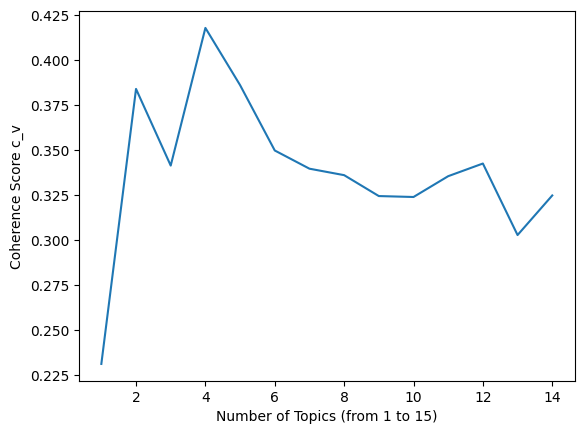

In [8]:
lda_model.plot_optimal_coherent_scores() # potential arguments should be discuss here

In [9]:
# number of topics = 4 based on the c_v measure
lda_model.create_lda_model(4)

INFO:gensim.models.ldamodel:using symmetric alpha at 0.25
INFO:gensim.models.ldamodel:using symmetric eta at 0.25
INFO:gensim.models.ldamodel:using serial LDA version on this node
INFO:gensim.models.ldamulticore:running online LDA training, 4 topics, 100 passes over the supplied corpus of 5460 documents, updating every 8000 documents, evaluating every ~5460 documents, iterating 100x with a convergence threshold of 0.001000
INFO:gensim.models.ldamulticore:training LDA model using 4 processes
INFO:gensim.models.ldamulticore:PROGRESS: pass 0, dispatched chunk #0 = documents up to #2000/5460, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 0, dispatched chunk #1 = documents up to #4000/5460, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 0, dispatched chunk #2 = documents up to #5460/5460, outstanding queue size 3
INFO:gensim.models.ldamodel:topic #0 (0.250): 0.004*"longer" + 0.003*"effect" + 0.003*"medication" + 0.003*"pill" + 0.002*"testos

INFO:gensim.models.ldamodel:topic #0 (0.250): 0.005*"testosterone" + 0.004*"estradiol" + 0.004*"effect" + 0.004*"medication" + 0.004*"pill" + 0.004*"longer" + 0.004*"gain" + 0.003*"depression" + 0.003*"oral" + 0.003*"conditions"
INFO:gensim.models.ldamodel:topic #1 (0.250): 0.004*"strength" + 0.003*"remember" + 0.003*"year" + 0.003*"partner" + 0.003*"desire" + 0.003*"times" + 0.003*"thing" + 0.003*"bit" + 0.003*"understand" + 0.002*"depression"
INFO:gensim.models.ldamodel:topic #2 (0.250): 0.004*"magnesium" + 0.004*"sugar" + 0.003*"uterus" + 0.003*"calcium" + 0.003*"osteoporosis" + 0.003*"alcohol" + 0.003*"tissue" + 0.003*"water" + 0.002*"fibroids" + 0.002*"estradiol"
INFO:gensim.models.ldamodel:topic #3 (0.250): 0.004*"products" + 0.004*"talk" + 0.003*"supplements" + 0.003*"vagina" + 0.003*"natural" + 0.003*"support" + 0.002*"medicine" + 0.002*"gut" + 0.002*"bladder" + 0.002*"effective"
INFO:gensim.models.ldamodel:topic diff=0.131784, rho=0.338449
INFO:gensim.models.ldamodel:-8.079 pe

INFO:gensim.models.ldamodel:topic diff=0.100654, rho=0.269876
INFO:gensim.models.ldamodel:-7.984 per-word bound, 253.2 perplexity estimate based on a held-out corpus of 1460 documents with 25389 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 11, dispatched chunk #0 = documents up to #2000/5460, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 11, dispatched chunk #1 = documents up to #4000/5460, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 11, dispatched chunk #2 = documents up to #5460/5460, outstanding queue size 3
INFO:gensim.models.ldamodel:topic #0 (0.250): 0.006*"testosterone" + 0.006*"estradiol" + 0.006*"depression" + 0.005*"effect" + 0.005*"medication" + 0.004*"pill" + 0.004*"gain" + 0.004*"oral" + 0.004*"conditions" + 0.003*"anxiety"
INFO:gensim.models.ldamodel:topic #1 (0.250): 0.004*"bit" + 0.004*"strength" + 0.003*"remember" + 0.003*"hard" + 0.003*"times" + 0.003*"partner" + 0.003*"thing" + 0.003*"thought" + 0.003*"wee

INFO:gensim.models.ldamodel:topic #2 (0.250): 0.005*"sugar" + 0.005*"magnesium" + 0.004*"alcohol" + 0.004*"inflammation" + 0.004*"eat" + 0.004*"osteoporosis" + 0.004*"gut" + 0.004*"calcium" + 0.003*"cells" + 0.003*"tissue"
INFO:gensim.models.ldamodel:topic #3 (0.250): 0.005*"products" + 0.005*"vagina" + 0.004*"medicine" + 0.004*"talk" + 0.004*"natural" + 0.004*"supplements" + 0.003*"care" + 0.003*"dryness" + 0.003*"product" + 0.003*"information"
INFO:gensim.models.ldamodel:topic diff=0.067171, rho=0.225132
INFO:gensim.models.ldamodel:-7.929 per-word bound, 243.8 perplexity estimate based on a held-out corpus of 1460 documents with 25389 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 17, dispatched chunk #0 = documents up to #2000/5460, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 17, dispatched chunk #1 = documents up to #4000/5460, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 17, dispatched chunk #2 = documents up to #5460/54

INFO:gensim.models.ldamulticore:PROGRESS: pass 22, dispatched chunk #1 = documents up to #4000/5460, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 22, dispatched chunk #2 = documents up to #5460/5460, outstanding queue size 3
INFO:gensim.models.ldamodel:topic #0 (0.250): 0.007*"estradiol" + 0.006*"depression" + 0.006*"testosterone" + 0.005*"effect" + 0.005*"medication" + 0.004*"pill" + 0.004*"associated" + 0.004*"conditions" + 0.004*"anxiety" + 0.004*"medications"
INFO:gensim.models.ldamodel:topic #1 (0.250): 0.004*"bit" + 0.004*"hard" + 0.004*"remember" + 0.003*"strength" + 0.003*"times" + 0.003*"thought" + 0.003*"thing" + 0.003*"muscles" + 0.003*"partner" + 0.003*"tell"
INFO:gensim.models.ldamodel:topic #2 (0.250): 0.005*"sugar" + 0.005*"magnesium" + 0.005*"alcohol" + 0.004*"inflammation" + 0.004*"eat" + 0.004*"gut" + 0.004*"supplements" + 0.004*"calcium" + 0.004*"cells" + 0.004*"eating"
INFO:gensim.models.ldamodel:topic #3 (0.250): 0.005*"products" + 0.005*

INFO:gensim.models.ldamodel:topic #3 (0.250): 0.005*"products" + 0.005*"vagina" + 0.004*"medicine" + 0.004*"natural" + 0.004*"dryness" + 0.004*"care" + 0.004*"supplements" + 0.004*"information" + 0.003*"product" + 0.003*"bladder"
INFO:gensim.models.ldamodel:topic diff=0.033479, rho=0.180393
INFO:gensim.models.ldamodel:-7.886 per-word bound, 236.6 perplexity estimate based on a held-out corpus of 1460 documents with 25389 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 28, dispatched chunk #0 = documents up to #2000/5460, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 28, dispatched chunk #1 = documents up to #4000/5460, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 28, dispatched chunk #2 = documents up to #5460/5460, outstanding queue size 3
INFO:gensim.models.ldamodel:topic #0 (0.250): 0.007*"estradiol" + 0.006*"depression" + 0.006*"testosterone" + 0.005*"effect" + 0.005*"medication" + 0.004*"pill" + 0.004*"associated" + 0.004*"

INFO:gensim.models.ldamodel:topic #0 (0.250): 0.007*"estradiol" + 0.006*"depression" + 0.006*"testosterone" + 0.005*"effect" + 0.005*"medication" + 0.004*"pill" + 0.004*"associated" + 0.004*"ovaries" + 0.004*"conditions" + 0.004*"osteoporosis"
INFO:gensim.models.ldamodel:topic #1 (0.250): 0.004*"bit" + 0.004*"hard" + 0.004*"thought" + 0.003*"remember" + 0.003*"times" + 0.003*"strength" + 0.003*"talk" + 0.003*"thing" + 0.003*"muscles" + 0.003*"partner"
INFO:gensim.models.ldamodel:topic #2 (0.250): 0.005*"sugar" + 0.005*"alcohol" + 0.005*"inflammation" + 0.005*"magnesium" + 0.005*"eat" + 0.004*"eating" + 0.004*"gut" + 0.004*"supplements" + 0.004*"cells" + 0.004*"improve"
INFO:gensim.models.ldamodel:topic #3 (0.250): 0.006*"products" + 0.005*"vagina" + 0.004*"medicine" + 0.004*"dryness" + 0.004*"natural" + 0.004*"information" + 0.004*"care" + 0.004*"supplements" + 0.004*"bladder" + 0.003*"product"
INFO:gensim.models.ldamodel:topic diff=0.024502, rho=0.165002
INFO:gensim.models.ldamodel:-7

INFO:gensim.models.ldamodel:topic diff=0.019454, rho=0.154802
INFO:gensim.models.ldamodel:-7.871 per-word bound, 234.1 perplexity estimate based on a held-out corpus of 1460 documents with 25389 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 39, dispatched chunk #0 = documents up to #2000/5460, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 39, dispatched chunk #1 = documents up to #4000/5460, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 39, dispatched chunk #2 = documents up to #5460/5460, outstanding queue size 3
INFO:gensim.models.ldamodel:topic #0 (0.250): 0.007*"estradiol" + 0.006*"depression" + 0.006*"testosterone" + 0.005*"effect" + 0.005*"medication" + 0.005*"associated" + 0.004*"pill" + 0.004*"ovaries" + 0.004*"osteoporosis" + 0.004*"conditions"
INFO:gensim.models.ldamodel:topic #1 (0.250): 0.004*"bit" + 0.004*"hard" + 0.004*"thought" + 0.003*"remember" + 0.003*"talk" + 0.003*"times" + 0.003*"thing" + 0.003*"strength" +

INFO:gensim.models.ldamodel:topic #1 (0.250): 0.004*"bit" + 0.004*"hard" + 0.004*"thought" + 0.004*"talk" + 0.003*"remember" + 0.003*"times" + 0.003*"thing" + 0.003*"muscles" + 0.003*"strength" + 0.003*"tell"
INFO:gensim.models.ldamodel:topic #2 (0.250): 0.006*"sugar" + 0.005*"alcohol" + 0.005*"inflammation" + 0.005*"eat" + 0.005*"magnesium" + 0.005*"eating" + 0.004*"gut" + 0.004*"supplements" + 0.004*"improve" + 0.004*"works"
INFO:gensim.models.ldamodel:topic #3 (0.250): 0.006*"products" + 0.005*"vagina" + 0.005*"medicine" + 0.004*"information" + 0.004*"dryness" + 0.004*"natural" + 0.004*"care" + 0.004*"bladder" + 0.004*"product" + 0.004*"supplements"
INFO:gensim.models.ldamodel:topic diff=0.015424, rho=0.144745
INFO:gensim.models.ldamodel:-7.866 per-word bound, 233.3 perplexity estimate based on a held-out corpus of 1460 documents with 25389 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 45, dispatched chunk #0 = documents up to #2000/5460, outstanding queue size 1
INFO:gensim.

INFO:gensim.models.ldamulticore:PROGRESS: pass 50, dispatched chunk #0 = documents up to #2000/5460, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 50, dispatched chunk #1 = documents up to #4000/5460, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 50, dispatched chunk #2 = documents up to #5460/5460, outstanding queue size 3
INFO:gensim.models.ldamodel:topic #0 (0.250): 0.007*"estradiol" + 0.006*"depression" + 0.006*"testosterone" + 0.005*"effect" + 0.005*"osteoporosis" + 0.005*"medication" + 0.005*"ovaries" + 0.005*"associated" + 0.004*"pill" + 0.004*"conditions"
INFO:gensim.models.ldamodel:topic #1 (0.250): 0.004*"bit" + 0.004*"hard" + 0.004*"thought" + 0.004*"talk" + 0.003*"remember" + 0.003*"times" + 0.003*"thing" + 0.003*"muscles" + 0.003*"tell" + 0.003*"strength"
INFO:gensim.models.ldamodel:topic #2 (0.250): 0.006*"sugar" + 0.005*"inflammation" + 0.005*"alcohol" + 0.005*"eat" + 0.005*"magnesium" + 0.005*"eating" + 0.004*"gut" + 0

INFO:gensim.models.ldamodel:topic #2 (0.250): 0.006*"sugar" + 0.005*"inflammation" + 0.005*"alcohol" + 0.005*"eat" + 0.005*"magnesium" + 0.005*"eating" + 0.004*"gut" + 0.004*"supplements" + 0.004*"improve" + 0.004*"works"
INFO:gensim.models.ldamodel:topic #3 (0.250): 0.006*"products" + 0.005*"vagina" + 0.005*"medicine" + 0.004*"information" + 0.004*"dryness" + 0.004*"natural" + 0.004*"care" + 0.004*"bladder" + 0.004*"product" + 0.004*"supplements"
INFO:gensim.models.ldamodel:topic diff=0.010650, rho=0.130488
INFO:gensim.models.ldamodel:-7.859 per-word bound, 232.2 perplexity estimate based on a held-out corpus of 1460 documents with 25389 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 56, dispatched chunk #0 = documents up to #2000/5460, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 56, dispatched chunk #1 = documents up to #4000/5460, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 56, dispatched chunk #2 = documents up to #5460/

INFO:gensim.models.ldamulticore:PROGRESS: pass 61, dispatched chunk #2 = documents up to #5460/5460, outstanding queue size 3
INFO:gensim.models.ldamodel:topic #0 (0.250): 0.007*"estradiol" + 0.006*"depression" + 0.006*"testosterone" + 0.005*"osteoporosis" + 0.005*"effect" + 0.005*"medication" + 0.005*"ovaries" + 0.005*"associated" + 0.004*"pill" + 0.004*"factors"
INFO:gensim.models.ldamodel:topic #1 (0.250): 0.004*"bit" + 0.004*"hard" + 0.004*"talk" + 0.004*"thought" + 0.003*"remember" + 0.003*"times" + 0.003*"thing" + 0.003*"tell" + 0.003*"muscles" + 0.003*"partner"
INFO:gensim.models.ldamodel:topic #2 (0.250): 0.006*"sugar" + 0.005*"inflammation" + 0.005*"alcohol" + 0.005*"eat" + 0.005*"magnesium" + 0.005*"eating" + 0.004*"supplements" + 0.004*"gut" + 0.004*"improve" + 0.004*"helps"
INFO:gensim.models.ldamodel:topic #3 (0.250): 0.006*"products" + 0.005*"vagina" + 0.005*"medicine" + 0.004*"information" + 0.004*"dryness" + 0.004*"natural" + 0.004*"care" + 0.004*"bladder" + 0.004*"prod

INFO:gensim.models.ldamodel:topic #3 (0.250): 0.006*"products" + 0.005*"vagina" + 0.005*"medicine" + 0.004*"information" + 0.004*"dryness" + 0.004*"natural" + 0.004*"care" + 0.004*"bladder" + 0.004*"product" + 0.004*"supplements"
INFO:gensim.models.ldamodel:topic diff=0.007822, rho=0.119754
INFO:gensim.models.ldamodel:-7.854 per-word bound, 231.3 perplexity estimate based on a held-out corpus of 1460 documents with 25389 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 67, dispatched chunk #0 = documents up to #2000/5460, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 67, dispatched chunk #1 = documents up to #4000/5460, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 67, dispatched chunk #2 = documents up to #5460/5460, outstanding queue size 3
INFO:gensim.models.ldamodel:topic #0 (0.250): 0.007*"estradiol" + 0.006*"depression" + 0.006*"testosterone" + 0.006*"osteoporosis" + 0.005*"effect" + 0.005*"medication" + 0.005*"ovaries" + 0.

INFO:gensim.models.ldamodel:topic #0 (0.250): 0.007*"estradiol" + 0.006*"depression" + 0.006*"testosterone" + 0.006*"osteoporosis" + 0.005*"effect" + 0.005*"medication" + 0.005*"ovaries" + 0.004*"associated" + 0.004*"factors" + 0.004*"pill"
INFO:gensim.models.ldamodel:topic #1 (0.250): 0.004*"bit" + 0.004*"hard" + 0.004*"talk" + 0.004*"thought" + 0.003*"remember" + 0.003*"times" + 0.003*"thing" + 0.003*"tell" + 0.003*"muscles" + 0.003*"partner"
INFO:gensim.models.ldamodel:topic #2 (0.250): 0.006*"sugar" + 0.005*"inflammation" + 0.005*"alcohol" + 0.005*"eat" + 0.005*"eating" + 0.005*"magnesium" + 0.005*"supplements" + 0.005*"improve" + 0.005*"gut" + 0.004*"helps"
INFO:gensim.models.ldamodel:topic #3 (0.250): 0.006*"products" + 0.005*"vagina" + 0.005*"medicine" + 0.005*"information" + 0.004*"dryness" + 0.004*"natural" + 0.004*"care" + 0.004*"bladder" + 0.004*"product" + 0.004*"supplements"
INFO:gensim.models.ldamodel:topic diff=0.006649, rho=0.114912
INFO:gensim.models.ldamodel:-7.851 pe

INFO:gensim.models.ldamodel:topic diff=0.005858, rho=0.111297
INFO:gensim.models.ldamodel:-7.849 per-word bound, 230.6 perplexity estimate based on a held-out corpus of 1460 documents with 25389 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 78, dispatched chunk #0 = documents up to #2000/5460, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 78, dispatched chunk #1 = documents up to #4000/5460, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 78, dispatched chunk #2 = documents up to #5460/5460, outstanding queue size 3
INFO:gensim.models.ldamodel:topic #0 (0.250): 0.007*"estradiol" + 0.006*"depression" + 0.006*"testosterone" + 0.006*"osteoporosis" + 0.005*"effect" + 0.005*"medication" + 0.005*"ovaries" + 0.004*"associated" + 0.004*"factors" + 0.004*"pill"
INFO:gensim.models.ldamodel:topic #1 (0.250): 0.004*"bit" + 0.004*"hard" + 0.004*"talk" + 0.004*"thought" + 0.003*"remember" + 0.003*"thing" + 0.003*"times" + 0.003*"tell" + 0.003*

INFO:gensim.models.ldamodel:topic #1 (0.250): 0.004*"bit" + 0.004*"hard" + 0.004*"talk" + 0.004*"thought" + 0.003*"remember" + 0.003*"thing" + 0.003*"times" + 0.003*"tell" + 0.003*"come" + 0.003*"story"
INFO:gensim.models.ldamodel:topic #2 (0.250): 0.006*"sugar" + 0.005*"inflammation" + 0.005*"alcohol" + 0.005*"eat" + 0.005*"eating" + 0.005*"magnesium" + 0.005*"supplements" + 0.005*"improve" + 0.005*"gut" + 0.004*"helps"
INFO:gensim.models.ldamodel:topic #3 (0.250): 0.006*"products" + 0.005*"vagina" + 0.005*"medicine" + 0.005*"information" + 0.004*"dryness" + 0.004*"natural" + 0.004*"bladder" + 0.004*"care" + 0.004*"product" + 0.004*"supplements"
INFO:gensim.models.ldamodel:topic diff=0.005062, rho=0.107378
INFO:gensim.models.ldamodel:-7.848 per-word bound, 230.4 perplexity estimate based on a held-out corpus of 1460 documents with 25389 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 84, dispatched chunk #0 = documents up to #2000/5460, outstanding queue size 1
INFO:gensim.models

INFO:gensim.models.ldamulticore:PROGRESS: pass 89, dispatched chunk #0 = documents up to #2000/5460, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 89, dispatched chunk #1 = documents up to #4000/5460, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 89, dispatched chunk #2 = documents up to #5460/5460, outstanding queue size 3
INFO:gensim.models.ldamodel:topic #0 (0.250): 0.007*"estradiol" + 0.006*"depression" + 0.006*"osteoporosis" + 0.006*"testosterone" + 0.005*"effect" + 0.005*"medication" + 0.005*"ovaries" + 0.004*"associated" + 0.004*"factors" + 0.004*"pill"
INFO:gensim.models.ldamodel:topic #1 (0.250): 0.004*"bit" + 0.004*"hard" + 0.004*"talk" + 0.004*"thought" + 0.003*"remember" + 0.003*"thing" + 0.003*"times" + 0.003*"tell" + 0.003*"come" + 0.003*"story"
INFO:gensim.models.ldamodel:topic #2 (0.250): 0.006*"sugar" + 0.005*"inflammation" + 0.005*"alcohol" + 0.005*"eat" + 0.005*"eating" + 0.005*"magnesium" + 0.005*"improve" + 0.005*

INFO:gensim.models.ldamodel:topic #2 (0.250): 0.006*"sugar" + 0.005*"inflammation" + 0.005*"alcohol" + 0.005*"eat" + 0.005*"eating" + 0.005*"magnesium" + 0.005*"improve" + 0.005*"supplements" + 0.005*"gut" + 0.004*"helps"
INFO:gensim.models.ldamodel:topic #3 (0.250): 0.006*"products" + 0.005*"vagina" + 0.005*"medicine" + 0.005*"information" + 0.004*"dryness" + 0.004*"natural" + 0.004*"bladder" + 0.004*"care" + 0.004*"product" + 0.004*"supplements"
INFO:gensim.models.ldamodel:topic diff=0.004030, rho=0.101155
INFO:gensim.models.ldamodel:-7.846 per-word bound, 230.0 perplexity estimate based on a held-out corpus of 1460 documents with 25389 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 95, dispatched chunk #0 = documents up to #2000/5460, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 95, dispatched chunk #1 = documents up to #4000/5460, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 95, dispatched chunk #2 = documents up to #5460/

INFO:gensim.models.ldamodel:topic #0 (0.250): 0.007*"estradiol" + 0.006*"depression" + 0.006*"osteoporosis" + 0.006*"testosterone" + 0.005*"effect" + 0.005*"medication" + 0.005*"ovaries" + 0.004*"associated" + 0.004*"factors" + 0.004*"conditions"
INFO:gensim.models.ldamodel:topic #1 (0.250): 0.004*"bit" + 0.004*"hard" + 0.004*"talk" + 0.004*"thought" + 0.003*"remember" + 0.003*"thing" + 0.003*"times" + 0.003*"tell" + 0.003*"come" + 0.003*"story"
INFO:gensim.models.ldamodel:topic #2 (0.250): 0.006*"sugar" + 0.005*"inflammation" + 0.005*"alcohol" + 0.005*"eat" + 0.005*"eating" + 0.005*"magnesium" + 0.005*"improve" + 0.005*"supplements" + 0.005*"gut" + 0.004*"helps"
INFO:gensim.models.ldamodel:topic #3 (0.250): 0.006*"products" + 0.005*"vagina" + 0.005*"medicine" + 0.005*"information" + 0.004*"dryness" + 0.004*"natural" + 0.004*"bladder" + 0.004*"care" + 0.004*"product" + 0.004*"supplements"


In [10]:
# add topics to dataframe - for each paragraph
lda_model.format_topics_sentences()
lda_model.df.head()  # checking the first five records

INFO:root:using LDA model to label topics for paragraphs
INFO:root:tagging topics are done, check the dataframe in LDAModel object



book  chapter  paragraph_number  \
0  Hormone Repair Manual        1                 1   
1  Hormone Repair Manual        1                 2   
2  Hormone Repair Manual        1                 3   
3  Hormone Repair Manual        1                 4   
4  Hormone Repair Manual        1                 5   

                                           paragraph  \
0  Hormone revolution:\n\n\n\n\n\nwhy everything ...   
1  This book is about both the process of perimen...   
2  First, understand that symptoms (if you experi...   
3  Next, understand that perimenopause is not jus...   
4  Finally, know that perimenopause and the early...   

                                              tokens  \
0  [hormone, revolution, different, second, puber...   
1  [book, process, perimenopause, life, phase, co...   
2  [understand, symptoms, experience, likely, tem...   
3  [understand, perimenopause, chaotic, 'hormonal...   
4  [finally, know, perimenopause, early, years, c...   

                                           processed  dominant_topic  \
0  [revolution, second, picked, changing, maybe, ...               1   
1              [process, phase, decades, understand]               1   
2  [understand, temporary, perimenopausal, tempor...               1   
3  [understand, sequence_events, beginning, paire...               1   
4  [finally, critical_window, true, critical_wind...               0   

   perc_contribution                                     topic_keywords  
0             0.9560  bit, hard, talk, thought, remember, thing, tim...  
1             0.8350  bit, hard, talk, thought, remember, thing, tim...  
2             0.6070  bit, hard, talk, thought, remember, thing, tim...  
3             0.6010  bit, hard, talk, thought, remember, thing, tim...  
4             0.6495  estradiol, depression, osteoporosis, testoster...

In [11]:
all_lda_df = lda_model.df

## Sentiments
Extract the sentiments of each paragraph. Approach is very simple, when we segment the paragraph into sentences using Spacy library, then we predict sentiment of each sentence:
- if all neutral -> neutral
- if all positive -> positive
- if all negative -> negative
- if positive/negative > 1.5 -> positive
- if negative/positive > 1.5 -> negative
- else -> neutral

In [12]:
sentiment_model = Sentiment(all_lda_df)

In [13]:
# sentiment_model.predict()  # this will take some time to finish, be patient :) or load from precomputed one
sentiment_model.predict(load_from_file=True, file_name='out/sentiment.csv')  # if you want to re-run sentiment analysis comment this line and uncomemnt above

INFO:root:loading sentiments from already exported file:
	out/sentiment.csv
INFO:root:left join done and sentiments are loaded - check: 5460==5460?


In [14]:
sentiment_model.df.head()

book  chapter  paragraph_number  \
0  Hormone Repair Manual        1                 1   
1  Hormone Repair Manual        1                 2   
2  Hormone Repair Manual        1                 3   
3  Hormone Repair Manual        1                 4   
4  Hormone Repair Manual        1                 5   

                                           paragraph  \
0  Hormone revolution:\n\n\n\n\n\nwhy everything ...   
1  This book is about both the process of perimen...   
2  First, understand that symptoms (if you experi...   
3  Next, understand that perimenopause is not jus...   
4  Finally, know that perimenopause and the early...   

                                              tokens  \
0  [hormone, revolution, different, second, puber...   
1  [book, process, perimenopause, life, phase, co...   
2  [understand, symptoms, experience, likely, tem...   
3  [understand, perimenopause, chaotic, 'hormonal...   
4  [finally, know, perimenopause, early, years, c...   

                                           processed  dominant_topic  \
0  [revolution, second, picked, changing, maybe, ...               1   
1              [process, phase, decades, understand]               1   
2  [understand, temporary, perimenopausal, tempor...               1   
3  [understand, sequence_events, beginning, paire...               1   
4  [finally, critical_window, true, critical_wind...               0   

   perc_contribution                                     topic_keywords  \
0             0.9560  bit, hard, talk, thought, remember, thing, tim...   
1             0.8350  bit, hard, talk, thought, remember, thing, tim...   
2             0.6070  bit, hard, talk, thought, remember, thing, tim...   
3             0.6010  bit, hard, talk, thought, remember, thing, tim...   
4             0.6495  estradiol, depression, osteoporosis, testoster...   

  sentiment  
0  POSITIVE  
1  POSITIVE  
2  POSITIVE  
3  NEGATIVE  
4  POSITIVE

In [15]:
sentiment_model.export_to_csv()

INFO:root:file is writen successfully


## Visualization

Here, we generate a set of visualizations to help interpret:
- mixture of sentiments in each chapter of each book
- mixture of topics in each chapter of each book
- mixture of sentiments for each topic in each book
- topics and what they capture

In [16]:
vis = Vis(sentiment=sentiment_model, lda=lda_model)

In [17]:
vis.treemap_chapter_sentiments()  # treemap of chapter -> sentiments

INFO:root:chapter-sentiment treemap html file is saved in figures/chapter_sentiments.html


In [18]:
vis.treemap_chapter_topic()  # treemap of chapter -> topics

INFO:root:chapter-topic treemap html is saved in: 
	figures/chapter_topic.html


In [19]:
vis.treemap_topic_sentiment()  # treemap of topics -> sentiments

INFO:root:topic-sentiment treemap html is saved in: 
	figures/topic_sentiment.html


In [20]:
vis.pyviz_topics()  # pyVis topic analysis

INFO:root:pyvis html visualization is saved in: 
	figures/pyvis_topics.html


/Users/ehsanhamzei/opt/anaconda3/envs/lda_env/lib/python3.11/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.

INFO:root:wordclouds are generated and saved in:	figures/wordclouds.svg


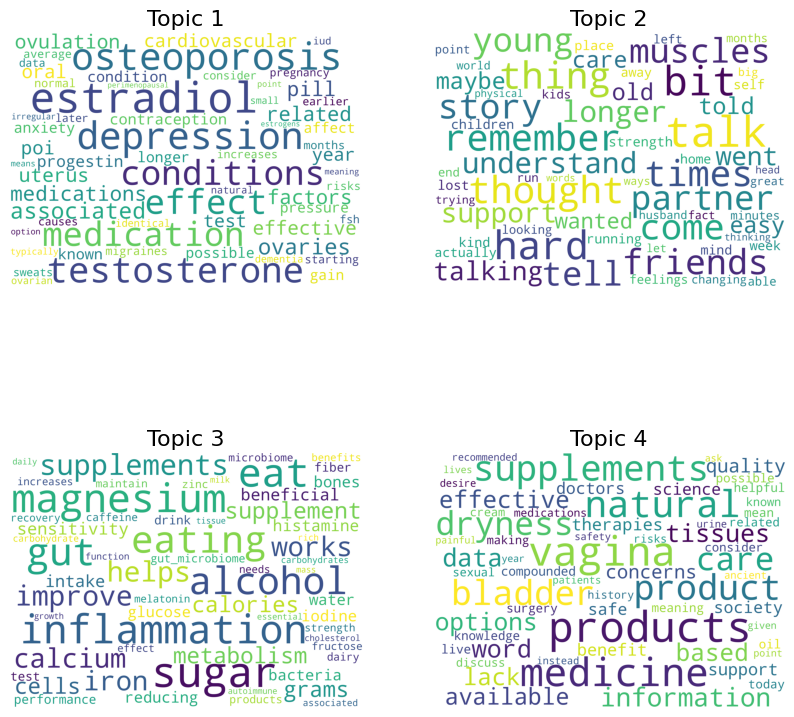

In [ ]:
vis.generate_topics_wordcloud()

## Per book
Performing topic modelling for each book:

1. Hormone Repair Manual
2. Next Level
3. Queen Menopause
4. The Menopause Manifesto
5. Menopausing

In [ ]:
hrp_book_name = 'Hormone Repair Manual'
nl_book_name = 'Next Level'
qm_book_name = 'Queen Menopause'
tmm_book_name = 'The Menopause Manifesto'
m_book_name = 'Menopausing'

### 1. Hormone Repair Manual

In [23]:
hrp_df = bookshelf.create_corpus_custom_df(hrp_book_name)
hrp_df.head()

index                   book  chapter  paragraph_number  \
0      0  Hormone Repair Manual        1                 1   
1      1  Hormone Repair Manual        1                 2   
2      2  Hormone Repair Manual        1                 3   
3      3  Hormone Repair Manual        1                 4   
4      4  Hormone Repair Manual        1                 5   

                                           paragraph  
0  Hormone revolution:\n\n\n\n\n\nwhy everything ...  
1  This book is about both the process of perimen...  
2  First, understand that symptoms (if you experi...  
3  Next, understand that perimenopause is not jus...  
4  Finally, know that perimenopause and the early...

INFO:root:Calling preprocessing in LDA model:

INFO:root:Preprocessor initiated...
INFO:root:	stopwords length (standard): 326
INFO:root:	stopwords length: 381
INFO:root:	All paragraph are normalized by removing unwanted characters
INFO:root:	tokenization and initial preprocessing is done
INFO:root:	word count is done:
INFO:root:		{'perimenopause': 219, 'need': 186, 'chapter': 251, 'symptoms': 301, 'progesterone': 367, 'high': 198, 'estrogen': 526, 'insulin': 280, 'pain': 192, 'risk': 211, 'doctor': 185, 'thyroid': 183, 'disease': 187, 'resistance': 211, 'healthy': 153}

INFO:gensim.models.phrases:collecting all words and their counts
INFO:gensim.models.phrases:PROGRESS: at sentence #0, processed 0 words and 0 word types
INFO:gensim.models.phrases:collected 33918 token types (unigram + bigrams) from a corpus of 38334 words and 1157 sentences
INFO:gensim.models.phrases:merged Phrases<33918 vocab, min_count=5, threshold=100, max_vocab_size=40000000>
INFO:gensim.utils:Phrases lifecycle ev

preprocessing workflow started...


INFO:gensim.utils:Dictionary lifecycle event {'msg': "built Dictionary<1404 unique tokens: ['begins', 'body', 'book', 'brain', 'called']...> from 1157 documents (total 25386 corpus positions)", 'datetime': '2023-06-11T21:16:56.143966', 'gensim': '4.3.1', 'python': '3.11.3 (main, May 15 2023, 10:43:03) [Clang 14.0.6 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'created'}
INFO:gensim.corpora.dictionary:discarding 108 tokens: [('autonomic', 1), ('sonia', 4), ('sympathetic', 4), ('thermoneutral_zone', 4), ('nervous', 3), ("women's", 1), ('blue_light', 3), ('dark', 4), ('lack', 4), ('lifestyle', 3)]...
INFO:gensim.corpora.dictionary:keeping 1296 tokens which were in no less than 5 and no more than 231400 (=20000.0%) documents
INFO:gensim.corpora.dictionary:resulting dictionary: Dictionary<1296 unique tokens: ['begins', 'body', 'book', 'brain', 'called']...>
INFO:root:Bag of word representations are constructed...
INFO:gensim.models.ldamodel:using symmetric alpha at 1.0
INFO:gen

INFO:gensim.models.ldamodel:topic #1 (0.500): 0.008*"need" + 0.008*"high" + 0.007*"pain" + 0.006*"disease" + 0.005*"low" + 0.005*"health" + 0.005*"magnesium" + 0.005*"thyroid" + 0.005*"brain" + 0.005*"healthy"
INFO:gensim.models.ldamodel:topic diff=0.607126, rho=1.000000
INFO:gensim.models.ldamodel:-7.014 per-word bound, 129.2 perplexity estimate based on a held-out corpus of 1157 documents with 24942 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 1, dispatched chunk #0 = documents up to #1157/1157, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.500): 0.009*"disease" + 0.009*"thyroid" + 0.009*"pain" + 0.007*"high" + 0.006*"sleep" + 0.006*"cause" + 0.005*"mood" + 0.005*"doctor" + 0.005*"need" + 0.005*"period"
INFO:gensim.models.ldamodel:topic #1 (0.500): 0.009*"need" + 0.008*"high" + 0.006*"pain" + 0.006*"magnesium" + 0.006*"health" + 0.006*"low" + 0.005*"disease" + 0.005*"healthy" + 0.005*"brain" + 0.005*"like"
INFO:gensim.models.ldamodel:topic diff=0.086605, rh

INFO:gensim.models.ldamulticore:training LDA model using 8 processes
INFO:gensim.models.ldamulticore:PROGRESS: pass 0, dispatched chunk #0 = documents up to #1157/1157, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.333): 0.009*"thyroid" + 0.009*"disease" + 0.008*"high" + 0.008*"pain" + 0.005*"need" + 0.005*"brain" + 0.005*"healthy" + 0.005*"cause" + 0.005*"sleep" + 0.005*"treatment"
INFO:gensim.models.ldamodel:topic #1 (0.333): 0.008*"need" + 0.008*"pain" + 0.008*"high" + 0.006*"disease" + 0.006*"health" + 0.006*"brain" + 0.006*"thyroid" + 0.005*"low" + 0.005*"healthy" + 0.005*"period"
INFO:gensim.models.ldamodel:topic #2 (0.333): 0.007*"high" + 0.006*"need" + 0.006*"disease" + 0.006*"sleep" + 0.006*"pain" + 0.006*"magnesium" + 0.005*"cause" + 0.005*"like" + 0.005*"doctor" + 0.005*"low"
INFO:gensim.models.ldamodel:topic diff=0.628564, rho=1.000000
INFO:gensim.models.ldamodel:-7.157 per-word bound, 142.8 perplexity estimate based on a held-out corpus of 1157 documents

INFO:gensim.models.ldamodel:topic #2 (0.333): 0.011*"sleep" + 0.011*"need" + 0.011*"magnesium" + 0.008*"works" + 0.008*"vitamin" + 0.007*"dose" + 0.007*"effects" + 0.007*"know" + 0.007*"high" + 0.006*"mood"
INFO:gensim.models.ldamodel:topic diff=0.087294, rho=0.323111
INFO:gensim.models.ldamodel:-6.895 per-word bound, 119.1 perplexity estimate based on a held-out corpus of 1157 documents with 24942 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 9, dispatched chunk #0 = documents up to #1157/1157, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.333): 0.022*"pain" + 0.020*"thyroid" + 0.016*"disease" + 0.009*"treatment" + 0.009*"breast" + 0.008*"doctor" + 0.008*"period" + 0.008*"cause" + 0.007*"autoimmune" + 0.007*"iodine"
INFO:gensim.models.ldamodel:topic #1 (0.333): 0.010*"brain" + 0.010*"high" + 0.008*"health" + 0.008*"years" + 0.007*"healthy" + 0.007*"alcohol" + 0.006*"low" + 0.006*"time" + 0.006*"cycle" + 0.006*"like"
INFO:gensim.models.ldamodel:topic #2 (0.333

INFO:gensim.models.ldamodel:topic diff=0.211023, rho=0.423391
INFO:gensim.models.ldamodel:-6.969 per-word bound, 125.3 perplexity estimate based on a held-out corpus of 1157 documents with 24942 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 5, dispatched chunk #0 = documents up to #1157/1157, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.250): 0.025*"thyroid" + 0.022*"disease" + 0.014*"pain" + 0.010*"treatment" + 0.009*"autoimmune" + 0.007*"endometriosis" + 0.007*"iodine" + 0.006*"hot_flushes" + 0.006*"cause" + 0.006*"hormone"
INFO:gensim.models.ldamodel:topic #1 (0.250): 0.013*"brain" + 0.011*"healthy" + 0.010*"protein" + 0.010*"high" + 0.009*"need" + 0.008*"health" + 0.008*"alcohol" + 0.006*"food" + 0.006*"sugar" + 0.006*"foods"
INFO:gensim.models.ldamodel:topic #2 (0.250): 0.013*"sleep" + 0.013*"magnesium" + 0.010*"need" + 0.009*"vitamin" + 0.009*"works" + 0.008*"effects" + 0.008*"dose" + 0.007*"vaginal" + 0.007*"iron" + 0.007*"know"
INFO:gensim.models.ldam

INFO:gensim.models.ldamodel:topic #4 (0.200): 0.006*"pain" + 0.006*"like" + 0.005*"high" + 0.005*"period" + 0.005*"effects" + 0.005*"sleep" + 0.005*"health" + 0.005*"brain" + 0.005*"treatment" + 0.005*"cause"
INFO:gensim.models.ldamodel:topic diff=0.706418, rho=1.000000
INFO:gensim.models.ldamodel:-7.405 per-word bound, 169.5 perplexity estimate based on a held-out corpus of 1157 documents with 24942 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 1, dispatched chunk #0 = documents up to #1157/1157, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.200): 0.019*"thyroid" + 0.017*"disease" + 0.009*"pain" + 0.007*"autoimmune" + 0.007*"high" + 0.006*"cause" + 0.006*"iodine" + 0.006*"treatment" + 0.006*"brain" + 0.005*"healthy"
INFO:gensim.models.ldamodel:topic #1 (0.200): 0.010*"need" + 0.009*"high" + 0.009*"brain" + 0.008*"healthy" + 0.006*"pain" + 0.006*"health" + 0.006*"alcohol" + 0.006*"low" + 0.005*"disease" + 0.005*"migraines"
INFO:gensim.models.ldamodel:topic #2 

INFO:gensim.models.ldamodel:topic #4 (0.200): 0.012*"years" + 0.008*"like" + 0.007*"time" + 0.006*"cycles" + 0.006*"feel" + 0.006*"period" + 0.006*"having" + 0.006*"way" + 0.006*"heart" + 0.006*"treatment"
INFO:gensim.models.ldamodel:topic diff=0.210689, rho=0.363252
INFO:gensim.models.ldamodel:-6.936 per-word bound, 122.5 perplexity estimate based on a held-out corpus of 1157 documents with 24942 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 7, dispatched chunk #0 = documents up to #1157/1157, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.200): 0.034*"thyroid" + 0.030*"disease" + 0.017*"pain" + 0.013*"autoimmune" + 0.010*"iodine" + 0.010*"cause" + 0.009*"endometriosis" + 0.008*"treatment" + 0.007*"hormone" + 0.006*"breast"
INFO:gensim.models.ldamodel:topic #1 (0.200): 0.016*"brain" + 0.013*"protein" + 0.012*"high" + 0.011*"alcohol" + 0.011*"need" + 0.010*"healthy" + 0.008*"sugar" + 0.007*"body" + 0.007*"energy" + 0.007*"foods"
INFO:gensim.models.ldamodel:topi

INFO:gensim.models.ldamodel:topic diff=0.393081, rho=0.622754
INFO:gensim.models.ldamodel:-7.294 per-word bound, 157.0 perplexity estimate based on a held-out corpus of 1157 documents with 24942 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 2, dispatched chunk #0 = documents up to #1157/1157, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.167): 0.024*"thyroid" + 0.024*"disease" + 0.011*"autoimmune" + 0.010*"iodine" + 0.010*"pain" + 0.007*"treatment" + 0.006*"cause" + 0.006*"hot_flushes" + 0.005*"high" + 0.005*"healthy"
INFO:gensim.models.ldamodel:topic #4 (0.167): 0.008*"like" + 0.008*"period" + 0.008*"years" + 0.006*"health" + 0.006*"cycles" + 0.005*"effects" + 0.005*"heart" + 0.005*"pain" + 0.005*"vaginal" + 0.005*"treatment"
INFO:gensim.models.ldamodel:topic #3 (0.167): 0.014*"pain" + 0.012*"histamine" + 0.012*"high" + 0.011*"period" + 0.009*"need" + 0.008*"dairy" + 0.007*"low" + 0.007*"cycle" + 0.007*"like" + 0.007*"ovulation"
INFO:gensim.models.ldamodel:to

INFO:gensim.models.ldamodel:topic #3 (0.167): 0.019*"histamine" + 0.016*"pain" + 0.015*"high" + 0.014*"period" + 0.011*"low" + 0.011*"diet" + 0.011*"dairy" + 0.010*"mood" + 0.009*"ovulation" + 0.008*"need"
INFO:gensim.models.ldamodel:topic diff=0.222563, rho=0.341424
INFO:gensim.models.ldamodel:-6.972 per-word bound, 125.5 perplexity estimate based on a held-out corpus of 1157 documents with 24942 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 8, dispatched chunk #0 = documents up to #1157/1157, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #1 (0.167): 0.021*"brain" + 0.013*"healthy" + 0.012*"alcohol" + 0.010*"high" + 0.009*"protein" + 0.009*"health" + 0.009*"energy" + 0.008*"sugar" + 0.008*"body" + 0.007*"reduce"
INFO:gensim.models.ldamodel:topic #2 (0.167): 0.019*"magnesium" + 0.019*"sleep" + 0.015*"need" + 0.014*"vitamin" + 0.013*"works" + 0.010*"dose" + 0.009*"know" + 0.009*"supplements" + 0.009*"supplement" + 0.009*"zinc"
INFO:gensim.models.ldamodel:topic #4 (0.

INFO:gensim.models.ldamodel:topic diff=0.493794, rho=0.528627
INFO:gensim.models.ldamodel:-7.209 per-word bound, 147.9 perplexity estimate based on a held-out corpus of 1157 documents with 24942 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 3, dispatched chunk #0 = documents up to #1157/1157, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #5 (0.143): 0.012*"high" + 0.011*"doctor" + 0.009*"hormone" + 0.009*"low" + 0.009*"pill" + 0.009*"pain" + 0.008*"cause" + 0.008*"breast" + 0.007*"feel" + 0.007*"periods"
INFO:gensim.models.ldamodel:topic #3 (0.143): 0.021*"pain" + 0.017*"histamine" + 0.012*"high" + 0.012*"period" + 0.010*"mood" + 0.009*"dairy" + 0.009*"low" + 0.009*"cycle" + 0.008*"need" + 0.007*"perimenopausal"
INFO:gensim.models.ldamodel:topic #1 (0.143): 0.021*"brain" + 0.013*"alcohol" + 0.012*"healthy" + 0.009*"reduce" + 0.008*"high" + 0.008*"health" + 0.008*"energy" + 0.007*"body" + 0.007*"need" + 0.007*"improve"
INFO:gensim.models.ldamodel:topic #2 (0.143): 0.

INFO:gensim.models.ldamodel:topic #6 (0.143): 0.018*"protein" + 0.018*"vaginal" + 0.013*"food" + 0.011*"healthy" + 0.011*"foods" + 0.010*"need" + 0.010*"health" + 0.009*"bone" + 0.009*"help" + 0.008*"eat"
INFO:gensim.models.ldamodel:topic diff=0.230083, rho=0.323111
INFO:gensim.models.ldamodel:-6.963 per-word bound, 124.7 perplexity estimate based on a held-out corpus of 1157 documents with 24942 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 9, dispatched chunk #0 = documents up to #1157/1157, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #5 (0.143): 0.014*"doctor" + 0.012*"high" + 0.012*"pill" + 0.012*"hormone_therapy" + 0.011*"hormone" + 0.009*"cause" + 0.008*"low" + 0.008*"effects" + 0.008*"hormonal_iud" + 0.007*"experience"
INFO:gensim.models.ldamodel:topic #4 (0.143): 0.016*"years" + 0.009*"period" + 0.009*"cycles" + 0.008*"like" + 0.007*"early" + 0.007*"menstrual" + 0.007*"having" + 0.007*"cycle" + 0.006*"months" + 0.006*"heart"
INFO:gensim.models.ldamodel:top

INFO:gensim.models.ldamodel:topic diff=0.528376, rho=0.467346
INFO:gensim.models.ldamodel:-7.173 per-word bound, 144.3 perplexity estimate based on a held-out corpus of 1157 documents with 24942 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 4, dispatched chunk #0 = documents up to #1157/1157, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #2 (0.125): 0.021*"magnesium" + 0.019*"sleep" + 0.014*"vitamin" + 0.011*"need" + 0.010*"works" + 0.008*"melatonin" + 0.008*"supplements" + 0.007*"body" + 0.007*"taurine" + 0.006*"supplement"
INFO:gensim.models.ldamodel:topic #1 (0.125): 0.016*"alcohol" + 0.010*"brain" + 0.010*"high" + 0.009*"healthy" + 0.009*"reduce" + 0.008*"dementia" + 0.007*"health" + 0.007*"disease" + 0.006*"oil" + 0.006*"need"
INFO:gensim.models.ldamodel:topic #4 (0.125): 0.011*"years" + 0.010*"cycles" + 0.009*"early" + 0.009*"period" + 0.008*"menstrual" + 0.007*"health" + 0.006*"like" + 0.006*"ovaries" + 0.006*"late" + 0.006*"time"
INFO:gensim.models.ldamodel:

INFO:gensim.models.ldamodel:topic #5 (0.125): 0.016*"doctor" + 0.013*"feel" + 0.010*"having" + 0.010*"iron" + 0.010*"hormone" + 0.009*"cause" + 0.008*"bleeding" + 0.007*"time" + 0.007*"try" + 0.007*"hpa_axis"
INFO:gensim.models.ldamodel:topic diff=0.219430, rho=0.307460
INFO:gensim.models.ldamodel:-7.001 per-word bound, 128.1 perplexity estimate based on a held-out corpus of 1157 documents with 24942 words
INFO:gensim.utils:LdaMulticore lifecycle event {'msg': 'trained LdaMulticore<num_terms=1296, num_topics=8, decay=0.5, chunksize=2000> in 4.33s', 'datetime': '2023-06-11T21:17:37.636502', 'gensim': '4.3.1', 'python': '3.11.3 (main, May 15 2023, 10:43:03) [Clang 14.0.6 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'created'}
INFO:gensim.topic_coherence.probability_estimation:using ParallelWordOccurrenceAccumulator<processes=7, batch_size=64> to estimate probabilities from sliding windows
INFO:gensim.topic_coherence.text_analysis:7 accumulators retrieved from output queue
IN

INFO:gensim.models.ldamodel:topic diff=0.545448, rho=0.423391
INFO:gensim.models.ldamodel:-7.157 per-word bound, 142.7 perplexity estimate based on a held-out corpus of 1157 documents with 24942 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 5, dispatched chunk #0 = documents up to #1157/1157, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #8 (0.111): 0.012*"medication" + 0.010*"pill" + 0.009*"reduce" + 0.009*"sensitivity" + 0.008*"disease" + 0.008*"food" + 0.007*"progestin" + 0.007*"use" + 0.007*"prevent" + 0.006*"high"
INFO:gensim.models.ldamodel:topic #2 (0.111): 0.016*"magnesium" + 0.015*"vitamin" + 0.015*"sleep" + 0.013*"need" + 0.010*"works" + 0.009*"dose" + 0.009*"body" + 0.008*"high" + 0.008*"iron" + 0.008*"protein"
INFO:gensim.models.ldamodel:topic #0 (0.111): 0.051*"thyroid" + 0.041*"disease" + 0.021*"autoimmune" + 0.019*"iodine" + 0.012*"pain" + 0.009*"treatment" + 0.008*"gluten" + 0.008*"common" + 0.008*"endometriosis_adenomyosis" + 0.008*"immune_system"
I

INFO:gensim.models.ldamulticore:training LDA model using 8 processes
INFO:gensim.models.ldamulticore:PROGRESS: pass 0, dispatched chunk #0 = documents up to #1157/1157, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #8 (0.100): 0.011*"thyroid" + 0.007*"healthy" + 0.007*"high" + 0.006*"disease" + 0.006*"sensitivity" + 0.006*"brain" + 0.006*"like" + 0.005*"pain" + 0.005*"treatment" + 0.005*"reduce"
INFO:gensim.models.ldamodel:topic #9 (0.100): 0.008*"high" + 0.008*"low" + 0.007*"time" + 0.007*"years" + 0.006*"disease" + 0.006*"likely" + 0.005*"migraines" + 0.005*"brain" + 0.005*"effects" + 0.005*"pain"
INFO:gensim.models.ldamodel:topic #6 (0.100): 0.009*"need" + 0.007*"health" + 0.006*"high" + 0.006*"therapy" + 0.006*"pain" + 0.006*"works" + 0.006*"help" + 0.005*"body" + 0.005*"doctor" + 0.005*"know"
INFO:gensim.models.ldamodel:topic #0 (0.100): 0.015*"disease" + 0.013*"thyroid" + 0.008*"pain" + 0.007*"autoimmune" + 0.007*"healthy" + 0.006*"high" + 0.006*"iodine" + 0.006*"cau

INFO:gensim.models.ldamodel:topic diff=0.527533, rho=0.389885
INFO:gensim.models.ldamodel:-7.148 per-word bound, 141.8 perplexity estimate based on a held-out corpus of 1157 documents with 24942 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 6, dispatched chunk #0 = documents up to #1157/1157, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #9 (0.100): 0.016*"years" + 0.014*"low" + 0.011*"high" + 0.011*"time" + 0.009*"effects" + 0.008*"menopausal" + 0.008*"like" + 0.008*"breast_cancer" + 0.008*"migraines" + 0.007*"likely"
INFO:gensim.models.ldamodel:topic #4 (0.100): 0.013*"cycle" + 0.012*"cycles" + 0.010*"menstrual" + 0.010*"early" + 0.010*"period" + 0.008*"years" + 0.008*"long" + 0.008*"heart" + 0.008*"months" + 0.008*"like"
INFO:gensim.models.ldamodel:topic #0 (0.100): 0.050*"thyroid" + 0.041*"disease" + 0.021*"autoimmune" + 0.018*"pain" + 0.018*"iodine" + 0.013*"endometriosis" + 0.010*"endometriosis_adenomyosis" + 0.009*"conditions" + 0.009*"treatment" + 0.008*"cau

INFO:gensim.models.ldamodel:topic diff=1.162236, rho=1.000000
INFO:gensim.models.ldamodel:-7.949 per-word bound, 247.2 perplexity estimate based on a held-out corpus of 1157 documents with 24942 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 1, dispatched chunk #0 = documents up to #1157/1157, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #1 (0.091): 0.011*"need" + 0.010*"brain" + 0.009*"healthy" + 0.009*"disease" + 0.008*"health" + 0.007*"alcohol" + 0.007*"high" + 0.007*"according" + 0.006*"pain" + 0.005*"that's"
INFO:gensim.models.ldamodel:topic #3 (0.091): 0.015*"pain" + 0.013*"histamine" + 0.012*"period" + 0.011*"high" + 0.010*"need" + 0.010*"dairy" + 0.009*"mood" + 0.008*"cycle" + 0.007*"ovulation" + 0.006*"normal"
INFO:gensim.models.ldamodel:topic #4 (0.091): 0.007*"like" + 0.007*"cycles" + 0.007*"heart" + 0.007*"pain" + 0.006*"treatment" + 0.006*"period" + 0.006*"effects" + 0.006*"adenomyosis" + 0.005*"early" + 0.005*"cause"
INFO:gensim.models.ldamodel:topic #

INFO:gensim.models.ldamodel:topic #4 (0.091): 0.012*"cycles" + 0.011*"bleeding" + 0.010*"heart" + 0.009*"years" + 0.009*"early" + 0.009*"period" + 0.009*"pain" + 0.009*"adenomyosis" + 0.008*"ovaries" + 0.008*"cycle"
INFO:gensim.models.ldamodel:topic diff=0.500403, rho=0.363252
INFO:gensim.models.ldamodel:-7.139 per-word bound, 140.9 perplexity estimate based on a held-out corpus of 1157 documents with 24942 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 7, dispatched chunk #0 = documents up to #1157/1157, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #2 (0.091): 0.032*"magnesium" + 0.023*"sleep" + 0.022*"vitamin" + 0.016*"works" + 0.015*"need" + 0.014*"iron" + 0.012*"supplement" + 0.012*"melatonin" + 0.012*"supplements" + 0.011*"dose"
INFO:gensim.models.ldamodel:topic #6 (0.091): 0.024*"protein" + 0.018*"vaginal" + 0.014*"need" + 0.011*"testosterone" + 0.010*"sugar" + 0.010*"help" + 0.010*"grams" + 0.010*"foods" + 0.009*"health" + 0.009*"bone"
INFO:gensim.models.ldam

INFO:gensim.models.ldamodel:topic #9 (0.083): 0.014*"years" + 0.010*"time" + 0.008*"low" + 0.008*"high" + 0.008*"periods" + 0.007*"migraines" + 0.007*"period" + 0.006*"going" + 0.006*"menopausal" + 0.006*"likely"
INFO:gensim.models.ldamodel:topic diff=0.979102, rho=0.622754
INFO:gensim.models.ldamodel:-7.628 per-word bound, 197.8 perplexity estimate based on a held-out corpus of 1157 documents with 24942 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 2, dispatched chunk #0 = documents up to #1157/1157, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #3 (0.083): 0.029*"pain" + 0.019*"histamine" + 0.015*"period" + 0.011*"mood" + 0.011*"dairy" + 0.010*"doctor" + 0.008*"need" + 0.008*"normal" + 0.008*"high" + 0.007*"breast"
INFO:gensim.models.ldamodel:topic #2 (0.083): 0.023*"magnesium" + 0.017*"vitamin" + 0.015*"sleep" + 0.013*"need" + 0.011*"works" + 0.010*"melatonin" + 0.010*"dose" + 0.009*"iron" + 0.009*"know" + 0.008*"test"
INFO:gensim.models.ldamodel:topic #9 (0.083)

INFO:gensim.models.ldamodel:topic #5 (0.083): 0.014*"cause" + 0.014*"feel" + 0.012*"hormone" + 0.011*"sensitivity" + 0.010*"gluten" + 0.010*"bleeding" + 0.009*"doctor" + 0.009*"possible" + 0.008*"different" + 0.007*"hormone_therapy"
INFO:gensim.models.ldamodel:topic #9 (0.083): 0.028*"years" + 0.017*"time" + 0.011*"low" + 0.011*"menopausal" + 0.011*"periods" + 0.010*"high" + 0.010*"period" + 0.009*"hot_flushes" + 0.009*"hormone_therapy" + 0.008*"going"
INFO:gensim.models.ldamodel:topic diff=0.450701, rho=0.341424
INFO:gensim.models.ldamodel:-7.122 per-word bound, 139.3 perplexity estimate based on a held-out corpus of 1157 documents with 24942 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 8, dispatched chunk #0 = documents up to #1157/1157, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.083): 0.062*"thyroid" + 0.054*"disease" + 0.025*"autoimmune" + 0.020*"iodine" + 0.015*"pain" + 0.014*"endometriosis" + 0.012*"conditions" + 0.012*"treatment" + 0.010*"endometrio

INFO:gensim.models.ldamodel:topic #1 (0.077): 0.021*"alcohol" + 0.015*"brain" + 0.012*"need" + 0.012*"healthy" + 0.010*"improve" + 0.009*"reduce" + 0.009*"health" + 0.008*"calories" + 0.008*"coffee" + 0.008*"dementia"
INFO:gensim.models.ldamodel:topic #9 (0.077): 0.011*"years" + 0.010*"low" + 0.010*"time" + 0.010*"hormone_therapy" + 0.009*"likely" + 0.009*"high" + 0.008*"vaginal" + 0.007*"menopausal" + 0.007*"identical" + 0.006*"doctor"
INFO:gensim.models.ldamodel:topic diff=1.070576, rho=0.528627
INFO:gensim.models.ldamodel:-7.487 per-word bound, 179.3 perplexity estimate based on a held-out corpus of 1157 documents with 24942 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 3, dispatched chunk #0 = documents up to #1157/1157, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #1 (0.077): 0.024*"alcohol" + 0.016*"brain" + 0.012*"healthy" + 0.011*"reduce" + 0.011*"improve" + 0.011*"need" + 0.010*"calories" + 0.009*"dementia" + 0.009*"coffee" + 0.009*"health"
INFO:gensim.mod

INFO:gensim.models.ldamodel:topic #2 (0.077): 0.035*"magnesium" + 0.025*"sleep" + 0.023*"vitamin" + 0.019*"works" + 0.015*"need" + 0.014*"dose" + 0.013*"melatonin" + 0.012*"taurine" + 0.011*"supplements" + 0.011*"test"
INFO:gensim.models.ldamodel:topic #10 (0.077): 0.017*"sleep" + 0.015*"high" + 0.011*"estradiol" + 0.011*"hormones" + 0.010*"like" + 0.010*"need" + 0.008*"health" + 0.008*"statin" + 0.008*"problem" + 0.007*"testosterone"
INFO:gensim.models.ldamodel:topic #4 (0.077): 0.019*"cycle" + 0.017*"heart" + 0.016*"menstrual" + 0.014*"bleeding" + 0.013*"cycles" + 0.012*"ovulation" + 0.011*"ovaries" + 0.010*"regular" + 0.010*"hysterectomy" + 0.009*"treatment"
INFO:gensim.models.ldamodel:topic diff=0.407604, rho=0.323111
INFO:gensim.models.ldamodel:-7.119 per-word bound, 139.0 perplexity estimate based on a held-out corpus of 1157 documents with 24942 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 9, dispatched chunk #0 = documents up to #1157/1157, outstanding queue size 1
INFO

INFO:gensim.models.ldamodel:topic #13 (0.071): 0.017*"alcohol" + 0.013*"iron" + 0.011*"histamine" + 0.009*"nervous_system" + 0.009*"hair_loss" + 0.008*"high" + 0.008*"reduce" + 0.008*"healthy" + 0.007*"hpa_axis" + 0.007*"good"
INFO:gensim.models.ldamodel:topic #9 (0.071): 0.020*"time" + 0.017*"years" + 0.011*"pill" + 0.010*"periods" + 0.009*"like" + 0.009*"feel" + 0.009*"period" + 0.009*"going" + 0.009*"experience" + 0.009*"hot_flushes"
INFO:gensim.models.ldamodel:topic #0 (0.071): 0.052*"thyroid" + 0.042*"disease" + 0.022*"autoimmune" + 0.020*"iodine" + 0.017*"pain" + 0.010*"treatment" + 0.009*"conditions" + 0.008*"thyroid_antibodies" + 0.008*"treatments" + 0.007*"endometriosis_adenomyosis"
INFO:gensim.models.ldamodel:topic diff=1.064201, rho=0.467346
INFO:gensim.models.ldamodel:-7.388 per-word bound, 167.5 perplexity estimate based on a held-out corpus of 1157 documents with 24942 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 4, dispatched chunk #0 = documents up to #1157/1157

INFO:gensim.models.ldamodel:topic #1 (0.071): 0.030*"brain" + 0.015*"healthy" + 0.015*"energy" + 0.015*"dementia" + 0.014*"body" + 0.013*"disease" + 0.013*"heart" + 0.011*"reduce" + 0.010*"improve" + 0.010*"glucose"
INFO:gensim.models.ldamodel:topic #2 (0.071): 0.026*"magnesium" + 0.024*"vitamin" + 0.020*"sleep" + 0.016*"works" + 0.015*"dose" + 0.015*"need" + 0.014*"melatonin" + 0.012*"taurine" + 0.011*"supplements" + 0.010*"know"
INFO:gensim.models.ldamodel:topic #3 (0.071): 0.026*"dairy" + 0.023*"period" + 0.022*"pain" + 0.017*"histamine" + 0.014*"mood" + 0.012*"wheat" + 0.011*"people" + 0.011*"need" + 0.011*"health" + 0.010*"free"
INFO:gensim.models.ldamodel:topic #5 (0.071): 0.019*"pain" + 0.015*"doctor" + 0.014*"cause" + 0.013*"hormone" + 0.012*"breast" + 0.012*"bleeding" + 0.012*"mood" + 0.011*"hormonal_iud" + 0.011*"periods" + 0.010*"high"
INFO:gensim.models.ldamodel:topic diff=0.360991, rho=0.307460
INFO:gensim.models.ldamodel:-7.121 per-word bound, 139.2 perplexity estimate ba

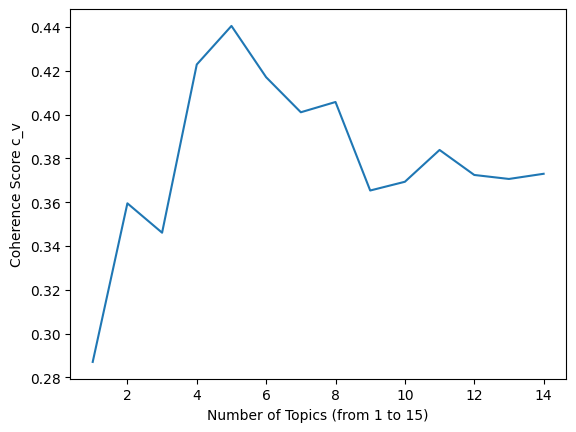

In [24]:
# creating lda object and choosing number of topics
hrp_lda_model = LDAModel(hrp_df)
hrp_lda_model.preprocess(custom_stopwords=custom_stopwords)  
hrp_lda_model.create_bow_model() 
hrp_lda_model.plot_optimal_coherent_scores() 

In [25]:
# number of topics = 5 another good example is 8 based on the c_v measure
hrp_lda_model.create_lda_model(5)

hrp_lda_model.format_topics_sentences()
hrp_df = hrp_lda_model.df
hrp_df.head()

INFO:gensim.models.ldamodel:using symmetric alpha at 0.2
INFO:gensim.models.ldamodel:using symmetric eta at 0.2
INFO:gensim.models.ldamodel:using serial LDA version on this node
INFO:gensim.models.ldamulticore:running online LDA training, 5 topics, 100 passes over the supplied corpus of 1157 documents, updating every 8000 documents, evaluating every ~1157 documents, iterating 100x with a convergence threshold of 0.001000
INFO:gensim.models.ldamulticore:training LDA model using 4 processes
INFO:gensim.models.ldamulticore:PROGRESS: pass 0, dispatched chunk #0 = documents up to #1157/1157, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.200): 0.017*"thyroid" + 0.012*"disease" + 0.009*"brain" + 0.008*"high" + 0.007*"cause" + 0.007*"low" + 0.006*"reduce" + 0.006*"need" + 0.006*"autoimmune" + 0.006*"pain"
INFO:gensim.models.ldamodel:topic #1 (0.200): 0.012*"disease" + 0.011*"high" + 0.008*"low" + 0.007*"time" + 0.007*"cause" + 0.006*"heart" + 0.006*"vaginal" + 0.006*"histami

INFO:gensim.models.ldamodel:topic #4 (0.200): 0.018*"magnesium" + 0.016*"pain" + 0.014*"need" + 0.009*"protein" + 0.009*"healthy" + 0.009*"alcohol" + 0.007*"works" + 0.007*"period" + 0.006*"grams" + 0.006*"breast"
INFO:gensim.models.ldamodel:topic diff=0.131938, rho=0.389885
INFO:gensim.models.ldamodel:-7.014 per-word bound, 129.3 perplexity estimate based on a held-out corpus of 1157 documents with 24942 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 6, dispatched chunk #0 = documents up to #1157/1157, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.200): 0.025*"thyroid" + 0.018*"disease" + 0.009*"cause" + 0.009*"autoimmune" + 0.008*"high" + 0.008*"iodine" + 0.007*"hormone" + 0.007*"brain" + 0.007*"effects" + 0.007*"reduce"
INFO:gensim.models.ldamodel:topic #1 (0.200): 0.016*"high" + 0.012*"low" + 0.009*"histamine" + 0.008*"period" + 0.008*"years" + 0.008*"time" + 0.008*"heart" + 0.007*"mood" + 0.007*"disease" + 0.007*"migraines"
INFO:gensim.models.ldamodel:topi

INFO:gensim.models.ldamodel:topic #4 (0.200): 0.020*"magnesium" + 0.015*"need" + 0.014*"pain" + 0.012*"protein" + 0.010*"works" + 0.010*"alcohol" + 0.010*"healthy" + 0.009*"vitamin" + 0.007*"taurine" + 0.007*"grams"
INFO:gensim.models.ldamodel:topic diff=0.068606, rho=0.281959
INFO:gensim.models.ldamodel:-6.969 per-word bound, 125.3 perplexity estimate based on a held-out corpus of 1157 documents with 24942 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 12, dispatched chunk #0 = documents up to #1157/1157, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.200): 0.025*"thyroid" + 0.020*"disease" + 0.010*"cause" + 0.009*"autoimmune" + 0.009*"iodine" + 0.007*"high" + 0.007*"hormone" + 0.007*"effects" + 0.007*"pain" + 0.007*"low"
INFO:gensim.models.ldamodel:topic #1 (0.200): 0.018*"high" + 0.013*"low" + 0.009*"histamine" + 0.009*"period" + 0.008*"years" + 0.008*"heart" + 0.008*"mood" + 0.008*"time" + 0.008*"brain" + 0.008*"migraines"
INFO:gensim.models.ldamodel:topic #

INFO:gensim.models.ldamodel:topic #4 (0.200): 0.022*"magnesium" + 0.016*"need" + 0.013*"protein" + 0.011*"vitamin" + 0.011*"works" + 0.011*"pain" + 0.010*"healthy" + 0.010*"alcohol" + 0.008*"dose" + 0.008*"taurine"
INFO:gensim.models.ldamodel:topic diff=0.042852, rho=0.232004
INFO:gensim.models.ldamodel:-6.945 per-word bound, 123.2 perplexity estimate based on a held-out corpus of 1157 documents with 24942 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 18, dispatched chunk #0 = documents up to #1157/1157, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.200): 0.025*"thyroid" + 0.020*"disease" + 0.010*"cause" + 0.009*"autoimmune" + 0.009*"iodine" + 0.009*"pain" + 0.008*"high" + 0.007*"hormone" + 0.007*"effects" + 0.007*"low"
INFO:gensim.models.ldamodel:topic #1 (0.200): 0.019*"high" + 0.013*"low" + 0.009*"brain" + 0.009*"histamine" + 0.009*"period" + 0.009*"years" + 0.008*"heart" + 0.008*"mood" + 0.008*"time" + 0.008*"migraines"
INFO:gensim.models.ldamodel:topic #2

INFO:gensim.models.ldamodel:topic #4 (0.200): 0.023*"magnesium" + 0.016*"need" + 0.014*"protein" + 0.013*"vitamin" + 0.012*"works" + 0.011*"healthy" + 0.010*"alcohol" + 0.010*"pain" + 0.008*"dose" + 0.008*"supplements"
INFO:gensim.models.ldamodel:topic diff=0.030810, rho=0.201708
INFO:gensim.models.ldamodel:-6.928 per-word bound, 121.8 perplexity estimate based on a held-out corpus of 1157 documents with 24942 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 24, dispatched chunk #0 = documents up to #1157/1157, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.200): 0.025*"thyroid" + 0.021*"disease" + 0.011*"cause" + 0.009*"pain" + 0.009*"iodine" + 0.009*"autoimmune" + 0.008*"high" + 0.007*"effects" + 0.007*"hormone" + 0.007*"breast"
INFO:gensim.models.ldamodel:topic #1 (0.200): 0.019*"high" + 0.013*"low" + 0.010*"brain" + 0.010*"years" + 0.009*"histamine" + 0.009*"period" + 0.009*"heart" + 0.009*"mood" + 0.009*"time" + 0.008*"hot_flushes"
INFO:gensim.models.ldamodel

INFO:gensim.models.ldamodel:topic #4 (0.200): 0.023*"magnesium" + 0.017*"need" + 0.014*"protein" + 0.014*"vitamin" + 0.013*"works" + 0.011*"healthy" + 0.010*"alcohol" + 0.009*"sleep" + 0.009*"supplement" + 0.009*"supplements"
INFO:gensim.models.ldamodel:topic diff=0.023882, rho=0.180839
INFO:gensim.models.ldamodel:-6.916 per-word bound, 120.8 perplexity estimate based on a held-out corpus of 1157 documents with 24942 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 30, dispatched chunk #0 = documents up to #1157/1157, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.200): 0.025*"thyroid" + 0.021*"disease" + 0.011*"cause" + 0.010*"pain" + 0.009*"iodine" + 0.009*"autoimmune" + 0.008*"high" + 0.007*"effects" + 0.007*"hormone" + 0.007*"breast"
INFO:gensim.models.ldamodel:topic #1 (0.200): 0.020*"high" + 0.013*"low" + 0.011*"brain" + 0.010*"period" + 0.010*"histamine" + 0.010*"years" + 0.009*"heart" + 0.009*"mood" + 0.009*"time" + 0.008*"hot_flushes"
INFO:gensim.models.l

INFO:gensim.models.ldamodel:topic #4 (0.200): 0.023*"magnesium" + 0.017*"need" + 0.015*"vitamin" + 0.015*"protein" + 0.014*"works" + 0.011*"healthy" + 0.010*"alcohol" + 0.010*"sleep" + 0.009*"supplement" + 0.009*"supplements"
INFO:gensim.models.ldamodel:topic diff=0.019743, rho=0.165343
INFO:gensim.models.ldamodel:-6.907 per-word bound, 120.0 perplexity estimate based on a held-out corpus of 1157 documents with 24942 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 36, dispatched chunk #0 = documents up to #1157/1157, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.200): 0.025*"thyroid" + 0.021*"disease" + 0.011*"cause" + 0.010*"pain" + 0.010*"iodine" + 0.009*"autoimmune" + 0.008*"high" + 0.008*"effects" + 0.007*"breast" + 0.007*"hormone"
INFO:gensim.models.ldamodel:topic #1 (0.200): 0.020*"high" + 0.013*"low" + 0.011*"period" + 0.011*"brain" + 0.010*"histamine" + 0.010*"years" + 0.010*"heart" + 0.009*"mood" + 0.009*"pain" + 0.009*"time"
INFO:gensim.models.ldamodel

INFO:gensim.models.ldamodel:topic #4 (0.200): 0.023*"magnesium" + 0.018*"need" + 0.015*"vitamin" + 0.015*"protein" + 0.014*"works" + 0.011*"healthy" + 0.011*"sleep" + 0.010*"alcohol" + 0.010*"supplement" + 0.010*"supplements"
INFO:gensim.models.ldamodel:topic diff=0.016057, rho=0.153252
INFO:gensim.models.ldamodel:-6.899 per-word bound, 119.4 perplexity estimate based on a held-out corpus of 1157 documents with 24942 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 42, dispatched chunk #0 = documents up to #1157/1157, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.200): 0.025*"thyroid" + 0.021*"disease" + 0.011*"cause" + 0.010*"pain" + 0.010*"iodine" + 0.009*"autoimmune" + 0.008*"high" + 0.008*"breast" + 0.008*"effects" + 0.007*"hormone"
INFO:gensim.models.ldamodel:topic #1 (0.200): 0.020*"high" + 0.013*"low" + 0.012*"period" + 0.011*"brain" + 0.010*"histamine" + 0.010*"years" + 0.010*"pain" + 0.010*"heart" + 0.009*"mood" + 0.009*"time"
INFO:gensim.models.ldamodel

INFO:gensim.models.ldamodel:topic #4 (0.200): 0.023*"magnesium" + 0.018*"need" + 0.016*"vitamin" + 0.015*"protein" + 0.015*"works" + 0.011*"healthy" + 0.011*"sleep" + 0.011*"alcohol" + 0.010*"supplement" + 0.010*"supplements"
INFO:gensim.models.ldamodel:topic diff=0.012964, rho=0.143476
INFO:gensim.models.ldamodel:-6.894 per-word bound, 118.9 perplexity estimate based on a held-out corpus of 1157 documents with 24942 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 48, dispatched chunk #0 = documents up to #1157/1157, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.200): 0.026*"thyroid" + 0.021*"disease" + 0.012*"cause" + 0.011*"pain" + 0.010*"iodine" + 0.009*"autoimmune" + 0.008*"high" + 0.008*"breast" + 0.008*"effects" + 0.007*"hormone"
INFO:gensim.models.ldamodel:topic #1 (0.200): 0.020*"high" + 0.013*"low" + 0.012*"period" + 0.011*"brain" + 0.011*"pain" + 0.011*"histamine" + 0.010*"years" + 0.010*"heart" + 0.009*"mood" + 0.009*"time"
INFO:gensim.models.ldamodel

INFO:gensim.models.ldamodel:topic #4 (0.200): 0.023*"magnesium" + 0.018*"need" + 0.016*"vitamin" + 0.015*"protein" + 0.015*"works" + 0.012*"sleep" + 0.011*"healthy" + 0.011*"alcohol" + 0.011*"supplement" + 0.010*"supplements"
INFO:gensim.models.ldamodel:topic diff=0.010729, rho=0.135360
INFO:gensim.models.ldamodel:-6.889 per-word bound, 118.5 perplexity estimate based on a held-out corpus of 1157 documents with 24942 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 54, dispatched chunk #0 = documents up to #1157/1157, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.200): 0.026*"thyroid" + 0.021*"disease" + 0.012*"cause" + 0.011*"pain" + 0.010*"iodine" + 0.009*"autoimmune" + 0.008*"high" + 0.008*"breast" + 0.008*"effects" + 0.007*"hormone"
INFO:gensim.models.ldamodel:topic #1 (0.200): 0.020*"high" + 0.013*"low" + 0.013*"period" + 0.011*"pain" + 0.011*"brain" + 0.011*"histamine" + 0.010*"years" + 0.010*"heart" + 0.009*"mood" + 0.009*"time"
INFO:gensim.models.ldamodel

INFO:gensim.models.ldamodel:topic #4 (0.200): 0.023*"magnesium" + 0.018*"need" + 0.016*"vitamin" + 0.016*"protein" + 0.015*"works" + 0.012*"sleep" + 0.011*"healthy" + 0.011*"supplement" + 0.011*"alcohol" + 0.010*"supplements"
INFO:gensim.models.ldamodel:topic diff=0.008890, rho=0.128482
INFO:gensim.models.ldamodel:-6.886 per-word bound, 118.3 perplexity estimate based on a held-out corpus of 1157 documents with 24942 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 60, dispatched chunk #0 = documents up to #1157/1157, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.200): 0.026*"thyroid" + 0.021*"disease" + 0.012*"cause" + 0.011*"pain" + 0.010*"iodine" + 0.009*"autoimmune" + 0.008*"breast" + 0.008*"high" + 0.008*"effects" + 0.007*"hormone"
INFO:gensim.models.ldamodel:topic #1 (0.200): 0.020*"high" + 0.013*"period" + 0.013*"low" + 0.011*"pain" + 0.011*"histamine" + 0.011*"brain" + 0.010*"years" + 0.010*"heart" + 0.010*"mood" + 0.009*"time"
INFO:gensim.models.ldamodel

INFO:gensim.models.ldamodel:topic #4 (0.200): 0.023*"magnesium" + 0.018*"need" + 0.016*"vitamin" + 0.016*"protein" + 0.015*"works" + 0.012*"sleep" + 0.011*"healthy" + 0.011*"supplement" + 0.011*"alcohol" + 0.011*"supplements"
INFO:gensim.models.ldamodel:topic diff=0.007692, rho=0.122556
INFO:gensim.models.ldamodel:-6.883 per-word bound, 118.1 perplexity estimate based on a held-out corpus of 1157 documents with 24942 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 66, dispatched chunk #0 = documents up to #1157/1157, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.200): 0.026*"thyroid" + 0.021*"disease" + 0.012*"cause" + 0.011*"pain" + 0.010*"iodine" + 0.009*"autoimmune" + 0.008*"breast" + 0.008*"high" + 0.008*"effects" + 0.007*"hormone"
INFO:gensim.models.ldamodel:topic #1 (0.200): 0.020*"high" + 0.013*"period" + 0.013*"low" + 0.012*"pain" + 0.011*"histamine" + 0.011*"brain" + 0.010*"heart" + 0.010*"years" + 0.010*"mood" + 0.009*"time"
INFO:gensim.models.ldamodel

INFO:gensim.models.ldamodel:topic #4 (0.200): 0.023*"magnesium" + 0.018*"need" + 0.016*"vitamin" + 0.016*"protein" + 0.015*"works" + 0.013*"sleep" + 0.011*"supplement" + 0.011*"healthy" + 0.011*"alcohol" + 0.011*"supplements"
INFO:gensim.models.ldamodel:topic diff=0.006614, rho=0.117381
INFO:gensim.models.ldamodel:-6.881 per-word bound, 117.9 perplexity estimate based on a held-out corpus of 1157 documents with 24942 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 72, dispatched chunk #0 = documents up to #1157/1157, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.200): 0.026*"thyroid" + 0.022*"disease" + 0.012*"cause" + 0.011*"pain" + 0.010*"iodine" + 0.009*"autoimmune" + 0.008*"breast" + 0.008*"high" + 0.008*"effects" + 0.007*"hormone"
INFO:gensim.models.ldamodel:topic #1 (0.200): 0.020*"high" + 0.014*"period" + 0.013*"low" + 0.012*"pain" + 0.011*"histamine" + 0.011*"brain" + 0.010*"heart" + 0.010*"years" + 0.010*"mood" + 0.009*"time"
INFO:gensim.models.ldamodel

INFO:gensim.models.ldamodel:topic #4 (0.200): 0.023*"magnesium" + 0.018*"need" + 0.016*"vitamin" + 0.016*"protein" + 0.015*"works" + 0.013*"sleep" + 0.011*"supplement" + 0.011*"healthy" + 0.011*"alcohol" + 0.011*"supplements"
INFO:gensim.models.ldamodel:topic diff=0.005830, rho=0.112810
INFO:gensim.models.ldamodel:-6.878 per-word bound, 117.6 perplexity estimate based on a held-out corpus of 1157 documents with 24942 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 78, dispatched chunk #0 = documents up to #1157/1157, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.200): 0.026*"thyroid" + 0.022*"disease" + 0.012*"cause" + 0.012*"pain" + 0.010*"iodine" + 0.009*"autoimmune" + 0.008*"breast" + 0.008*"effects" + 0.008*"high" + 0.008*"hormone"
INFO:gensim.models.ldamodel:topic #1 (0.200): 0.021*"high" + 0.014*"period" + 0.013*"low" + 0.012*"pain" + 0.011*"brain" + 0.011*"histamine" + 0.010*"heart" + 0.010*"years" + 0.010*"mood" + 0.009*"time"
INFO:gensim.models.ldamodel

INFO:gensim.models.ldamodel:topic #3 (0.200): 0.017*"vaginal" + 0.015*"health" + 0.012*"bone" + 0.010*"way" + 0.010*"hpa_axis" + 0.008*"healthy" + 0.008*"microbiome" + 0.008*"sugar" + 0.008*"body" + 0.007*"stress"
INFO:gensim.models.ldamodel:topic #4 (0.200): 0.023*"magnesium" + 0.018*"need" + 0.016*"vitamin" + 0.016*"protein" + 0.015*"works" + 0.013*"sleep" + 0.012*"supplement" + 0.011*"healthy" + 0.011*"supplements" + 0.011*"alcohol"
INFO:gensim.models.ldamodel:topic diff=0.005037, rho=0.108735
INFO:gensim.models.ldamodel:-6.876 per-word bound, 117.5 perplexity estimate based on a held-out corpus of 1157 documents with 24942 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 84, dispatched chunk #0 = documents up to #1157/1157, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.200): 0.026*"thyroid" + 0.022*"disease" + 0.012*"cause" + 0.012*"pain" + 0.010*"iodine" + 0.009*"autoimmune" + 0.009*"breast" + 0.008*"effects" + 0.008*"high" + 0.008*"hormone"
INFO:gensim.mode

INFO:gensim.models.ldamodel:topic #2 (0.200): 0.017*"doctor" + 0.012*"iron" + 0.010*"sleep" + 0.009*"years" + 0.009*"periods" + 0.008*"bleeding" + 0.008*"need" + 0.008*"pain" + 0.008*"having" + 0.007*"speak_doctor"
INFO:gensim.models.ldamodel:topic #3 (0.200): 0.018*"vaginal" + 0.015*"health" + 0.012*"bone" + 0.010*"way" + 0.010*"hpa_axis" + 0.008*"healthy" + 0.008*"microbiome" + 0.008*"sugar" + 0.008*"body" + 0.007*"stress"
INFO:gensim.models.ldamodel:topic #4 (0.200): 0.023*"magnesium" + 0.018*"need" + 0.016*"vitamin" + 0.016*"protein" + 0.015*"works" + 0.013*"sleep" + 0.012*"supplement" + 0.011*"healthy" + 0.011*"supplements" + 0.011*"alcohol"
INFO:gensim.models.ldamodel:topic diff=0.004631, rho=0.105072
INFO:gensim.models.ldamodel:-6.875 per-word bound, 117.4 perplexity estimate based on a held-out corpus of 1157 documents with 24942 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 90, dispatched chunk #0 = documents up to #1157/1157, outstanding queue size 1
INFO:gensim.models

INFO:gensim.models.ldamodel:topic #1 (0.200): 0.021*"high" + 0.014*"period" + 0.013*"low" + 0.012*"pain" + 0.012*"brain" + 0.011*"histamine" + 0.010*"heart" + 0.010*"years" + 0.010*"mood" + 0.009*"time"
INFO:gensim.models.ldamodel:topic #2 (0.200): 0.017*"doctor" + 0.012*"iron" + 0.010*"sleep" + 0.009*"years" + 0.009*"periods" + 0.009*"bleeding" + 0.009*"need" + 0.008*"pain" + 0.008*"having" + 0.007*"speak_doctor"
INFO:gensim.models.ldamodel:topic #3 (0.200): 0.018*"vaginal" + 0.015*"health" + 0.012*"bone" + 0.010*"way" + 0.010*"hpa_axis" + 0.008*"healthy" + 0.008*"microbiome" + 0.008*"sugar" + 0.008*"body" + 0.007*"foods"
INFO:gensim.models.ldamodel:topic #4 (0.200): 0.023*"magnesium" + 0.018*"need" + 0.016*"vitamin" + 0.016*"protein" + 0.015*"works" + 0.013*"sleep" + 0.012*"supplement" + 0.011*"healthy" + 0.011*"supplements" + 0.011*"alcohol"
INFO:gensim.models.ldamodel:topic diff=0.004195, rho=0.101756
INFO:gensim.models.ldamodel:-6.873 per-word bound, 117.2 perplexity estimate base

index                   book  chapter  paragraph_number  \
0      0  Hormone Repair Manual        1                 1   
1      1  Hormone Repair Manual        1                 2   
2      2  Hormone Repair Manual        1                 3   
3      3  Hormone Repair Manual        1                 4   
4      4  Hormone Repair Manual        1                 5   

                                           paragraph  \
0  Hormone revolution:\n\n\n\n\n\nwhy everything ...   
1  This book is about both the process of perimen...   
2  First, understand that symptoms (if you experi...   
3  Next, understand that perimenopause is not jus...   
4  Finally, know that perimenopause and the early...   

                                              tokens  \
0  [hormone, revolution, different, second, puber...   
1  [book, process, perimenopause, life, phase, co...   
2  [understand, symptoms, experience, likely, tem...   
3  [understand, perimenopause, chaotic, 'hormonal...   
4  [finally, know, perimenopause, early, years, c...   

                                           processed  dominant_topic  \
0  [hormone, different, second, book, feel, chang...               1   
1  [book, process, life_phase, decades, need, und...               2   
2  [understand, experience, likely, temporary, pe...               2   
3  [understand, sequence_events, beginning, low, ...               0   
4  [finally, know, early, years, critical_window,...               3   

   perc_contribution                                     topic_keywords  
0             0.5210  high, period, low, pain, brain, histamine, hea...  
1             0.9191  doctor, iron, sleep, years, bleeding, periods,...  
2             0.9264  doctor, iron, sleep, years, bleeding, periods,...  
3             0.9543  thyroid, disease, cause, pain, iodine, autoimm...  
4             0.8462  vaginal, health, bone, way, hpa_axis, healthy,...

In [26]:
hrp_sentiment_model = Sentiment(hrp_df)
hrp_sentiment_model.predict(load_from_file=True, file_name='out/sentiment.csv')
hrp_sentiment_model.df.head()

INFO:root:loading sentiments from already exported file:
	out/sentiment.csv
INFO:root:left join done and sentiments are loaded - check: 1157==1157?


index                   book  chapter  paragraph_number  \
0      0  Hormone Repair Manual        1                 1   
1      1  Hormone Repair Manual        1                 2   
2      2  Hormone Repair Manual        1                 3   
3      3  Hormone Repair Manual        1                 4   
4      4  Hormone Repair Manual        1                 5   

                                           paragraph  \
0  Hormone revolution:\n\n\n\n\n\nwhy everything ...   
1  This book is about both the process of perimen...   
2  First, understand that symptoms (if you experi...   
3  Next, understand that perimenopause is not jus...   
4  Finally, know that perimenopause and the early...   

                                              tokens  \
0  [hormone, revolution, different, second, puber...   
1  [book, process, perimenopause, life, phase, co...   
2  [understand, symptoms, experience, likely, tem...   
3  [understand, perimenopause, chaotic, 'hormonal...   
4  [finally, know, perimenopause, early, years, c...   

                                           processed  dominant_topic  \
0  [hormone, different, second, book, feel, chang...               1   
1  [book, process, life_phase, decades, need, und...               2   
2  [understand, experience, likely, temporary, pe...               2   
3  [understand, sequence_events, beginning, low, ...               0   
4  [finally, know, early, years, critical_window,...               3   

   perc_contribution                                     topic_keywords  \
0             0.5210  high, period, low, pain, brain, histamine, hea...   
1             0.9191  doctor, iron, sleep, years, bleeding, periods,...   
2             0.9264  doctor, iron, sleep, years, bleeding, periods,...   
3             0.9543  thyroid, disease, cause, pain, iodine, autoimm...   
4             0.8462  vaginal, health, bone, way, hpa_axis, healthy,...   

  sentiment  
0  POSITIVE  
1  POSITIVE  
2  POSITIVE  
3  NEGATIVE  
4  POSITIVE

In [27]:
hrp_sentiment_model.export_to_csv('out/sentiments_hrp.csv')

INFO:root:file is writen successfully


INFO:root:chapter-topic treemap html is saved in: 
	figures/hrp_chapter_topic.html
INFO:root:topic-sentiment treemap html is saved in: 
	figures/hrp_topic_sentment.html
INFO:root:pyvis html visualization is saved in: 
	figures/hrp_pyvis_topics.html
/Users/ehsanhamzei/opt/anaconda3/envs/lda_env/lib/python3.11/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.

INFO:root:wordclouds are generated and saved in:	figures/hrp_wordclouds.svg


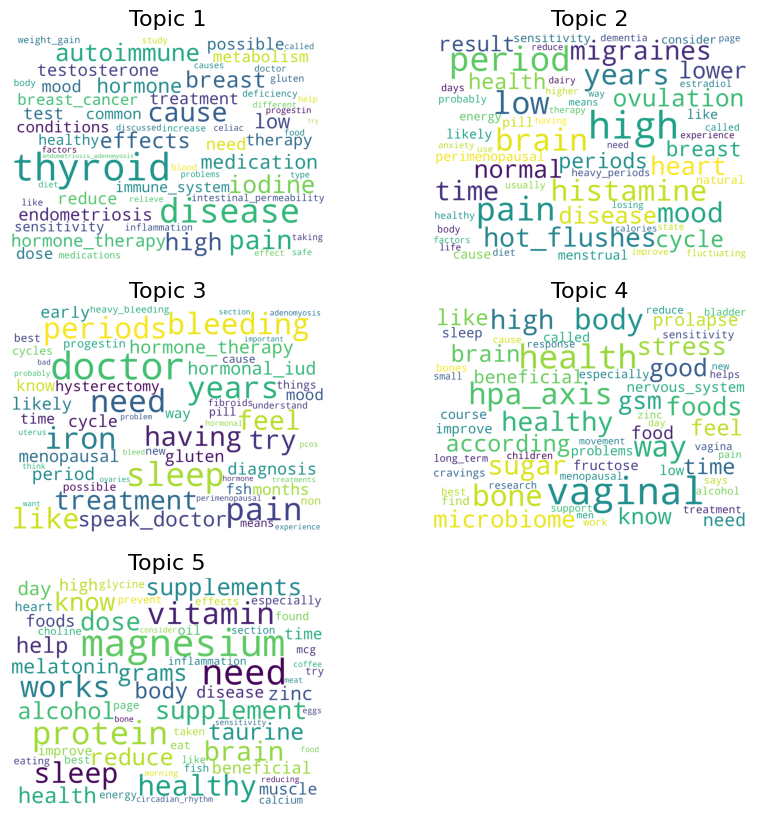

In [ ]:
hrp_vis = Vis(sentiment=hrp_sentiment_model, lda=hrp_lda_model)
# chapter sentiments already covered in all books in the shelf 
# - no change (sentiments are the same only topics are changed)

hrp_vis.treemap_chapter_topic('figures/hrp_chapter_topic.html')  # treemap of chapter -> topics
hrp_vis.treemap_topic_sentiment('figures/hrp_topic_sentment.html')  # treemap of topics -> sentiments
hrp_vis.pyviz_topics('figures/hrp_pyvis_topics.html')  # pyVis topic analysis
hrp_vis.generate_topics_wordcloud('figures/hrp_wordclouds.svg')

### 2. Next Level

In [29]:
nl_df = bookshelf.create_corpus_custom_df(nl_book_name)
nl_df = nl_df.reset_index()
nl_df.head()

level_0  index        book  chapter  paragraph_number  \
0        0   1157  Next Level        1                 1   
1        1   1158  Next Level        1                 2   
2        2   1159  Next Level        1                 3   
3        3   1160  Next Level        1                 4   
4        4   1161  Next Level        1                 5   

                                           paragraph  
0  THE STATS. THE STIGMA. THE SILENCE.How we thin...  
1  When you look at it that way, it's all the mor...  
2  The Puritan times weren't much better. If you ...  
3  Menopause finally surfaced as a recognized med...  
4  Things didn't really get much better even in w...

INFO:root:Calling preprocessing in LDA model:

INFO:root:Preprocessor initiated...
INFO:root:	stopwords length (standard): 326
INFO:root:	stopwords length: 381
INFO:root:	All paragraph are normalized by removing unwanted characters
INFO:root:	tokenization and initial preprocessing is done
INFO:root:	word count is done:
INFO:root:		{'body': 363, 'like': 238, 'levels': 171, 'exercise': 199, 'need': 201, 'day': 180, 'estrogen': 166, 'fat': 155, 'training': 202, 'sleep': 156, 'blood': 170, 'protein': 165, 'muscle': 234}

INFO:gensim.models.phrases:collecting all words and their counts
INFO:gensim.models.phrases:PROGRESS: at sentence #0, processed 0 words and 0 word types
INFO:gensim.models.phrases:collected 35753 token types (unigram + bigrams) from a corpus of 36523 words and 981 sentences
INFO:gensim.models.phrases:merged Phrases<35753 vocab, min_count=5, threshold=100, max_vocab_size=40000000>
INFO:gensim.utils:Phrases lifecycle event {'msg': 'built Phrases<35753 vocab, min_count=5, thr

preprocessing workflow started...


INFO:gensim.corpora.dictionary:built Dictionary<1399 unique tokens: ['average_age', 'easily', 'factor', 'half', 'happen']...> from 981 documents (total 25354 corpus positions)
INFO:gensim.utils:Dictionary lifecycle event {'msg': "built Dictionary<1399 unique tokens: ['average_age', 'easily', 'factor', 'half', 'happen']...> from 981 documents (total 25354 corpus positions)", 'datetime': '2023-06-11T21:20:38.490436', 'gensim': '4.3.1', 'python': '3.11.3 (main, May 15 2023, 10:43:03) [Clang 14.0.6 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'created'}
INFO:gensim.corpora.dictionary:discarding 76 tokens: [('looks', 2), ('north', 2), ('antioxidant', 4), ('adenosine', 3), ('vasomotor', 2), ('powders', 4), ('went', 4), ('free_radicals', 3), ('hgh', 3), ('speed', 4)]...
INFO:gensim.corpora.dictionary:keeping 1323 tokens which were in no less than 5 and no more than 196200 (=20000.0%) documents
INFO:gensim.corpora.dictionary:resulting dictionary: Dictionary<1323 unique tokens: ['a

INFO:gensim.models.ldamodel:topic #0 (0.500): 0.008*"day" + 0.007*"protein" + 0.007*"exercise" + 0.007*"levels" + 0.006*"fat" + 0.006*"help" + 0.006*"health" + 0.005*"estrogen" + 0.005*"sleep" + 0.005*"menopausal"
INFO:gensim.models.ldamodel:topic #1 (0.500): 0.008*"exercise" + 0.007*"estrogen" + 0.007*"sleep" + 0.006*"levels" + 0.006*"help" + 0.006*"day" + 0.005*"protein" + 0.005*"time" + 0.005*"symptoms" + 0.005*"muscles"
INFO:gensim.models.ldamodel:topic diff=0.588681, rho=1.000000
INFO:gensim.models.ldamodel:-7.029 per-word bound, 130.6 perplexity estimate based on a held-out corpus of 981 documents with 24985 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 1, dispatched chunk #0 = documents up to #981/981, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.500): 0.008*"day" + 0.008*"protein" + 0.007*"exercise" + 0.007*"levels" + 0.006*"fat" + 0.006*"health" + 0.006*"help" + 0.005*"percent" + 0.005*"menopausal" + 0.005*"sleep"
INFO:gensim.models.ldamodel:topic #1

INFO:gensim.models.ldamulticore:running online LDA training, 3 topics, 10 passes over the supplied corpus of 981 documents, updating every 16000 documents, evaluating every ~981 documents, iterating 10x with a convergence threshold of 0.001000
INFO:gensim.models.ldamulticore:training LDA model using 8 processes
INFO:gensim.models.ldamulticore:PROGRESS: pass 0, dispatched chunk #0 = documents up to #981/981, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.333): 0.008*"day" + 0.007*"protein" + 0.007*"health" + 0.007*"levels" + 0.007*"exercise" + 0.006*"fat" + 0.006*"estrogen" + 0.006*"help" + 0.006*"percent" + 0.005*"sleep"
INFO:gensim.models.ldamodel:topic #1 (0.333): 0.008*"estrogen" + 0.007*"exercise" + 0.007*"sleep" + 0.006*"levels" + 0.006*"help" + 0.006*"day" + 0.006*"symptoms" + 0.005*"weight" + 0.005*"muscles" + 0.005*"health"
INFO:gensim.models.ldamodel:topic #2 (0.333): 0.009*"exercise" + 0.007*"protein" + 0.006*"levels" + 0.006*"day" + 0.006*"sleep" + 0.006*"h

INFO:gensim.models.ldamodel:topic #1 (0.333): 0.016*"estrogen" + 0.011*"symptoms" + 0.007*"years" + 0.007*"percent" + 0.006*"progesterone" + 0.006*"strength" + 0.006*"lifting" + 0.006*"age" + 0.006*"muscles" + 0.006*"time"
INFO:gensim.models.ldamodel:topic #2 (0.333): 0.012*"exercise" + 0.010*"recovery" + 0.009*"day" + 0.009*"work" + 0.008*"hard" + 0.007*"endurance" + 0.007*"sleep" + 0.006*"time" + 0.006*"easy" + 0.006*"floor"
INFO:gensim.models.ldamodel:topic diff=0.106845, rho=0.324605
INFO:gensim.models.ldamodel:-6.872 per-word bound, 117.2 perplexity estimate based on a held-out corpus of 981 documents with 24985 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 9, dispatched chunk #0 = documents up to #981/981, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.333): 0.013*"protein" + 0.011*"levels" + 0.009*"day" + 0.009*"gut" + 0.009*"health" + 0.008*"exercise" + 0.007*"help" + 0.007*"foods" + 0.007*"blood" + 0.007*"grams"
INFO:gensim.models.ldamodel:topic #1 (0.

INFO:gensim.models.ldamodel:topic #3 (0.250): 0.019*"sleep" + 0.010*"help" + 0.010*"day" + 0.009*"symptoms" + 0.007*"taking" + 0.007*"fat" + 0.007*"better" + 0.006*"hormones" + 0.006*"menopausal" + 0.006*"levels"
INFO:gensim.models.ldamodel:topic diff=0.209929, rho=0.426770
INFO:gensim.models.ldamodel:-7.005 per-word bound, 128.5 perplexity estimate based on a held-out corpus of 981 documents with 24985 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 5, dispatched chunk #0 = documents up to #981/981, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.250): 0.015*"protein" + 0.013*"levels" + 0.011*"health" + 0.010*"percent" + 0.009*"gut" + 0.008*"blood" + 0.008*"exercise" + 0.007*"high" + 0.007*"right" + 0.007*"day"
INFO:gensim.models.ldamodel:topic #1 (0.250): 0.019*"estrogen" + 0.008*"weight" + 0.008*"muscles" + 0.007*"symptoms" + 0.007*"progesterone" + 0.006*"floor" + 0.006*"bone" + 0.006*"years" + 0.006*"percent" + 0.005*"start"
INFO:gensim.models.ldamodel:topic #

INFO:gensim.models.ldamodel:topic #3 (0.200): 0.010*"sleep" + 0.008*"day" + 0.006*"estrogen" + 0.006*"help" + 0.006*"exercise" + 0.006*"levels" + 0.006*"protein" + 0.006*"fat" + 0.005*"symptoms" + 0.005*"menopausal"
INFO:gensim.models.ldamodel:topic #4 (0.200): 0.009*"day" + 0.007*"help" + 0.007*"exercise" + 0.006*"weight" + 0.006*"protein" + 0.006*"fat" + 0.005*"time" + 0.005*"lower" + 0.005*"percent" + 0.005*"levels"
INFO:gensim.models.ldamodel:topic diff=0.676070, rho=1.000000
INFO:gensim.models.ldamodel:-7.436 per-word bound, 173.1 perplexity estimate based on a held-out corpus of 981 documents with 24985 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 1, dispatched chunk #0 = documents up to #981/981, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.200): 0.010*"health" + 0.008*"levels" + 0.007*"protein" + 0.007*"exercise" + 0.006*"day" + 0.006*"menopausal" + 0.006*"fat" + 0.006*"estrogen" + 0.005*"percent" + 0.005*"performance"
INFO:gensim.models.ldamodel:top

INFO:gensim.models.ldamodel:topic #3 (0.200): 0.026*"sleep" + 0.011*"help" + 0.010*"symptoms" + 0.009*"taking" + 0.009*"better" + 0.008*"fat" + 0.008*"day" + 0.007*"stress" + 0.007*"levels" + 0.007*"hot_flashes"
INFO:gensim.models.ldamodel:topic #4 (0.200): 0.019*"day" + 0.012*"weight" + 0.012*"bone" + 0.009*"work" + 0.008*"easy" + 0.007*"foods" + 0.007*"fat" + 0.006*"calcium" + 0.006*"strength" + 0.006*"lifting"
INFO:gensim.models.ldamodel:topic diff=0.215396, rho=0.365380
INFO:gensim.models.ldamodel:-6.941 per-word bound, 122.9 perplexity estimate based on a held-out corpus of 981 documents with 24985 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 7, dispatched chunk #0 = documents up to #981/981, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.200): 0.013*"gut" + 0.011*"floor" + 0.011*"right" + 0.010*"health" + 0.010*"sodium" + 0.009*"lower" + 0.009*"hips" + 0.009*"water" + 0.009*"blood" + 0.008*"left"
INFO:gensim.models.ldamodel:topic #1 (0.200): 0.026*"estro

INFO:gensim.models.ldamodel:topic #3 (0.167): 0.014*"sleep" + 0.007*"day" + 0.007*"estrogen" + 0.006*"hormones" + 0.006*"help" + 0.006*"levels" + 0.006*"taking" + 0.006*"menopausal" + 0.006*"symptoms" + 0.006*"fat"
INFO:gensim.models.ldamodel:topic diff=0.369270, rho=0.633661
INFO:gensim.models.ldamodel:-7.322 per-word bound, 160.0 perplexity estimate based on a held-out corpus of 981 documents with 24985 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 2, dispatched chunk #0 = documents up to #981/981, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #5 (0.167): 0.022*"protein" + 0.017*"day" + 0.011*"sleep" + 0.008*"grams" + 0.007*"easy" + 0.007*"session" + 0.006*"days" + 0.006*"stress" + 0.006*"work" + 0.005*"recovery"
INFO:gensim.models.ldamodel:topic #1 (0.167): 0.021*"estrogen" + 0.011*"symptoms" + 0.009*"levels" + 0.008*"use" + 0.008*"exercise" + 0.007*"percent" + 0.007*"progesterone" + 0.007*"muscles" + 0.006*"health" + 0.006*"time"
INFO:gensim.models.ldamodel:topi

INFO:gensim.models.ldamodel:topic #3 (0.167): 0.025*"sleep" + 0.012*"taking" + 0.012*"help" + 0.011*"symptoms" + 0.011*"hormones" + 0.008*"adaptogens" + 0.008*"better" + 0.008*"stress" + 0.008*"levels" + 0.007*"menopausal"
INFO:gensim.models.ldamodel:topic #4 (0.167): 0.014*"bone" + 0.012*"weight" + 0.011*"floor" + 0.009*"lower" + 0.009*"muscles" + 0.008*"hips" + 0.008*"calcium" + 0.007*"right" + 0.007*"strength" + 0.007*"feet"
INFO:gensim.models.ldamodel:topic diff=0.236236, rho=0.343189
INFO:gensim.models.ldamodel:-6.926 per-word bound, 121.6 perplexity estimate based on a held-out corpus of 981 documents with 24985 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 8, dispatched chunk #0 = documents up to #981/981, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.167): 0.021*"gut" + 0.016*"blood" + 0.014*"health" + 0.012*"sodium" + 0.011*"water" + 0.010*"exercise" + 0.010*"fluid" + 0.010*"vitamin" + 0.009*"hydration" + 0.009*"drink"
INFO:gensim.models.ldamodel:topi

INFO:gensim.models.ldamodel:topic #3 (0.143): 0.023*"sleep" + 0.010*"hormones" + 0.009*"help" + 0.008*"symptoms" + 0.008*"recovery" + 0.007*"day" + 0.007*"taking" + 0.007*"better" + 0.006*"good" + 0.006*"levels"
INFO:gensim.models.ldamodel:topic #5 (0.143): 0.025*"protein" + 0.018*"day" + 0.010*"grams" + 0.009*"days" + 0.007*"easy" + 0.007*"eating" + 0.007*"sleep" + 0.006*"session" + 0.006*"better" + 0.006*"recovery"
INFO:gensim.models.ldamodel:topic diff=0.491300, rho=0.535249
INFO:gensim.models.ldamodel:-7.229 per-word bound, 150.0 perplexity estimate based on a held-out corpus of 981 documents with 24985 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 3, dispatched chunk #0 = documents up to #981/981, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #4 (0.143): 0.012*"weight" + 0.012*"bone" + 0.011*"day" + 0.008*"lower" + 0.008*"work" + 0.007*"help" + 0.007*"strength" + 0.006*"life" + 0.006*"calcium" + 0.006*"loss"
INFO:gensim.models.ldamodel:topic #6 (0.143): 0.012*"

INFO:gensim.models.ldamodel:topic #6 (0.143): 0.017*"fat" + 0.014*"gut" + 0.013*"percent" + 0.011*"exercise" + 0.010*"health" + 0.009*"levels" + 0.008*"healthy" + 0.008*"sodium" + 0.007*"performance" + 0.007*"risk"
INFO:gensim.models.ldamodel:topic #4 (0.143): 0.015*"bone" + 0.015*"weight" + 0.009*"right" + 0.009*"floor" + 0.009*"strength" + 0.008*"lower" + 0.008*"calcium" + 0.008*"exercises" + 0.008*"life" + 0.007*"muscles"
INFO:gensim.models.ldamodel:topic diff=0.239787, rho=0.324605
INFO:gensim.models.ldamodel:-6.948 per-word bound, 123.5 perplexity estimate based on a held-out corpus of 981 documents with 24985 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 9, dispatched chunk #0 = documents up to #981/981, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.143): 0.021*"levels" + 0.016*"vitamin" + 0.013*"blood" + 0.011*"health" + 0.011*"energy" + 0.010*"inflammation" + 0.009*"water" + 0.008*"iron" + 0.008*"menopausal" + 0.008*"performance"
INFO:gensim.models.lda

INFO:gensim.models.ldamodel:topic #7 (0.125): 0.019*"levels" + 0.012*"hormones" + 0.011*"estrogen" + 0.010*"brain" + 0.009*"stress" + 0.009*"help" + 0.008*"helps" + 0.008*"strength" + 0.007*"exercise" + 0.007*"blood"
INFO:gensim.models.ldamodel:topic diff=0.554843, rho=0.471903
INFO:gensim.models.ldamodel:-7.127 per-word bound, 139.8 perplexity estimate based on a held-out corpus of 981 documents with 24985 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 4, dispatched chunk #0 = documents up to #981/981, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #3 (0.125): 0.042*"sleep" + 0.010*"taking" + 0.010*"help" + 0.010*"day" + 0.008*"better" + 0.008*"good" + 0.007*"recovery" + 0.007*"melatonin" + 0.006*"feel" + 0.006*"night"
INFO:gensim.models.ldamodel:topic #4 (0.125): 0.015*"bone" + 0.009*"calcium" + 0.009*"day" + 0.009*"muscles" + 0.009*"work" + 0.009*"bones" + 0.008*"lower" + 0.008*"exercises" + 0.008*"strength" + 0.007*"weight"
INFO:gensim.models.ldamodel:topic #2 (0.

INFO:gensim.models.ldamodel:topic #7 (0.125): 0.024*"levels" + 0.016*"hormones" + 0.013*"estrogen" + 0.013*"brain" + 0.013*"stress" + 0.011*"help" + 0.011*"blood" + 0.010*"helps" + 0.009*"menopausal" + 0.008*"especially"
INFO:gensim.models.ldamodel:topic diff=0.239686, rho=0.308746
INFO:gensim.models.ldamodel:-6.909 per-word bound, 120.2 perplexity estimate based on a held-out corpus of 981 documents with 24985 words
INFO:gensim.utils:LdaMulticore lifecycle event {'msg': 'trained LdaMulticore<num_terms=1323, num_topics=8, decay=0.5, chunksize=2000> in 3.89s', 'datetime': '2023-06-11T21:21:16.630875', 'gensim': '4.3.1', 'python': '3.11.3 (main, May 15 2023, 10:43:03) [Clang 14.0.6 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'created'}
INFO:gensim.topic_coherence.probability_estimation:using ParallelWordOccurrenceAccumulator<processes=7, batch_size=64> to estimate probabilities from sliding windows
INFO:gensim.topic_coherence.text_analysis:7 accumulators retrieved from outp

INFO:gensim.models.ldamodel:topic diff=0.576860, rho=0.426770
INFO:gensim.models.ldamodel:-7.106 per-word bound, 137.8 perplexity estimate based on a held-out corpus of 981 documents with 24985 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 5, dispatched chunk #0 = documents up to #981/981, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.111): 0.018*"floor" + 0.018*"right" + 0.014*"hips" + 0.013*"lower" + 0.012*"left" + 0.012*"arms" + 0.011*"knees" + 0.011*"water" + 0.010*"feet" + 0.009*"fluid"
INFO:gensim.models.ldamodel:topic #7 (0.111): 0.024*"levels" + 0.018*"estrogen" + 0.015*"stress" + 0.012*"hormones" + 0.011*"inflammation" + 0.010*"brain" + 0.010*"help" + 0.009*"menopausal" + 0.009*"helps" + 0.008*"fat"
INFO:gensim.models.ldamodel:topic #6 (0.111): 0.017*"fat" + 0.013*"percent" + 0.012*"protein" + 0.012*"exercise" + 0.011*"gut" + 0.010*"mass" + 0.010*"health" + 0.008*"performance" + 0.008*"healthy" + 0.008*"sodium"
INFO:gensim.models.ldamodel:topic #8 (0.

INFO:gensim.models.ldamulticore:training LDA model using 8 processes
INFO:gensim.models.ldamulticore:PROGRESS: pass 0, dispatched chunk #0 = documents up to #981/981, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #6 (0.100): 0.009*"protein" + 0.009*"sleep" + 0.008*"exercise" + 0.008*"percent" + 0.007*"fat" + 0.006*"levels" + 0.006*"performance" + 0.006*"menopausal" + 0.006*"symptoms" + 0.006*"health"
INFO:gensim.models.ldamodel:topic #0 (0.100): 0.011*"health" + 0.008*"percent" + 0.007*"levels" + 0.006*"estrogen" + 0.006*"exercise" + 0.006*"fat" + 0.006*"protein" + 0.006*"day" + 0.006*"menopausal" + 0.006*"help"
INFO:gensim.models.ldamodel:topic #7 (0.100): 0.010*"levels" + 0.008*"estrogen" + 0.007*"symptoms" + 0.007*"exercise" + 0.006*"fat" + 0.006*"stress" + 0.005*"protein" + 0.005*"strength" + 0.005*"time" + 0.005*"recovery"
INFO:gensim.models.ldamodel:topic #5 (0.100): 0.010*"day" + 0.010*"protein" + 0.009*"sleep" + 0.007*"exercise" + 0.005*"better" + 0.005*"estrogen" 

INFO:gensim.models.ldamodel:topic diff=0.559328, rho=0.392519
INFO:gensim.models.ldamodel:-7.108 per-word bound, 137.9 perplexity estimate based on a held-out corpus of 981 documents with 24985 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 6, dispatched chunk #0 = documents up to #981/981, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #5 (0.100): 0.032*"day" + 0.020*"protein" + 0.017*"easy" + 0.016*"sleep" + 0.013*"session" + 0.012*"days" + 0.011*"run" + 0.011*"grams" + 0.010*"recovery" + 0.009*"kilogram"
INFO:gensim.models.ldamodel:topic #4 (0.100): 0.019*"bone" + 0.015*"calcium" + 0.013*"bones" + 0.011*"help" + 0.010*"exercises" + 0.010*"best" + 0.009*"magnesium" + 0.009*"running" + 0.009*"loss" + 0.008*"strong"
INFO:gensim.models.ldamodel:topic #0 (0.100): 0.014*"health" + 0.014*"vitamin" + 0.011*"right" + 0.011*"lower" + 0.010*"left" + 0.009*"blood" + 0.009*"percent" + 0.009*"levels" + 0.008*"high" + 0.008*"performance"
INFO:gensim.models.ldamodel:topic #3 (0.10

INFO:gensim.models.ldamodel:topic diff=1.068918, rho=1.000000
INFO:gensim.models.ldamodel:-7.997 per-word bound, 255.5 perplexity estimate based on a held-out corpus of 981 documents with 24985 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 1, dispatched chunk #0 = documents up to #981/981, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #7 (0.091): 0.016*"levels" + 0.012*"estrogen" + 0.010*"symptoms" + 0.009*"help" + 0.008*"stress" + 0.007*"exercise" + 0.007*"high" + 0.007*"hormones" + 0.006*"inflammation" + 0.006*"menopausal"
INFO:gensim.models.ldamodel:topic #9 (0.091): 0.012*"protein" + 0.009*"energy" + 0.009*"day" + 0.008*"gut" + 0.008*"help" + 0.007*"fluid" + 0.006*"exercise" + 0.006*"sodium" + 0.006*"strength" + 0.006*"water"
INFO:gensim.models.ldamodel:topic #3 (0.091): 0.027*"sleep" + 0.008*"help" + 0.008*"estrogen" + 0.007*"taking" + 0.006*"good" + 0.006*"day" + 0.006*"fat" + 0.006*"energy" + 0.006*"hormones" + 0.006*"levels"
INFO:gensim.models.ldamodel:topic

INFO:gensim.models.ldamodel:topic diff=0.534911, rho=0.365380
INFO:gensim.models.ldamodel:-7.057 per-word bound, 133.1 perplexity estimate based on a held-out corpus of 981 documents with 24985 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 7, dispatched chunk #0 = documents up to #981/981, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #5 (0.091): 0.056*"protein" + 0.028*"day" + 0.026*"grams" + 0.016*"eat" + 0.015*"foods" + 0.014*"eating" + 0.013*"diet" + 0.012*"kilogram" + 0.012*"carbs" + 0.011*"calories"
INFO:gensim.models.ldamodel:topic #10 (0.091): 0.015*"health" + 0.015*"vitamin" + 0.012*"better" + 0.012*"levels" + 0.009*"found" + 0.009*"research" + 0.009*"use" + 0.008*"supplements" + 0.008*"age" + 0.008*"performance"
INFO:gensim.models.ldamodel:topic #0 (0.091): 0.028*"floor" + 0.027*"right" + 0.024*"hips" + 0.018*"knees" + 0.018*"arms" + 0.018*"left" + 0.016*"feet" + 0.015*"repeat" + 0.014*"hip" + 0.013*"lower"
INFO:gensim.models.ldamodel:topic #6 (0.091): 0.0

INFO:gensim.models.ldamodel:-7.658 per-word bound, 202.0 perplexity estimate based on a held-out corpus of 981 documents with 24985 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 2, dispatched chunk #0 = documents up to #981/981, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #9 (0.083): 0.018*"energy" + 0.013*"help" + 0.010*"gut" + 0.010*"day" + 0.008*"composition" + 0.008*"exercise" + 0.007*"fluid" + 0.007*"fat" + 0.007*"levels" + 0.007*"time"
INFO:gensim.models.ldamodel:topic #10 (0.083): 0.014*"levels" + 0.011*"vitamin" + 0.011*"health" + 0.010*"use" + 0.010*"protein" + 0.009*"menopausal" + 0.007*"taking" + 0.007*"brain" + 0.007*"found" + 0.007*"work"
INFO:gensim.models.ldamodel:topic #2 (0.083): 0.019*"exercise" + 0.008*"want" + 0.008*"hard" + 0.007*"high" + 0.007*"fact" + 0.007*"endurance" + 0.007*"muscles" + 0.007*"time" + 0.007*"lower" + 0.006*"recovery"
INFO:gensim.models.ldamodel:topic #1 (0.083): 0.030*"estrogen" + 0.013*"symptoms" + 0.013*"muscles" + 0.011

INFO:gensim.models.ldamodel:topic diff=0.482339, rho=0.343189
INFO:gensim.models.ldamodel:-7.082 per-word bound, 135.5 perplexity estimate based on a held-out corpus of 981 documents with 24985 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 8, dispatched chunk #0 = documents up to #981/981, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.083): 0.023*"fat" + 0.018*"percent" + 0.016*"mass" + 0.012*"risk" + 0.012*"health" + 0.009*"high" + 0.009*"exercise" + 0.009*"changes" + 0.009*"lower" + 0.008*"composition"
INFO:gensim.models.ldamodel:topic #2 (0.083): 0.030*"exercise" + 0.012*"want" + 0.011*"muscles" + 0.011*"hard" + 0.011*"fact" + 0.010*"high" + 0.010*"age" + 0.009*"supplementation" + 0.009*"endurance" + 0.008*"recovery"
INFO:gensim.models.ldamodel:topic #7 (0.083): 0.022*"levels" + 0.017*"estrogen" + 0.015*"inflammation" + 0.013*"brain" + 0.013*"iron" + 0.011*"foods" + 0.010*"helps" + 0.010*"help" + 0.009*"menopausal" + 0.009*"diet"
INFO:gensim.models.ldamodel

INFO:gensim.models.ldamodel:topic diff=1.100448, rho=0.535249
INFO:gensim.models.ldamodel:-7.470 per-word bound, 177.3 perplexity estimate based on a held-out corpus of 981 documents with 24985 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 3, dispatched chunk #0 = documents up to #981/981, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #9 (0.077): 0.014*"energy" + 0.011*"protein" + 0.010*"day" + 0.009*"help" + 0.008*"exercise" + 0.008*"strength" + 0.008*"leucine" + 0.007*"levels" + 0.007*"function" + 0.006*"time"
INFO:gensim.models.ldamodel:topic #1 (0.077): 0.023*"estrogen" + 0.019*"floor" + 0.016*"muscles" + 0.013*"vaginal" + 0.010*"feet" + 0.009*"symptoms" + 0.008*"progesterone" + 0.007*"left" + 0.007*"knees" + 0.006*"roller"
INFO:gensim.models.ldamodel:topic #0 (0.077): 0.019*"health" + 0.018*"percent" + 0.014*"estrogen" + 0.012*"fat" + 0.012*"levels" + 0.011*"blood" + 0.008*"high" + 0.008*"performance" + 0.008*"symptoms" + 0.007*"menopausal"
INFO:gensim.models.l

INFO:gensim.models.ldamodel:topic #12 (0.077): 0.023*"gut" + 0.019*"levels" + 0.018*"foods" + 0.013*"diet" + 0.012*"inflammation" + 0.011*"gut_microbiome" + 0.011*"healthy" + 0.011*"iron" + 0.011*"health" + 0.011*"research"
INFO:gensim.models.ldamodel:topic diff=0.429147, rho=0.324605
INFO:gensim.models.ldamodel:-7.071 per-word bound, 134.5 perplexity estimate based on a held-out corpus of 981 documents with 24985 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 9, dispatched chunk #0 = documents up to #981/981, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #12 (0.077): 0.024*"gut" + 0.019*"levels" + 0.018*"foods" + 0.013*"diet" + 0.012*"inflammation" + 0.012*"gut_microbiome" + 0.012*"healthy" + 0.011*"iron" + 0.011*"health" + 0.011*"bacteria"
INFO:gensim.models.ldamodel:topic #5 (0.077): 0.054*"protein" + 0.021*"eat" + 0.014*"day" + 0.014*"eating" + 0.012*"days" + 0.012*"she's" + 0.011*"calories" + 0.011*"meal" + 0.010*"needs" + 0.010*"food"
INFO:gensim.models.ldamode

INFO:gensim.models.ldamodel:topic diff=1.100868, rho=0.471903
INFO:gensim.models.ldamodel:-7.373 per-word bound, 165.8 perplexity estimate based on a held-out corpus of 981 documents with 24985 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 4, dispatched chunk #0 = documents up to #981/981, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #1 (0.071): 0.055*"estrogen" + 0.022*"progesterone" + 0.015*"vaginal" + 0.013*"muscles" + 0.008*"helps" + 0.008*"form" + 0.007*"risk" + 0.007*"breast_cancer" + 0.007*"use" + 0.007*"health"
INFO:gensim.models.ldamodel:topic #10 (0.071): 0.013*"levels" + 0.012*"health" + 0.010*"better" + 0.009*"found" + 0.008*"exercise" + 0.008*"brain" + 0.007*"weeks" + 0.007*"taking" + 0.007*"good" + 0.007*"day"
INFO:gensim.models.ldamodel:topic #11 (0.071): 0.033*"protein" + 0.031*"grams" + 0.027*"day" + 0.012*"weight" + 0.012*"kilogram" + 0.011*"calories" + 0.011*"endurance" + 0.010*"symptoms" + 0.009*"caffeine" + 0.009*"intake"
INFO:gensim.models.lda

INFO:gensim.models.ldamodel:topic diff=0.379915, rho=0.308746
INFO:gensim.models.ldamodel:-7.069 per-word bound, 134.3 perplexity estimate based on a held-out corpus of 981 documents with 24985 words
INFO:gensim.utils:LdaMulticore lifecycle event {'msg': 'trained LdaMulticore<num_terms=1323, num_topics=14, decay=0.5, chunksize=2000> in 8.19s', 'datetime': '2023-06-11T21:21:57.145928', 'gensim': '4.3.1', 'python': '3.11.3 (main, May 15 2023, 10:43:03) [Clang 14.0.6 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'created'}
INFO:gensim.topic_coherence.probability_estimation:using ParallelWordOccurrenceAccumulator<processes=7, batch_size=64> to estimate probabilities from sliding windows
INFO:gensim.topic_coherence.text_analysis:7 accumulators retrieved from output queue
INFO:gensim.topic_coherence.text_analysis:accumulated word occurrence stats for 982 virtual documents


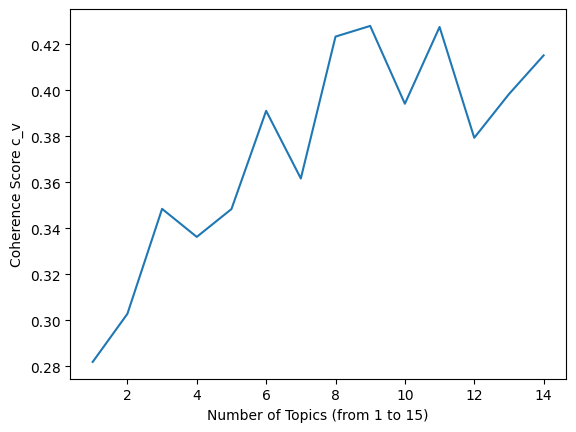

In [30]:
# creating lda object and choosing number of topics
nl_lda_model = LDAModel(nl_df)
nl_lda_model.preprocess(custom_stopwords=custom_stopwords)  
nl_lda_model.create_bow_model() 
nl_lda_model.plot_optimal_coherent_scores() 

In [31]:
# number of topics = 3 another good examples are 6 or 9 based on the c_v measure
nl_lda_model.create_lda_model(3)

nl_lda_model.format_topics_sentences()
nl_df = nl_lda_model.df
nl_df.head()

INFO:gensim.models.ldamodel:using symmetric alpha at 0.3333333333333333
INFO:gensim.models.ldamodel:using symmetric eta at 0.3333333333333333
INFO:gensim.models.ldamodel:using serial LDA version on this node
INFO:gensim.models.ldamulticore:running online LDA training, 3 topics, 100 passes over the supplied corpus of 981 documents, updating every 8000 documents, evaluating every ~981 documents, iterating 100x with a convergence threshold of 0.001000
INFO:gensim.models.ldamulticore:training LDA model using 4 processes
INFO:gensim.models.ldamulticore:PROGRESS: pass 0, dispatched chunk #0 = documents up to #981/981, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.333): 0.009*"exercise" + 0.007*"strength" + 0.006*"day" + 0.006*"fat" + 0.006*"sleep" + 0.006*"mass" + 0.005*"performance" + 0.005*"recovery" + 0.005*"work" + 0.005*"bone"
INFO:gensim.models.ldamodel:topic #1 (0.333): 0.013*"protein" + 0.009*"exercise" + 0.008*"day" + 0.007*"percent" + 0.007*"muscles" + 0.006*"sym

INFO:gensim.models.ldamulticore:PROGRESS: pass 8, dispatched chunk #0 = documents up to #981/981, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.333): 0.010*"day" + 0.009*"sleep" + 0.009*"strength" + 0.009*"percent" + 0.008*"work" + 0.008*"time" + 0.008*"exercise" + 0.008*"mass" + 0.008*"lifting" + 0.007*"endurance"
INFO:gensim.models.ldamodel:topic #1 (0.333): 0.019*"protein" + 0.011*"exercise" + 0.009*"foods" + 0.009*"grams" + 0.009*"gut" + 0.008*"day" + 0.007*"muscles" + 0.007*"weight" + 0.007*"recovery" + 0.007*"eat"
INFO:gensim.models.ldamodel:topic #2 (0.333): 0.016*"estrogen" + 0.015*"levels" + 0.009*"health" + 0.008*"help" + 0.008*"sleep" + 0.007*"menopausal" + 0.007*"hormones" + 0.007*"progesterone" + 0.007*"symptoms" + 0.007*"stress"
INFO:gensim.models.ldamodel:topic diff=0.076629, rho=0.324605
INFO:gensim.models.ldamodel:-6.871 per-word bound, 117.0 perplexity estimate based on a held-out corpus of 981 documents with 24985 words
INFO:gensim.models.ldamultic

INFO:gensim.models.ldamodel:topic #2 (0.333): 0.016*"estrogen" + 0.015*"levels" + 0.010*"health" + 0.010*"symptoms" + 0.009*"help" + 0.008*"menopausal" + 0.007*"hormones" + 0.007*"sleep" + 0.007*"stress" + 0.007*"progesterone"
INFO:gensim.models.ldamodel:topic diff=0.037941, rho=0.239111
INFO:gensim.models.ldamodel:-6.830 per-word bound, 113.8 perplexity estimate based on a held-out corpus of 981 documents with 24985 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 17, dispatched chunk #0 = documents up to #981/981, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.333): 0.011*"day" + 0.010*"sleep" + 0.010*"strength" + 0.009*"percent" + 0.009*"work" + 0.008*"time" + 0.008*"endurance" + 0.008*"mass" + 0.008*"exercise" + 0.008*"hard"
INFO:gensim.models.ldamodel:topic #1 (0.333): 0.021*"protein" + 0.011*"exercise" + 0.010*"foods" + 0.010*"grams" + 0.009*"gut" + 0.008*"eat" + 0.007*"right" + 0.007*"day" + 0.007*"recovery" + 0.007*"muscles"
INFO:gensim.models.ldamodel:top

INFO:gensim.models.ldamodel:topic #0 (0.333): 0.012*"day" + 0.010*"sleep" + 0.010*"strength" + 0.009*"work" + 0.009*"percent" + 0.008*"time" + 0.008*"endurance" + 0.008*"hard" + 0.008*"mass" + 0.008*"exercise"
INFO:gensim.models.ldamodel:topic #1 (0.333): 0.022*"protein" + 0.011*"exercise" + 0.011*"foods" + 0.010*"grams" + 0.010*"gut" + 0.009*"eat" + 0.008*"right" + 0.007*"muscles" + 0.007*"recovery" + 0.007*"day"
INFO:gensim.models.ldamodel:topic #2 (0.333): 0.016*"estrogen" + 0.015*"levels" + 0.011*"symptoms" + 0.011*"health" + 0.009*"help" + 0.008*"menopausal" + 0.007*"hormones" + 0.007*"stress" + 0.007*"sleep" + 0.007*"progesterone"
INFO:gensim.models.ldamodel:topic diff=0.020533, rho=0.194292
INFO:gensim.models.ldamodel:-6.813 per-word bound, 112.4 perplexity estimate based on a held-out corpus of 981 documents with 24985 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 26, dispatched chunk #0 = documents up to #981/981, outstanding queue size 1
INFO:gensim.models.ldamodel:top

INFO:gensim.models.ldamodel:topic diff=0.012959, rho=0.170275
INFO:gensim.models.ldamodel:-6.807 per-word bound, 111.9 perplexity estimate based on a held-out corpus of 981 documents with 24985 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 34, dispatched chunk #0 = documents up to #981/981, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.333): 0.012*"day" + 0.010*"sleep" + 0.010*"strength" + 0.009*"work" + 0.008*"time" + 0.008*"endurance" + 0.008*"hard" + 0.008*"percent" + 0.008*"mass" + 0.008*"exercise"
INFO:gensim.models.ldamodel:topic #1 (0.333): 0.023*"protein" + 0.011*"exercise" + 0.011*"foods" + 0.010*"grams" + 0.010*"gut" + 0.009*"eat" + 0.008*"right" + 0.007*"muscles" + 0.007*"blood" + 0.007*"eating"
INFO:gensim.models.ldamodel:topic #2 (0.333): 0.016*"estrogen" + 0.015*"levels" + 0.012*"symptoms" + 0.011*"health" + 0.009*"help" + 0.008*"menopausal" + 0.007*"hormones" + 0.007*"stress" + 0.007*"sleep" + 0.006*"progesterone"
INFO:gensim.models.ldamodel:top

INFO:gensim.models.ldamodel:topic #1 (0.333): 0.023*"protein" + 0.011*"foods" + 0.011*"exercise" + 0.010*"grams" + 0.010*"gut" + 0.009*"eat" + 0.009*"right" + 0.007*"muscles" + 0.007*"blood" + 0.007*"eating"
INFO:gensim.models.ldamodel:topic #2 (0.333): 0.016*"estrogen" + 0.015*"levels" + 0.012*"symptoms" + 0.011*"health" + 0.009*"help" + 0.008*"menopausal" + 0.007*"hormones" + 0.007*"stress" + 0.007*"risk" + 0.006*"progesterone"
INFO:gensim.models.ldamodel:topic diff=0.008594, rho=0.151636
INFO:gensim.models.ldamodel:-6.803 per-word bound, 111.6 perplexity estimate based on a held-out corpus of 981 documents with 24985 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 43, dispatched chunk #0 = documents up to #981/981, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.333): 0.012*"day" + 0.010*"sleep" + 0.010*"strength" + 0.009*"work" + 0.008*"time" + 0.008*"hard" + 0.008*"endurance" + 0.008*"exercise" + 0.007*"mass" + 0.007*"percent"
INFO:gensim.models.ldamodel:topi

INFO:gensim.models.ldamodel:-6.801 per-word bound, 111.5 perplexity estimate based on a held-out corpus of 981 documents with 24985 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 51, dispatched chunk #0 = documents up to #981/981, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.333): 0.012*"day" + 0.010*"sleep" + 0.010*"strength" + 0.010*"work" + 0.009*"time" + 0.008*"hard" + 0.008*"endurance" + 0.008*"exercise" + 0.007*"recovery" + 0.007*"lifting"
INFO:gensim.models.ldamodel:topic #1 (0.333): 0.023*"protein" + 0.011*"foods" + 0.011*"exercise" + 0.011*"grams" + 0.011*"gut" + 0.010*"eat" + 0.009*"right" + 0.007*"muscles" + 0.007*"blood" + 0.007*"eating"
INFO:gensim.models.ldamodel:topic #2 (0.333): 0.016*"estrogen" + 0.015*"levels" + 0.012*"symptoms" + 0.011*"health" + 0.009*"help" + 0.008*"menopausal" + 0.007*"hormones" + 0.007*"risk" + 0.007*"stress" + 0.006*"progesterone"
INFO:gensim.models.ldamodel:topic diff=0.006015, rho=0.138026
INFO:gensim.models.ldamodel:

INFO:gensim.models.ldamodel:topic #1 (0.333): 0.023*"protein" + 0.011*"foods" + 0.011*"exercise" + 0.011*"gut" + 0.011*"grams" + 0.010*"eat" + 0.009*"right" + 0.007*"muscles" + 0.007*"blood" + 0.007*"eating"
INFO:gensim.models.ldamodel:topic #2 (0.333): 0.016*"estrogen" + 0.015*"levels" + 0.012*"symptoms" + 0.011*"health" + 0.009*"help" + 0.008*"menopausal" + 0.007*"hormones" + 0.007*"risk" + 0.006*"stress" + 0.006*"progesterone"
INFO:gensim.models.ldamodel:topic diff=0.004537, rho=0.128575
INFO:gensim.models.ldamodel:-6.799 per-word bound, 111.4 perplexity estimate based on a held-out corpus of 981 documents with 24985 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 60, dispatched chunk #0 = documents up to #981/981, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.333): 0.012*"day" + 0.010*"sleep" + 0.010*"strength" + 0.010*"work" + 0.009*"time" + 0.008*"hard" + 0.008*"endurance" + 0.008*"exercise" + 0.008*"recovery" + 0.007*"lifting"
INFO:gensim.models.ldamodel:

INFO:gensim.models.ldamodel:topic diff=0.003615, rho=0.120833
INFO:gensim.models.ldamodel:-6.798 per-word bound, 111.3 perplexity estimate based on a held-out corpus of 981 documents with 24985 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 68, dispatched chunk #0 = documents up to #981/981, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.333): 0.012*"day" + 0.011*"sleep" + 0.010*"work" + 0.010*"strength" + 0.009*"time" + 0.008*"hard" + 0.008*"endurance" + 0.008*"exercise" + 0.008*"recovery" + 0.007*"lifting"
INFO:gensim.models.ldamodel:topic #1 (0.333): 0.024*"protein" + 0.011*"foods" + 0.011*"exercise" + 0.011*"gut" + 0.011*"grams" + 0.010*"eat" + 0.009*"right" + 0.007*"blood" + 0.007*"eating" + 0.007*"muscles"
INFO:gensim.models.ldamodel:topic #2 (0.333): 0.015*"estrogen" + 0.015*"levels" + 0.012*"symptoms" + 0.011*"health" + 0.009*"help" + 0.008*"menopausal" + 0.007*"hormones" + 0.007*"risk" + 0.006*"stress" + 0.006*"progesterone"
INFO:gensim.models.ldamodel:

INFO:gensim.models.ldamodel:topic #1 (0.333): 0.024*"protein" + 0.011*"foods" + 0.011*"exercise" + 0.011*"gut" + 0.011*"grams" + 0.010*"eat" + 0.009*"right" + 0.007*"blood" + 0.007*"eating" + 0.007*"muscles"
INFO:gensim.models.ldamodel:topic #2 (0.333): 0.015*"estrogen" + 0.015*"levels" + 0.012*"symptoms" + 0.011*"health" + 0.009*"help" + 0.008*"menopausal" + 0.007*"hormones" + 0.007*"risk" + 0.006*"stress" + 0.006*"progesterone"
INFO:gensim.models.ldamodel:topic diff=0.002904, rho=0.113599
INFO:gensim.models.ldamodel:-6.798 per-word bound, 111.2 perplexity estimate based on a held-out corpus of 981 documents with 24985 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 77, dispatched chunk #0 = documents up to #981/981, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.333): 0.012*"day" + 0.011*"sleep" + 0.010*"work" + 0.010*"strength" + 0.009*"time" + 0.008*"hard" + 0.008*"endurance" + 0.008*"exercise" + 0.008*"recovery" + 0.007*"lifting"
INFO:gensim.models.ldamodel:

INFO:gensim.models.ldamodel:topic diff=0.002434, rho=0.108154
INFO:gensim.models.ldamodel:-6.797 per-word bound, 111.2 perplexity estimate based on a held-out corpus of 981 documents with 24985 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 85, dispatched chunk #0 = documents up to #981/981, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.333): 0.012*"day" + 0.011*"sleep" + 0.010*"work" + 0.010*"strength" + 0.009*"time" + 0.008*"hard" + 0.008*"endurance" + 0.008*"exercise" + 0.008*"recovery" + 0.007*"lifting"
INFO:gensim.models.ldamodel:topic #1 (0.333): 0.024*"protein" + 0.011*"foods" + 0.011*"gut" + 0.011*"grams" + 0.011*"exercise" + 0.010*"eat" + 0.009*"right" + 0.007*"blood" + 0.007*"eating" + 0.007*"muscles"
INFO:gensim.models.ldamodel:topic #2 (0.333): 0.015*"estrogen" + 0.015*"levels" + 0.012*"symptoms" + 0.011*"health" + 0.009*"help" + 0.008*"menopausal" + 0.007*"hormones" + 0.007*"risk" + 0.006*"stress" + 0.006*"progesterone"
INFO:gensim.models.ldamodel:

INFO:gensim.models.ldamodel:topic #1 (0.333): 0.024*"protein" + 0.011*"foods" + 0.011*"gut" + 0.011*"grams" + 0.011*"exercise" + 0.010*"eat" + 0.009*"right" + 0.007*"blood" + 0.007*"eating" + 0.007*"muscles"
INFO:gensim.models.ldamodel:topic #2 (0.333): 0.015*"estrogen" + 0.015*"levels" + 0.012*"symptoms" + 0.011*"health" + 0.009*"help" + 0.008*"menopausal" + 0.007*"hormones" + 0.007*"risk" + 0.006*"stress" + 0.006*"percent"
INFO:gensim.models.ldamodel:topic diff=0.002131, rho=0.102874
INFO:gensim.models.ldamodel:-6.797 per-word bound, 111.2 perplexity estimate based on a held-out corpus of 981 documents with 24985 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 94, dispatched chunk #0 = documents up to #981/981, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.333): 0.012*"day" + 0.011*"sleep" + 0.010*"work" + 0.010*"strength" + 0.009*"time" + 0.008*"hard" + 0.008*"endurance" + 0.008*"recovery" + 0.008*"exercise" + 0.007*"muscles"
INFO:gensim.models.ldamodel:topic

level_0  index        book  chapter  paragraph_number  \
0        0   1157  Next Level        1                 1   
1        1   1158  Next Level        1                 2   
2        2   1159  Next Level        1                 3   
3        3   1160  Next Level        1                 4   
4        4   1161  Next Level        1                 5   

                                           paragraph  \
0  THE STATS. THE STIGMA. THE SILENCE.How we thin...   
1  When you look at it that way, it's all the mor...   
2  The Puritan times weren't much better. If you ...   
3  Menopause finally surfaced as a recognized med...   
4  Things didn't really get much better even in w...   

                                              tokens  \
0  [stats, stigma, silence, think, talk, matters,...   
1  [look, way, upsetting, negative, messaging, ce...   
2  [puritan, times, weren't, better, pore, histor...   
3  [finally, surfaced, recognized, medical, condi...   
4  [things, better, consider, modern, times, earl...   

                                           processed  dominant_topic  \
0  [think, talk, matters, life, years, average_ag...               2   
1  [look, way, negative, time, syndrome, stage, w...               0   
2  [times, better, find, menopausal, primary, nat...               2   
3  [finally, medical, improve, time, longer, able...               2   
4  [things, better, consider, times, early, menop...               2   

   perc_contribution                                     topic_keywords  
0             0.5025  estrogen, levels, symptoms, health, help, meno...  
1             0.6672  day, sleep, work, strength, time, hard, endura...  
2             0.9342  estrogen, levels, symptoms, health, help, meno...  
3             0.9444  estrogen, levels, symptoms, health, help, meno...  
4             0.9672  estrogen, levels, symptoms, health, help, meno...

In [32]:
nl_sentiment_model = Sentiment(nl_df)
nl_sentiment_model.predict(load_from_file=True, file_name='out/sentiment.csv')
nl_sentiment_model.df.head()

INFO:root:loading sentiments from already exported file:
	out/sentiment.csv
INFO:root:left join done and sentiments are loaded - check: 981==981?


level_0  index        book  chapter  paragraph_number  \
0        0   1157  Next Level        1                 1   
1        1   1158  Next Level        1                 2   
2        2   1159  Next Level        1                 3   
3        3   1160  Next Level        1                 4   
4        4   1161  Next Level        1                 5   

                                           paragraph  \
0  THE STATS. THE STIGMA. THE SILENCE.How we thin...   
1  When you look at it that way, it's all the mor...   
2  The Puritan times weren't much better. If you ...   
3  Menopause finally surfaced as a recognized med...   
4  Things didn't really get much better even in w...   

                                              tokens  \
0  [stats, stigma, silence, think, talk, matters,...   
1  [look, way, upsetting, negative, messaging, ce...   
2  [puritan, times, weren't, better, pore, histor...   
3  [finally, surfaced, recognized, medical, condi...   
4  [things, better, consider, modern, times, earl...   

                                           processed  dominant_topic  \
0  [think, talk, matters, life, years, average_ag...               2   
1  [look, way, negative, time, syndrome, stage, w...               0   
2  [times, better, find, menopausal, primary, nat...               2   
3  [finally, medical, improve, time, longer, able...               2   
4  [things, better, consider, times, early, menop...               2   

   perc_contribution                                     topic_keywords  \
0             0.5025  estrogen, levels, symptoms, health, help, meno...   
1             0.6672  day, sleep, work, strength, time, hard, endura...   
2             0.9342  estrogen, levels, symptoms, health, help, meno...   
3             0.9444  estrogen, levels, symptoms, health, help, meno...   
4             0.9672  estrogen, levels, symptoms, health, help, meno...   

  sentiment  
0   NEUTRAL  
1  NEGATIVE  
2  NEGATIVE  
3  NEGATIVE  
4  NEGATIVE

In [33]:
nl_sentiment_model.export_to_csv('out/sentiments_nl.csv')

INFO:root:file is writen successfully


INFO:root:chapter-topic treemap html is saved in: 
	figures/nl_chapter_topic.html
INFO:root:topic-sentiment treemap html is saved in: 
	figures/nl_topic_sentment.html
INFO:root:pyvis html visualization is saved in: 
	figures/nl_pyvis_topics.html
/Users/ehsanhamzei/opt/anaconda3/envs/lda_env/lib/python3.11/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.

INFO:root:wordclouds are generated and saved in:	figures/nl_wordclouds.svg


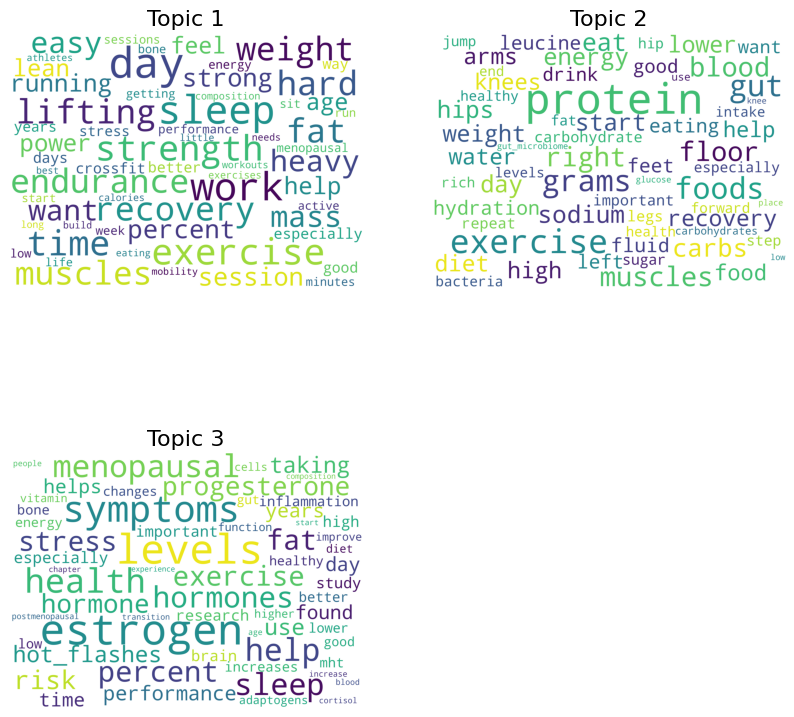

In [34]:
nl_vis = Vis(sentiment=nl_sentiment_model, lda=nl_lda_model)
# chapter sentiments already covered in all books in the shelf 
# - no change (sentiments are the same only topics are changed)

nl_vis.treemap_chapter_topic('figures/nl_chapter_topic.html')  # treemap of chapter -> topics
nl_vis.treemap_topic_sentiment('figures/nl_topic_sentment.html')  # treemap of topics -> sentiments
nl_vis.pyviz_topics('figures/nl_pyvis_topics.html')  # pyVis topic analysis
try:
    nl_vis.generate_topics_wordcloud('figures/nl_wordclouds.svg')
except:
    print('wordcloud cannot be generated.')

### 3. Queen Menopause

In [35]:
qm_df = bookshelf.create_corpus_custom_df(qm_book_name)
qm_df = qm_df.reset_index()
qm_df.head()

level_0  index             book  chapter  paragraph_number  \
0        0   2138  Queen Menopause        1                 1   
1        1   2139  Queen Menopause        1                 2   
2        2   2140  Queen Menopause        1                 3   
3        3   2141  Queen Menopause        1                 4   
4        4   2142  Queen Menopause        1                 5   

                                           paragraph  
0  I had other names for this book, such as,Losin...  
1  I needed to come back and rewrite the beginnin...  
2  This is not your typical self-help book. There...  
3  Menopause is an earthquake, shaking my interna...  
4  So, who am I to be talking about menopause?Sim...

INFO:root:Calling preprocessing in LDA model:

INFO:root:Preprocessor initiated...
INFO:root:	stopwords length (standard): 326
INFO:root:	stopwords length: 381
INFO:root:	All paragraph are normalized by removing unwanted characters
INFO:root:	tokenization and initial preprocessing is done
INFO:root:	word count is done:
INFO:root:		{'like': 243, 'life': 161, 'love': 156, 'time': 224, 'feel': 232, 'body': 182, 'know': 171}

INFO:gensim.models.phrases:collecting all words and their counts
INFO:gensim.models.phrases:PROGRESS: at sentence #0, processed 0 words and 0 word types
INFO:gensim.models.phrases:collected 31962 token types (unigram + bigrams) from a corpus of 28042 words and 924 sentences
INFO:gensim.models.phrases:merged Phrases<31962 vocab, min_count=5, threshold=100, max_vocab_size=40000000>
INFO:gensim.utils:Phrases lifecycle event {'msg': 'built Phrases<31962 vocab, min_count=5, threshold=100, max_vocab_size=40000000> in 0.02s', 'datetime': '2023-06-11T21:23:54.731100', 'gensim

preprocessing workflow started...


INFO:gensim.models.ldamulticore:PROGRESS: pass 0, dispatched chunk #0 = documents up to #924/924, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (1.000): 0.010*"body" + 0.010*"know" + 0.009*"life" + 0.009*"love" + 0.008*"need" + 0.007*"way" + 0.007*"want" + 0.007*"symptoms" + 0.006*"feeling" + 0.005*"felt"
INFO:gensim.models.ldamodel:topic diff=0.529621, rho=1.000000
INFO:gensim.models.ldamodel:-6.648 per-word bound, 100.3 perplexity estimate based on a held-out corpus of 924 documents with 16927 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 1, dispatched chunk #0 = documents up to #924/924, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (1.000): 0.010*"body" + 0.010*"know" + 0.009*"life" + 0.009*"love" + 0.008*"need" + 0.007*"way" + 0.007*"want" + 0.007*"symptoms" + 0.006*"feeling" + 0.005*"felt"
INFO:gensim.models.ldamodel:topic diff=0.000057, rho=0.637318
INFO:gensim.models.ldamodel:-6.648 per-word bound, 100.3 perplexity estimate based on a held

INFO:gensim.models.ldamodel:topic diff=0.095017, rho=0.537448
INFO:gensim.models.ldamodel:-6.770 per-word bound, 109.2 perplexity estimate based on a held-out corpus of 924 documents with 16927 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 3, dispatched chunk #0 = documents up to #924/924, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.500): 0.011*"symptoms" + 0.010*"life" + 0.009*"want" + 0.009*"way" + 0.009*"need" + 0.007*"body" + 0.007*"years" + 0.006*"love" + 0.006*"sex" + 0.006*"change"
INFO:gensim.models.ldamodel:topic #1 (0.500): 0.014*"know" + 0.013*"body" + 0.011*"love" + 0.008*"life" + 0.008*"felt" + 0.007*"sleep" + 0.007*"feeling" + 0.007*"need" + 0.006*"look" + 0.006*"way"
INFO:gensim.models.ldamodel:topic diff=0.093079, rho=0.473408
INFO:gensim.models.ldamodel:-6.751 per-word bound, 107.7 perplexity estimate based on a held-out corpus of 924 documents with 16927 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 4, dispatched chunk #0 = documents

INFO:gensim.models.ldamodel:-6.914 per-word bound, 120.6 perplexity estimate based on a held-out corpus of 924 documents with 16927 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 2, dispatched chunk #0 = documents up to #924/924, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.333): 0.012*"symptoms" + 0.009*"life" + 0.009*"want" + 0.009*"years" + 0.009*"way" + 0.007*"day" + 0.007*"need" + 0.007*"change" + 0.007*"body" + 0.006*"love"
INFO:gensim.models.ldamodel:topic #1 (0.333): 0.015*"know" + 0.012*"love" + 0.010*"felt" + 0.010*"body" + 0.009*"sleep" + 0.008*"skin" + 0.007*"need" + 0.006*"life" + 0.006*"feeling" + 0.006*"look"
INFO:gensim.models.ldamodel:topic #2 (0.333): 0.014*"body" + 0.011*"life" + 0.010*"know" + 0.010*"need" + 0.009*"way" + 0.008*"want" + 0.008*"good" + 0.008*"love" + 0.008*"feeling" + 0.007*"symptoms"
INFO:gensim.models.ldamodel:topic diff=0.168883, rho=0.537448
INFO:gensim.models.ldamodel:-6.862 per-word bound, 116.3 perplexity estimate bas

INFO:gensim.topic_coherence.text_analysis:accumulated word occurrence stats for 984 virtual documents
INFO:gensim.models.ldamodel:using symmetric alpha at 0.25
INFO:gensim.models.ldamodel:using symmetric eta at 0.25
INFO:gensim.models.ldamodel:using serial LDA version on this node
INFO:gensim.models.ldamulticore:running online LDA training, 4 topics, 10 passes over the supplied corpus of 924 documents, updating every 16000 documents, evaluating every ~924 documents, iterating 10x with a convergence threshold of 0.001000
INFO:gensim.models.ldamulticore:training LDA model using 8 processes
INFO:gensim.models.ldamulticore:PROGRESS: pass 0, dispatched chunk #0 = documents up to #924/924, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.250): 0.010*"symptoms" + 0.010*"way" + 0.010*"want" + 0.009*"life" + 0.008*"body" + 0.008*"years" + 0.007*"love" + 0.007*"need" + 0.006*"day" + 0.006*"change"
INFO:gensim.models.ldamodel:topic #1 (0.250): 0.013*"know" + 0.010*"love" + 0.010*"

INFO:gensim.models.ldamodel:topic diff=0.142127, rho=0.366077
INFO:gensim.models.ldamodel:-6.823 per-word bound, 113.2 perplexity estimate based on a held-out corpus of 924 documents with 16927 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 7, dispatched chunk #0 = documents up to #924/924, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.250): 0.020*"symptoms" + 0.014*"years" + 0.011*"perimenopause" + 0.010*"life" + 0.008*"hot_flushes" + 0.008*"way" + 0.008*"change" + 0.008*"day" + 0.008*"hrt" + 0.008*"cycle"
INFO:gensim.models.ldamodel:topic #1 (0.250): 0.015*"skin" + 0.013*"love" + 0.013*"felt" + 0.012*"body" + 0.011*"sleep" + 0.011*"know" + 0.007*"that's" + 0.007*"oil" + 0.007*"children" + 0.006*"fat"
INFO:gensim.models.ldamodel:topic #2 (0.250): 0.020*"body" + 0.011*"way" + 0.010*"anger" + 0.010*"good" + 0.010*"hair" + 0.009*"life" + 0.009*"know" + 0.008*"work" + 0.007*"new" + 0.007*"self"
INFO:gensim.models.ldamodel:topic #3 (0.250): 0.018*"need" + 0.016*"kn

INFO:gensim.models.ldamodel:topic #4 (0.200): 0.015*"body" + 0.014*"love" + 0.012*"life" + 0.011*"way" + 0.008*"sleep" + 0.007*"know" + 0.007*"work" + 0.007*"want" + 0.007*"going" + 0.006*"come"
INFO:gensim.models.ldamodel:topic diff=0.308778, rho=0.537448
INFO:gensim.models.ldamodel:-7.005 per-word bound, 128.4 perplexity estimate based on a held-out corpus of 924 documents with 16927 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 3, dispatched chunk #0 = documents up to #924/924, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.200): 0.017*"symptoms" + 0.013*"years" + 0.011*"life" + 0.010*"way" + 0.009*"change" + 0.008*"hot_flushes" + 0.008*"sex" + 0.008*"day" + 0.007*"want" + 0.007*"hrt"
INFO:gensim.models.ldamodel:topic #1 (0.200): 0.017*"know" + 0.016*"skin" + 0.015*"felt" + 0.009*"sleep" + 0.008*"body" + 0.008*"love" + 0.007*"children" + 0.006*"feeling" + 0.006*"oil" + 0.006*"old"
INFO:gensim.models.ldamodel:topic #2 (0.200): 0.013*"body" + 0.010*"anger" + 0

INFO:gensim.models.ldamodel:-6.833 per-word bound, 114.0 perplexity estimate based on a held-out corpus of 924 documents with 16927 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 9, dispatched chunk #0 = documents up to #924/924, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.200): 0.023*"symptoms" + 0.015*"years" + 0.012*"perimenopause" + 0.010*"life" + 0.010*"hot_flushes" + 0.010*"hrt" + 0.009*"cycle" + 0.009*"change" + 0.009*"hormones" + 0.008*"age"
INFO:gensim.models.ldamodel:topic #1 (0.200): 0.021*"skin" + 0.018*"felt" + 0.014*"know" + 0.012*"sleep" + 0.008*"body" + 0.007*"old" + 0.007*"period" + 0.007*"use" + 0.007*"right" + 0.007*"vagina"
INFO:gensim.models.ldamodel:topic #2 (0.200): 0.015*"body" + 0.014*"hair" + 0.014*"anger" + 0.012*"help" + 0.011*"vitamin" + 0.011*"good" + 0.010*"health" + 0.009*"sex" + 0.009*"pain" + 0.009*"care"
INFO:gensim.models.ldamodel:topic #3 (0.200): 0.019*"need" + 0.019*"want" + 0.018*"know" + 0.013*"love" + 0.012*"life" + 0

INFO:gensim.models.ldamodel:topic #0 (0.167): 0.024*"symptoms" + 0.015*"years" + 0.011*"sex" + 0.010*"life" + 0.010*"hrt" + 0.010*"oestrogen" + 0.009*"hot_flushes" + 0.009*"want" + 0.009*"day" + 0.008*"change"
INFO:gensim.models.ldamodel:topic #4 (0.167): 0.012*"body" + 0.011*"life" + 0.010*"way" + 0.008*"work" + 0.008*"sleep" + 0.008*"fat" + 0.008*"mind" + 0.007*"going" + 0.007*"lou" + 0.007*"tea"
INFO:gensim.models.ldamodel:topic #3 (0.167): 0.021*"need" + 0.018*"know" + 0.010*"help" + 0.009*"want" + 0.007*"life" + 0.007*"talk" + 0.007*"love" + 0.007*"symptoms" + 0.007*"day" + 0.007*"support"
INFO:gensim.models.ldamodel:topic #2 (0.167): 0.013*"want" + 0.012*"know" + 0.012*"care" + 0.012*"anger" + 0.011*"life" + 0.011*"good" + 0.010*"people" + 0.010*"way" + 0.010*"body" + 0.009*"need"
INFO:gensim.models.ldamodel:topic diff=0.315727, rho=0.427882
INFO:gensim.models.ldamodel:-6.951 per-word bound, 123.7 perplexity estimate based on a held-out corpus of 924 documents with 16927 words
IN

INFO:gensim.topic_coherence.text_analysis:accumulated word occurrence stats for 984 virtual documents
INFO:gensim.models.ldamodel:using symmetric alpha at 0.14285714285714285
INFO:gensim.models.ldamodel:using symmetric eta at 0.14285714285714285
INFO:gensim.models.ldamodel:using serial LDA version on this node
INFO:gensim.models.ldamulticore:running online LDA training, 7 topics, 10 passes over the supplied corpus of 924 documents, updating every 16000 documents, evaluating every ~924 documents, iterating 10x with a convergence threshold of 0.001000
INFO:gensim.models.ldamulticore:training LDA model using 8 processes
INFO:gensim.models.ldamulticore:PROGRESS: pass 0, dispatched chunk #0 = documents up to #924/924, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #5 (0.143): 0.017*"body" + 0.013*"love" + 0.010*"way" + 0.010*"life" + 0.010*"felt" + 0.009*"know" + 0.008*"sleep" + 0.008*"feeling" + 0.008*"need" + 0.006*"think"
INFO:gensim.models.ldamodel:topic #1 (0.143): 0.015*"k

INFO:gensim.models.ldamodel:topic diff=0.334871, rho=0.393384
INFO:gensim.models.ldamodel:-6.954 per-word bound, 123.9 perplexity estimate based on a held-out corpus of 924 documents with 16927 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 6, dispatched chunk #0 = documents up to #924/924, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #1 (0.143): 0.027*"skin" + 0.015*"vitamin" + 0.015*"hair" + 0.012*"know" + 0.010*"blood" + 0.008*"dry" + 0.008*"high" + 0.007*"good" + 0.007*"water" + 0.007*"foods"
INFO:gensim.models.ldamodel:topic #4 (0.143): 0.010*"body" + 0.010*"life" + 0.010*"lou" + 0.009*"way" + 0.009*"depression" + 0.009*"changes" + 0.008*"work" + 0.008*"mind" + 0.008*"going" + 0.007*"friends"
INFO:gensim.models.ldamodel:topic #5 (0.143): 0.025*"love" + 0.021*"felt" + 0.018*"body" + 0.014*"way" + 0.013*"life" + 0.012*"feeling" + 0.011*"look" + 0.010*"know" + 0.008*"think" + 0.008*"feelings"
INFO:gensim.models.ldamodel:topic #0 (0.143): 0.027*"symptoms" + 0.018*"

INFO:gensim.models.ldamodel:topic #7 (0.125): 0.013*"life" + 0.013*"want" + 0.012*"need" + 0.011*"symptoms" + 0.010*"body" + 0.008*"perimenopause" + 0.008*"way" + 0.008*"know" + 0.007*"love" + 0.007*"years"
INFO:gensim.models.ldamodel:topic #1 (0.125): 0.017*"know" + 0.016*"skin" + 0.008*"old" + 0.008*"look" + 0.007*"having" + 0.007*"felt" + 0.006*"love" + 0.006*"sleep" + 0.006*"feeling" + 0.006*"day"
INFO:gensim.models.ldamodel:topic #4 (0.125): 0.011*"life" + 0.010*"body" + 0.009*"love" + 0.009*"way" + 0.007*"work" + 0.007*"lou" + 0.007*"know" + 0.007*"changes" + 0.007*"want" + 0.006*"mind"
INFO:gensim.models.ldamodel:topic #2 (0.125): 0.011*"know" + 0.011*"good" + 0.011*"anger" + 0.010*"body" + 0.010*"going" + 0.009*"care" + 0.009*"feeling" + 0.009*"symptoms" + 0.008*"want" + 0.008*"people"
INFO:gensim.models.ldamodel:topic #3 (0.125): 0.015*"need" + 0.011*"know" + 0.009*"love" + 0.009*"body" + 0.007*"day" + 0.006*"help" + 0.006*"want" + 0.006*"night" + 0.006*"people" + 0.006*"look"

INFO:gensim.models.ldamodel:topic #6 (0.125): 0.015*"body" + 0.013*"help" + 0.013*"pain" + 0.012*"life" + 0.012*"fat" + 0.011*"sleep" + 0.009*"good" + 0.009*"change" + 0.008*"way" + 0.008*"great"
INFO:gensim.models.ldamodel:topic #1 (0.125): 0.032*"skin" + 0.017*"hair" + 0.015*"oil" + 0.013*"vitamin" + 0.011*"old" + 0.010*"know" + 0.009*"dry" + 0.009*"vagina" + 0.008*"job" + 0.008*"healthy"
INFO:gensim.models.ldamodel:topic #7 (0.125): 0.014*"symptoms" + 0.012*"need" + 0.011*"life" + 0.011*"want" + 0.011*"stress" + 0.011*"body" + 0.010*"way" + 0.010*"perimenopause" + 0.009*"yoga" + 0.009*"foods"
INFO:gensim.models.ldamodel:topic #2 (0.125): 0.018*"anger" + 0.017*"know" + 0.017*"care" + 0.014*"good" + 0.012*"body" + 0.011*"sex" + 0.011*"want" + 0.011*"going" + 0.010*"experience" + 0.009*"feeling"
INFO:gensim.models.ldamodel:topic diff=0.284441, rho=0.343766
INFO:gensim.models.ldamodel:-6.964 per-word bound, 124.9 perplexity estimate based on a held-out corpus of 924 documents with 16927

INFO:gensim.models.ldamodel:topic #0 (0.111): 0.018*"symptoms" + 0.016*"years" + 0.011*"change" + 0.010*"hot_flushes" + 0.010*"day" + 0.009*"sex" + 0.009*"young" + 0.008*"hormones" + 0.008*"oestrogen" + 0.007*"way"
INFO:gensim.models.ldamodel:topic #1 (0.111): 0.024*"skin" + 0.021*"know" + 0.009*"old" + 0.008*"talk" + 0.008*"felt" + 0.008*"hair" + 0.008*"having" + 0.008*"right" + 0.007*"feeling" + 0.007*"vitamin"
INFO:gensim.models.ldamodel:topic diff=0.672951, rho=0.537448
INFO:gensim.models.ldamodel:-7.231 per-word bound, 150.3 perplexity estimate based on a held-out corpus of 924 documents with 16927 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 3, dispatched chunk #0 = documents up to #924/924, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #5 (0.111): 0.030*"love" + 0.020*"body" + 0.020*"felt" + 0.014*"way" + 0.010*"feeling" + 0.009*"sleep" + 0.009*"think" + 0.008*"life" + 0.007*"feelings" + 0.007*"cycle"
INFO:gensim.models.ldamodel:topic #2 (0.111): 0.016*"know

INFO:gensim.models.ldamodel:topic #4 (0.111): 0.014*"going" + 0.014*"life" + 0.012*"work" + 0.012*"things" + 0.011*"friends" + 0.010*"lou" + 0.009*"cam" + 0.009*"home" + 0.008*"mother" + 0.008*"little"
INFO:gensim.models.ldamodel:topic diff=0.268677, rho=0.325094
INFO:gensim.models.ldamodel:-6.980 per-word bound, 126.2 perplexity estimate based on a held-out corpus of 924 documents with 16927 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 9, dispatched chunk #0 = documents up to #924/924, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #2 (0.111): 0.026*"know" + 0.015*"need" + 0.011*"feeling" + 0.011*"experience" + 0.011*"care" + 0.010*"self" + 0.010*"tell" + 0.010*"way" + 0.010*"anger" + 0.010*"people"
INFO:gensim.models.ldamodel:topic #0 (0.111): 0.026*"symptoms" + 0.019*"years" + 0.016*"hot_flushes" + 0.015*"perimenopause" + 0.013*"hormones" + 0.013*"change" + 0.012*"oestrogen" + 0.011*"cycle" + 0.011*"hrt" + 0.010*"periods"
INFO:gensim.models.ldamodel:topic #4 (0.1

INFO:gensim.models.ldamulticore:PROGRESS: pass 4, dispatched chunk #0 = documents up to #924/924, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #5 (0.100): 0.026*"love" + 0.022*"felt" + 0.016*"body" + 0.015*"way" + 0.011*"feeling" + 0.010*"life" + 0.009*"things" + 0.008*"think" + 0.008*"speak" + 0.008*"cycle"
INFO:gensim.models.ldamodel:topic #6 (0.100): 0.021*"body" + 0.015*"love" + 0.015*"fat" + 0.014*"know" + 0.011*"life" + 0.011*"need" + 0.010*"partner" + 0.009*"sexy" + 0.009*"going" + 0.008*"help"
INFO:gensim.models.ldamodel:topic #8 (0.100): 0.013*"way" + 0.012*"better" + 0.012*"that's" + 0.011*"body" + 0.011*"symptoms" + 0.009*"need" + 0.008*"love" + 0.008*"best" + 0.008*"think" + 0.008*"life"
INFO:gensim.models.ldamodel:topic #7 (0.100): 0.017*"life" + 0.015*"want" + 0.013*"symptoms" + 0.012*"body" + 0.010*"foods" + 0.010*"changes" + 0.010*"perimenopause" + 0.009*"need" + 0.009*"iron" + 0.009*"know"
INFO:gensim.models.ldamodel:topic #4 (0.100): 0.016*"life" + 0.011

INFO:gensim.topic_coherence.probability_estimation:using ParallelWordOccurrenceAccumulator<processes=7, batch_size=64> to estimate probabilities from sliding windows
INFO:gensim.topic_coherence.text_analysis:7 accumulators retrieved from output queue
INFO:gensim.topic_coherence.text_analysis:accumulated word occurrence stats for 984 virtual documents
INFO:gensim.models.ldamodel:using symmetric alpha at 0.09090909090909091
INFO:gensim.models.ldamodel:using symmetric eta at 0.09090909090909091
INFO:gensim.models.ldamodel:using serial LDA version on this node
INFO:gensim.models.ldamulticore:running online LDA training, 11 topics, 10 passes over the supplied corpus of 924 documents, updating every 16000 documents, evaluating every ~924 documents, iterating 10x with a convergence threshold of 0.001000
INFO:gensim.models.ldamulticore:training LDA model using 8 processes
INFO:gensim.models.ldamulticore:PROGRESS: pass 0, dispatched chunk #0 = documents up to #924/924, outstanding queue size 1


INFO:gensim.models.ldamodel:topic #1 (0.091): 0.032*"skin" + 0.018*"hair" + 0.017*"know" + 0.016*"vitamin" + 0.012*"old" + 0.011*"job" + 0.010*"dry" + 0.010*"blood" + 0.009*"longer" + 0.008*"itchy"
INFO:gensim.models.ldamodel:topic #2 (0.091): 0.019*"want" + 0.019*"anger" + 0.016*"know" + 0.015*"care" + 0.014*"feeling" + 0.013*"self" + 0.012*"body" + 0.012*"sex" + 0.010*"going" + 0.009*"new"
INFO:gensim.models.ldamodel:topic diff=0.566004, rho=0.393384
INFO:gensim.models.ldamodel:-7.120 per-word bound, 139.1 perplexity estimate based on a held-out corpus of 924 documents with 16927 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 6, dispatched chunk #0 = documents up to #924/924, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #6 (0.091): 0.017*"body" + 0.013*"fat" + 0.013*"hormones" + 0.012*"love" + 0.011*"life" + 0.010*"look" + 0.010*"symptoms" + 0.010*"help" + 0.009*"change" + 0.008*"years"
INFO:gensim.models.ldamodel:topic #7 (0.091): 0.026*"life" + 0.017*"need" + 0.

INFO:gensim.models.ldamodel:topic diff=1.302236, rho=1.000000
INFO:gensim.models.ldamodel:-7.909 per-word bound, 240.3 perplexity estimate based on a held-out corpus of 924 documents with 16927 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 1, dispatched chunk #0 = documents up to #924/924, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #1 (0.083): 0.021*"know" + 0.018*"skin" + 0.010*"old" + 0.010*"felt" + 0.009*"having" + 0.008*"children" + 0.008*"life" + 0.007*"right" + 0.007*"look" + 0.007*"love"
INFO:gensim.models.ldamodel:topic #2 (0.083): 0.013*"anger" + 0.011*"life" + 0.011*"people" + 0.011*"want" + 0.010*"know" + 0.010*"experience" + 0.010*"feeling" + 0.009*"care" + 0.009*"body" + 0.009*"going"
INFO:gensim.models.ldamodel:topic #3 (0.083): 0.016*"need" + 0.012*"help" + 0.011*"know" + 0.009*"day" + 0.009*"body" + 0.009*"love" + 0.009*"aging" + 0.007*"experience" + 0.007*"care" + 0.007*"people"
INFO:gensim.models.ldamodel:topic #4 (0.083): 0.010*"body" + 0.010*"

INFO:gensim.models.ldamulticore:PROGRESS: pass 7, dispatched chunk #0 = documents up to #924/924, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #10 (0.083): 0.017*"know" + 0.012*"way" + 0.012*"modelling" + 0.011*"world" + 0.011*"day" + 0.011*"look" + 0.011*"girl" + 0.010*"good" + 0.010*"dolly" + 0.009*"magazine"
INFO:gensim.models.ldamodel:topic #6 (0.083): 0.017*"body" + 0.017*"fat" + 0.014*"going" + 0.013*"vagina" + 0.010*"best" + 0.010*"love" + 0.010*"life" + 0.009*"help" + 0.009*"pain" + 0.009*"sleep"
INFO:gensim.models.ldamodel:topic #9 (0.083): 0.022*"oil" + 0.022*"vitamin" + 0.021*"good" + 0.015*"magnesium" + 0.014*"sleep" + 0.013*"diet" + 0.012*"cent" + 0.011*"stress" + 0.011*"help" + 0.011*"helps"
INFO:gensim.models.ldamodel:topic #3 (0.083): 0.022*"need" + 0.020*"help" + 0.016*"know" + 0.013*"brain" + 0.013*"bed" + 0.013*"aging" + 0.012*"night" + 0.012*"gone" + 0.011*"experience" + 0.010*"children"
INFO:gensim.models.ldamodel:topic #5 (0.083): 0.034*"love" + 0.02

INFO:gensim.models.ldamodel:topic #11 (0.077): 0.017*"need" + 0.016*"beautiful" + 0.016*"feeling" + 0.014*"way" + 0.013*"love" + 0.013*"mind" + 0.012*"look" + 0.012*"little" + 0.011*"body" + 0.010*"new"
INFO:gensim.models.ldamodel:topic #9 (0.077): 0.016*"good" + 0.014*"sleep" + 0.013*"oil" + 0.013*"cam" + 0.008*"life" + 0.008*"body" + 0.008*"diet" + 0.008*"book" + 0.007*"cent" + 0.007*"feelings"
INFO:gensim.models.ldamodel:topic #6 (0.077): 0.014*"body" + 0.012*"life" + 0.011*"love" + 0.010*"feeling" + 0.010*"pain" + 0.009*"fat" + 0.009*"change" + 0.009*"going" + 0.008*"emotional" + 0.008*"symptoms"
INFO:gensim.models.ldamodel:topic #3 (0.077): 0.010*"remember" + 0.010*"body" + 0.010*"know" + 0.009*"thought" + 0.009*"share" + 0.008*"need" + 0.007*"people" + 0.007*"little" + 0.007*"hrt" + 0.007*"self"
INFO:gensim.models.ldamodel:topic diff=1.095412, rho=0.537448
INFO:gensim.models.ldamodel:-7.431 per-word bound, 172.5 perplexity estimate based on a held-out corpus of 924 documents with

INFO:gensim.models.ldamodel:topic #6 (0.077): 0.022*"body" + 0.017*"pain" + 0.016*"fat" + 0.014*"feeling" + 0.012*"life" + 0.011*"going" + 0.011*"change" + 0.011*"love" + 0.010*"emotional" + 0.009*"heard"
INFO:gensim.models.ldamodel:topic #9 (0.077): 0.023*"sleep" + 0.019*"oil" + 0.017*"cam" + 0.017*"good" + 0.012*"rich" + 0.011*"book" + 0.011*"diet" + 0.011*"breast_cancer" + 0.010*"cent" + 0.010*"body"
INFO:gensim.models.ldamodel:topic #0 (0.077): 0.020*"change" + 0.020*"symptoms" + 0.017*"hot_flushes" + 0.015*"menopausal" + 0.014*"age" + 0.012*"years" + 0.011*"heart" + 0.011*"life" + 0.011*"young" + 0.010*"perimenopause"
INFO:gensim.models.ldamodel:topic diff=0.360702, rho=0.325094
INFO:gensim.models.ldamodel:-7.119 per-word bound, 139.0 perplexity estimate based on a held-out corpus of 924 documents with 16927 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 9, dispatched chunk #0 = documents up to #924/924, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #8 (0.077): 

INFO:gensim.models.ldamodel:topic #13 (0.071): 0.021*"know" + 0.017*"sleep" + 0.015*"great" + 0.012*"way" + 0.012*"pain" + 0.011*"lot" + 0.010*"friends" + 0.010*"help" + 0.010*"dolly" + 0.010*"exercise"
INFO:gensim.models.ldamodel:topic diff=1.052725, rho=0.473408
INFO:gensim.models.ldamodel:-7.352 per-word bound, 163.3 perplexity estimate based on a held-out corpus of 924 documents with 16927 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 4, dispatched chunk #0 = documents up to #924/924, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #7 (0.071): 0.022*"want" + 0.014*"life" + 0.012*"need" + 0.010*"symptoms" + 0.010*"best" + 0.010*"felt" + 0.010*"longer" + 0.009*"foods" + 0.009*"making" + 0.007*"wanted"
INFO:gensim.models.ldamodel:topic #6 (0.071): 0.018*"body" + 0.018*"fat" + 0.017*"love" + 0.014*"life" + 0.011*"help" + 0.009*"tired" + 0.009*"looking" + 0.008*"oil" + 0.008*"half" + 0.008*"think"
INFO:gensim.models.ldamodel:topic #13 (0.071): 0.021*"know" + 0.018*"sle

INFO:gensim.models.ldamodel:topic diff=0.322935, rho=0.309167
INFO:gensim.models.ldamodel:-7.111 per-word bound, 138.2 perplexity estimate based on a held-out corpus of 924 documents with 16927 words
INFO:gensim.utils:LdaMulticore lifecycle event {'msg': 'trained LdaMulticore<num_terms=995, num_topics=14, decay=0.5, chunksize=2000> in 3.59s', 'datetime': '2023-06-11T21:24:59.307110', 'gensim': '4.3.1', 'python': '3.11.3 (main, May 15 2023, 10:43:03) [Clang 14.0.6 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'created'}
INFO:gensim.topic_coherence.probability_estimation:using ParallelWordOccurrenceAccumulator<processes=7, batch_size=64> to estimate probabilities from sliding windows
INFO:gensim.topic_coherence.text_analysis:7 accumulators retrieved from output queue
INFO:gensim.topic_coherence.text_analysis:accumulated word occurrence stats for 984 virtual documents


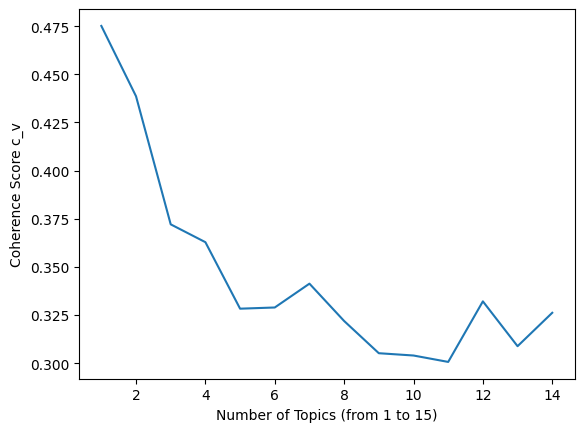

In [36]:
# creating lda object and choosing number of topics
qm_lda_model = LDAModel(qm_df)
qm_lda_model.preprocess(custom_stopwords=custom_stopwords)  
qm_lda_model.create_bow_model() 
qm_lda_model.plot_optimal_coherent_scores() 

In [37]:
# Apparently same topic :) number of topics = 4 or maybe 7 not sure about this one :)
qm_lda_model.create_lda_model(4)

qm_lda_model.format_topics_sentences()
qm_df = qm_lda_model.df
qm_df.head()

INFO:gensim.models.ldamodel:using symmetric alpha at 0.25
INFO:gensim.models.ldamodel:using symmetric eta at 0.25
INFO:gensim.models.ldamodel:using serial LDA version on this node
INFO:gensim.models.ldamulticore:running online LDA training, 4 topics, 100 passes over the supplied corpus of 924 documents, updating every 8000 documents, evaluating every ~924 documents, iterating 100x with a convergence threshold of 0.001000
INFO:gensim.models.ldamulticore:training LDA model using 4 processes
INFO:gensim.models.ldamulticore:PROGRESS: pass 0, dispatched chunk #0 = documents up to #924/924, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.250): 0.016*"life" + 0.008*"going" + 0.007*"look" + 0.007*"symptoms" + 0.007*"love" + 0.007*"feeling" + 0.007*"way" + 0.006*"change" + 0.006*"think" + 0.006*"little"
INFO:gensim.models.ldamodel:topic #1 (0.250): 0.015*"body" + 0.011*"way" + 0.010*"love" + 0.009*"life" + 0.008*"want" + 0.008*"know" + 0.007*"symptoms" + 0.007*"felt" + 0.007*"g

INFO:gensim.models.ldamodel:topic diff=0.084988, rho=0.366077
INFO:gensim.models.ldamodel:-6.827 per-word bound, 113.6 perplexity estimate based on a held-out corpus of 924 documents with 16927 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 7, dispatched chunk #0 = documents up to #924/924, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.250): 0.015*"life" + 0.008*"going" + 0.007*"symptoms" + 0.007*"use" + 0.007*"age" + 0.007*"help" + 0.007*"way" + 0.007*"love" + 0.007*"feeling" + 0.007*"good"
INFO:gensim.models.ldamodel:topic #1 (0.250): 0.017*"body" + 0.012*"way" + 0.010*"life" + 0.009*"sex" + 0.009*"love" + 0.009*"symptoms" + 0.008*"new" + 0.007*"good" + 0.007*"felt" + 0.007*"skin"
INFO:gensim.models.ldamodel:topic #2 (0.250): 0.013*"hair" + 0.011*"perimenopause" + 0.011*"day" + 0.008*"anger" + 0.008*"cycle" + 0.008*"hot_flushes" + 0.007*"years" + 0.007*"know" + 0.007*"modelling" + 0.007*"things"
INFO:gensim.models.ldamodel:topic #3 (0.250): 0.021*"know" + 0.0

INFO:gensim.models.ldamodel:topic #0 (0.250): 0.013*"life" + 0.009*"oil" + 0.009*"symptoms" + 0.009*"help" + 0.008*"use" + 0.008*"good" + 0.007*"age" + 0.007*"lou" + 0.007*"way" + 0.006*"going"
INFO:gensim.models.ldamodel:topic #1 (0.250): 0.017*"body" + 0.012*"way" + 0.010*"sex" + 0.010*"life" + 0.010*"symptoms" + 0.009*"new" + 0.008*"love" + 0.007*"good" + 0.007*"skin" + 0.007*"hrt"
INFO:gensim.models.ldamodel:topic #2 (0.250): 0.014*"hair" + 0.012*"perimenopause" + 0.012*"day" + 0.009*"cycle" + 0.009*"hot_flushes" + 0.008*"anger" + 0.008*"years" + 0.008*"modelling" + 0.007*"vitamin" + 0.007*"young"
INFO:gensim.models.ldamodel:topic #3 (0.250): 0.022*"know" + 0.020*"want" + 0.016*"love" + 0.016*"need" + 0.011*"feeling" + 0.011*"life" + 0.010*"body" + 0.009*"felt" + 0.009*"people" + 0.008*"going"
INFO:gensim.models.ldamodel:topic diff=0.039748, rho=0.254312
INFO:gensim.models.ldamodel:-6.795 per-word bound, 111.0 perplexity estimate based on a held-out corpus of 924 documents with 169

INFO:gensim.models.ldamodel:topic #2 (0.250): 0.014*"hair" + 0.013*"day" + 0.013*"perimenopause" + 0.010*"cycle" + 0.010*"hot_flushes" + 0.009*"anger" + 0.008*"years" + 0.008*"modelling" + 0.007*"young" + 0.007*"vitamin"
INFO:gensim.models.ldamodel:topic #3 (0.250): 0.022*"know" + 0.021*"want" + 0.018*"love" + 0.016*"need" + 0.012*"feeling" + 0.012*"life" + 0.010*"body" + 0.009*"felt" + 0.009*"people" + 0.009*"going"
INFO:gensim.models.ldamodel:topic diff=0.025950, rho=0.210997
INFO:gensim.models.ldamodel:-6.780 per-word bound, 109.9 perplexity estimate based on a held-out corpus of 924 documents with 16927 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 22, dispatched chunk #0 = documents up to #924/924, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.250): 0.012*"life" + 0.011*"symptoms" + 0.010*"oil" + 0.010*"help" + 0.009*"good" + 0.008*"use" + 0.007*"lou" + 0.007*"menopausal" + 0.007*"changes" + 0.007*"age"
INFO:gensim.models.ldamodel:topic #1 (0.250): 0.017*

INFO:gensim.models.ldamodel:topic #3 (0.250): 0.022*"know" + 0.021*"want" + 0.020*"love" + 0.016*"need" + 0.013*"feeling" + 0.013*"life" + 0.010*"felt" + 0.009*"body" + 0.009*"people" + 0.009*"going"
INFO:gensim.models.ldamodel:topic diff=0.018578, rho=0.184234
INFO:gensim.models.ldamodel:-6.770 per-word bound, 109.2 perplexity estimate based on a held-out corpus of 924 documents with 16927 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 29, dispatched chunk #0 = documents up to #924/924, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.250): 0.012*"symptoms" + 0.012*"life" + 0.011*"help" + 0.011*"oil" + 0.009*"good" + 0.008*"use" + 0.007*"menopausal" + 0.007*"changes" + 0.007*"lou" + 0.006*"experience"
INFO:gensim.models.ldamodel:topic #1 (0.250): 0.018*"body" + 0.012*"way" + 0.011*"sex" + 0.010*"symptoms" + 0.009*"new" + 0.009*"life" + 0.008*"skin" + 0.008*"sleep" + 0.007*"that's" + 0.007*"hrt"
INFO:gensim.models.ldamodel:topic #2 (0.250): 0.015*"hair" + 0.013*"d

INFO:gensim.models.ldamodel:topic diff=0.015160, rho=0.165607
INFO:gensim.models.ldamodel:-6.763 per-word bound, 108.6 perplexity estimate based on a held-out corpus of 924 documents with 16927 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 36, dispatched chunk #0 = documents up to #924/924, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.250): 0.013*"symptoms" + 0.012*"help" + 0.012*"oil" + 0.011*"life" + 0.009*"good" + 0.009*"use" + 0.008*"menopausal" + 0.007*"changes" + 0.007*"health" + 0.007*"lou"
INFO:gensim.models.ldamodel:topic #1 (0.250): 0.018*"body" + 0.012*"sex" + 0.011*"way" + 0.010*"symptoms" + 0.010*"new" + 0.009*"skin" + 0.009*"life" + 0.008*"sleep" + 0.007*"that's" + 0.007*"hrt"
INFO:gensim.models.ldamodel:topic #2 (0.250): 0.015*"hair" + 0.014*"day" + 0.013*"perimenopause" + 0.011*"cycle" + 0.011*"hot_flushes" + 0.010*"anger" + 0.008*"years" + 0.008*"modelling" + 0.008*"started" + 0.008*"young"
INFO:gensim.models.ldamodel:topic #3 (0.250): 0.022*

INFO:gensim.models.ldamulticore:PROGRESS: pass 43, dispatched chunk #0 = documents up to #924/924, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.250): 0.013*"symptoms" + 0.013*"help" + 0.012*"oil" + 0.010*"life" + 0.009*"good" + 0.009*"use" + 0.008*"menopausal" + 0.008*"health" + 0.007*"changes" + 0.007*"lou"
INFO:gensim.models.ldamodel:topic #1 (0.250): 0.018*"body" + 0.012*"sex" + 0.011*"way" + 0.010*"symptoms" + 0.010*"skin" + 0.010*"new" + 0.009*"life" + 0.009*"sleep" + 0.007*"hrt" + 0.007*"that's"
INFO:gensim.models.ldamodel:topic #2 (0.250): 0.015*"hair" + 0.014*"day" + 0.013*"perimenopause" + 0.011*"cycle" + 0.011*"hot_flushes" + 0.009*"anger" + 0.008*"started" + 0.008*"modelling" + 0.008*"years" + 0.008*"young"
INFO:gensim.models.ldamodel:topic #3 (0.250): 0.021*"know" + 0.021*"love" + 0.020*"want" + 0.015*"need" + 0.013*"life" + 0.013*"feeling" + 0.011*"felt" + 0.009*"going" + 0.009*"body" + 0.009*"people"
INFO:gensim.models.ldamodel:topic diff=0.012356, rho

INFO:gensim.models.ldamodel:topic #1 (0.250): 0.019*"body" + 0.012*"sex" + 0.011*"way" + 0.011*"symptoms" + 0.011*"skin" + 0.010*"new" + 0.009*"sleep" + 0.009*"life" + 0.008*"hrt" + 0.007*"that's"
INFO:gensim.models.ldamodel:topic #2 (0.250): 0.015*"hair" + 0.014*"day" + 0.013*"perimenopause" + 0.012*"cycle" + 0.011*"hot_flushes" + 0.009*"anger" + 0.009*"started" + 0.008*"modelling" + 0.008*"years" + 0.008*"young"
INFO:gensim.models.ldamodel:topic #3 (0.250): 0.021*"love" + 0.021*"know" + 0.020*"want" + 0.015*"need" + 0.014*"life" + 0.013*"feeling" + 0.011*"felt" + 0.009*"going" + 0.009*"body" + 0.009*"people"
INFO:gensim.models.ldamodel:topic diff=0.010824, rho=0.139398
INFO:gensim.models.ldamodel:-6.751 per-word bound, 107.7 perplexity estimate based on a held-out corpus of 924 documents with 16927 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 51, dispatched chunk #0 = documents up to #924/924, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.250): 0.013*"help"

INFO:gensim.models.ldamodel:topic #2 (0.250): 0.015*"hair" + 0.014*"day" + 0.013*"perimenopause" + 0.012*"cycle" + 0.011*"hot_flushes" + 0.009*"anger" + 0.009*"started" + 0.009*"modelling" + 0.008*"years" + 0.008*"young"
INFO:gensim.models.ldamodel:topic #3 (0.250): 0.021*"love" + 0.021*"know" + 0.020*"want" + 0.015*"need" + 0.014*"life" + 0.013*"feeling" + 0.011*"felt" + 0.009*"going" + 0.009*"body" + 0.009*"people"
INFO:gensim.models.ldamodel:topic diff=0.009786, rho=0.130787
INFO:gensim.models.ldamodel:-6.747 per-word bound, 107.4 perplexity estimate based on a held-out corpus of 924 documents with 16927 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 58, dispatched chunk #0 = documents up to #924/924, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.250): 0.014*"help" + 0.013*"symptoms" + 0.012*"oil" + 0.009*"good" + 0.009*"use" + 0.009*"life" + 0.009*"health" + 0.008*"menopausal" + 0.007*"high" + 0.007*"changes"
INFO:gensim.models.ldamodel:topic #1 (0.250): 0.

INFO:gensim.models.ldamodel:topic #3 (0.250): 0.021*"love" + 0.020*"know" + 0.019*"want" + 0.014*"need" + 0.014*"life" + 0.013*"feeling" + 0.011*"felt" + 0.009*"going" + 0.009*"people" + 0.009*"body"
INFO:gensim.models.ldamodel:topic diff=0.009231, rho=0.123596
INFO:gensim.models.ldamodel:-6.742 per-word bound, 107.0 perplexity estimate based on a held-out corpus of 924 documents with 16927 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 65, dispatched chunk #0 = documents up to #924/924, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.250): 0.014*"help" + 0.013*"symptoms" + 0.012*"oil" + 0.009*"health" + 0.009*"good" + 0.009*"use" + 0.008*"menopausal" + 0.008*"life" + 0.008*"high" + 0.007*"changes"
INFO:gensim.models.ldamodel:topic #1 (0.250): 0.019*"body" + 0.012*"sex" + 0.012*"skin" + 0.011*"way" + 0.011*"symptoms" + 0.011*"new" + 0.010*"sleep" + 0.009*"life" + 0.008*"hrt" + 0.007*"that's"
INFO:gensim.models.ldamodel:topic #2 (0.250): 0.016*"hair" + 0.014*"day"

INFO:gensim.models.ldamodel:topic diff=0.008352, rho=0.117475
INFO:gensim.models.ldamodel:-6.738 per-word bound, 106.7 perplexity estimate based on a held-out corpus of 924 documents with 16927 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 72, dispatched chunk #0 = documents up to #924/924, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.250): 0.014*"help" + 0.013*"symptoms" + 0.012*"oil" + 0.009*"health" + 0.009*"good" + 0.009*"use" + 0.008*"menopausal" + 0.008*"vitamin" + 0.008*"high" + 0.007*"blood"
INFO:gensim.models.ldamodel:topic #1 (0.250): 0.019*"body" + 0.012*"sex" + 0.012*"skin" + 0.011*"way" + 0.011*"symptoms" + 0.011*"new" + 0.010*"sleep" + 0.009*"life" + 0.008*"hrt" + 0.007*"that's"
INFO:gensim.models.ldamodel:topic #2 (0.250): 0.016*"hair" + 0.014*"day" + 0.013*"cycle" + 0.013*"perimenopause" + 0.011*"hot_flushes" + 0.010*"started" + 0.009*"anger" + 0.009*"modelling" + 0.009*"young" + 0.009*"years"
INFO:gensim.models.ldamodel:topic #3 (0.250): 0.02

INFO:gensim.models.ldamulticore:PROGRESS: pass 79, dispatched chunk #0 = documents up to #924/924, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.250): 0.014*"help" + 0.014*"symptoms" + 0.013*"oil" + 0.009*"health" + 0.009*"vitamin" + 0.009*"good" + 0.009*"use" + 0.008*"menopausal" + 0.008*"high" + 0.008*"blood"
INFO:gensim.models.ldamodel:topic #1 (0.250): 0.019*"body" + 0.012*"skin" + 0.012*"sex" + 0.011*"symptoms" + 0.011*"way" + 0.011*"new" + 0.010*"sleep" + 0.009*"life" + 0.008*"hrt" + 0.007*"years"
INFO:gensim.models.ldamodel:topic #2 (0.250): 0.016*"hair" + 0.014*"day" + 0.013*"cycle" + 0.013*"perimenopause" + 0.011*"hot_flushes" + 0.010*"started" + 0.009*"anger" + 0.009*"modelling" + 0.009*"young" + 0.009*"years"
INFO:gensim.models.ldamodel:topic #3 (0.250): 0.021*"love" + 0.020*"know" + 0.019*"want" + 0.014*"life" + 0.014*"need" + 0.013*"feeling" + 0.011*"felt" + 0.009*"going" + 0.009*"body" + 0.009*"people"
INFO:gensim.models.ldamodel:topic diff=0.007298, rh

INFO:gensim.models.ldamodel:topic #1 (0.250): 0.019*"body" + 0.013*"skin" + 0.012*"sex" + 0.011*"symptoms" + 0.011*"way" + 0.011*"new" + 0.010*"sleep" + 0.009*"life" + 0.008*"hrt" + 0.007*"years"
INFO:gensim.models.ldamodel:topic #2 (0.250): 0.016*"hair" + 0.014*"day" + 0.014*"cycle" + 0.013*"perimenopause" + 0.011*"hot_flushes" + 0.010*"started" + 0.009*"anger" + 0.009*"young" + 0.009*"modelling" + 0.009*"years"
INFO:gensim.models.ldamodel:topic #3 (0.250): 0.021*"love" + 0.020*"know" + 0.019*"want" + 0.014*"life" + 0.014*"need" + 0.013*"feeling" + 0.011*"felt" + 0.009*"going" + 0.009*"body" + 0.009*"people"
INFO:gensim.models.ldamodel:topic diff=0.006470, rho=0.106928
INFO:gensim.models.ldamodel:-6.731 per-word bound, 106.3 perplexity estimate based on a held-out corpus of 924 documents with 16927 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 87, dispatched chunk #0 = documents up to #924/924, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.250): 0.015*"help" 

INFO:gensim.models.ldamodel:topic #2 (0.250): 0.016*"hair" + 0.014*"cycle" + 0.014*"day" + 0.013*"perimenopause" + 0.011*"hot_flushes" + 0.010*"started" + 0.009*"anger" + 0.009*"young" + 0.009*"modelling" + 0.009*"years"
INFO:gensim.models.ldamodel:topic #3 (0.250): 0.021*"love" + 0.020*"know" + 0.019*"want" + 0.014*"life" + 0.014*"need" + 0.013*"feeling" + 0.011*"felt" + 0.009*"going" + 0.009*"body" + 0.009*"people"
INFO:gensim.models.ldamodel:topic diff=0.005797, rho=0.102890
INFO:gensim.models.ldamodel:-6.729 per-word bound, 106.1 perplexity estimate based on a held-out corpus of 924 documents with 16927 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 94, dispatched chunk #0 = documents up to #924/924, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.250): 0.015*"help" + 0.014*"symptoms" + 0.013*"oil" + 0.011*"vitamin" + 0.009*"health" + 0.009*"good" + 0.009*"use" + 0.008*"blood" + 0.008*"menopausal" + 0.008*"high"
INFO:gensim.models.ldamodel:topic #1 (0.250): 0

INFO:gensim.models.ldamodel:topic #2 (0.250): 0.016*"hair" + 0.014*"cycle" + 0.014*"day" + 0.013*"perimenopause" + 0.011*"hot_flushes" + 0.010*"started" + 0.009*"young" + 0.009*"anger" + 0.009*"years" + 0.009*"modelling"
INFO:gensim.models.ldamodel:topic #3 (0.250): 0.021*"love" + 0.020*"know" + 0.019*"want" + 0.014*"life" + 0.014*"need" + 0.013*"feeling" + 0.011*"felt" + 0.009*"going" + 0.009*"body" + 0.008*"people"
INFO:root:using LDA model to label topics for paragraphs
INFO:root:tagging topics are done, check the dataframe in LDAModel object



level_0  index             book  chapter  paragraph_number  \
0        0   2138  Queen Menopause        1                 1   
1        1   2139  Queen Menopause        1                 2   
2        2   2140  Queen Menopause        1                 3   
3        3   2141  Queen Menopause        1                 4   
4        4   2142  Queen Menopause        1                 5   

                                           paragraph  \
0  I had other names for this book, such as,Losin...   
1  I needed to come back and rewrite the beginnin...   
2  This is not your typical self-help book. There...   
3  Menopause is an earthquake, shaking my interna...   
4  So, who am I to be talking about menopause?Sim...   

                                              tokens  \
0  [names, book, losing, eyebrows, gaining, beard...   
1  [needed, come, rewrite, beginning, book, calle...   
2  [typical, self, help, book, times, writing, bo...   
3  [earthquake, shaking, internal, organs, spine,...   
4  [talking, simply, female, traversing, highs, l...   

                                           processed  dominant_topic  \
0  [book, losing, super, model, super, fuck, hell...               1   
1  [needed, come, beginning, book, called, keeps,...               3   
2  [self, help, book, times, writing, book, needi...               3   
3                          [internal, joints, point]               1   
4  [talking, simply, female, life, remember, way,...               2   

   perc_contribution                                     topic_keywords  
0             0.6517  body, skin, sex, symptoms, way, new, sleep, li...  
1             0.8410  love, know, want, life, need, feeling, felt, g...  
2             0.9585  love, know, want, life, need, feeling, felt, g...  
3             0.4827  body, skin, sex, symptoms, way, new, sleep, li...  
4             0.5332  hair, cycle, day, perimenopause, hot_flushes, ...

In [38]:
qm_sentiment_model = Sentiment(qm_df)
qm_sentiment_model.predict(load_from_file=True, file_name='out/sentiment.csv')
qm_sentiment_model.df.head()

INFO:root:loading sentiments from already exported file:
	out/sentiment.csv
INFO:root:left join done and sentiments are loaded - check: 924==924?


level_0  index             book  chapter  paragraph_number  \
0        0   2138  Queen Menopause        1                 1   
1        1   2139  Queen Menopause        1                 2   
2        2   2140  Queen Menopause        1                 3   
3        3   2141  Queen Menopause        1                 4   
4        4   2142  Queen Menopause        1                 5   

                                           paragraph  \
0  I had other names for this book, such as,Losin...   
1  I needed to come back and rewrite the beginnin...   
2  This is not your typical self-help book. There...   
3  Menopause is an earthquake, shaking my interna...   
4  So, who am I to be talking about menopause?Sim...   

                                              tokens  \
0  [names, book, losing, eyebrows, gaining, beard...   
1  [needed, come, rewrite, beginning, book, calle...   
2  [typical, self, help, book, times, writing, bo...   
3  [earthquake, shaking, internal, organs, spine,...   
4  [talking, simply, female, traversing, highs, l...   

                                           processed  dominant_topic  \
0  [book, losing, super, model, super, fuck, hell...               1   
1  [needed, come, beginning, book, called, keeps,...               3   
2  [self, help, book, times, writing, book, needi...               3   
3                          [internal, joints, point]               1   
4  [talking, simply, female, life, remember, way,...               2   

   perc_contribution                                     topic_keywords  \
0             0.6517  body, skin, sex, symptoms, way, new, sleep, li...   
1             0.8410  love, know, want, life, need, feeling, felt, g...   
2             0.9585  love, know, want, life, need, feeling, felt, g...   
3             0.4827  body, skin, sex, symptoms, way, new, sleep, li...   
4             0.5332  hair, cycle, day, perimenopause, hot_flushes, ...   

  sentiment  
0  NEGATIVE  
1  NEGATIVE  
2   NEUTRAL  
3   NEUTRAL  
4  POSITIVE

In [39]:
qm_sentiment_model.export_to_csv('out/sentiments_qm.csv')

INFO:root:file is writen successfully


INFO:root:chapter-topic treemap html is saved in: 
	figures/qm_chapter_topic.html
INFO:root:topic-sentiment treemap html is saved in: 
	figures/qm_topic_sentment.html
INFO:root:pyvis html visualization is saved in: 
	figures/qm_pyvis_topics.html
/Users/ehsanhamzei/opt/anaconda3/envs/lda_env/lib/python3.11/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.

INFO:root:wordclouds are generated and saved in:	figures/qm_wordclouds.svg


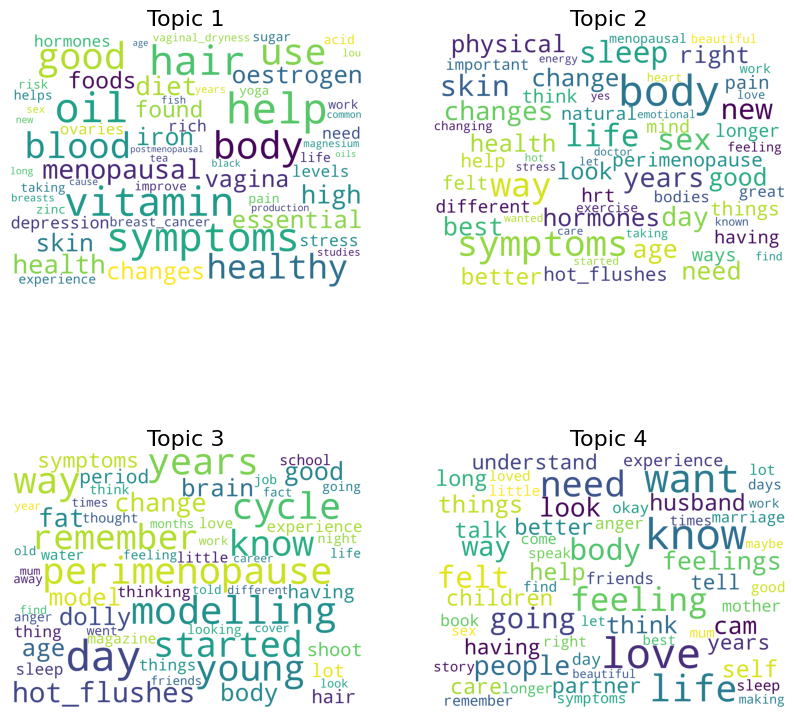

In [40]:
qm_vis = Vis(sentiment=qm_sentiment_model, lda=qm_lda_model)
# chapter sentiments already covered in all books in the shelf 
# - no change (sentiments are the same only topics are changed)

qm_vis.treemap_chapter_topic('figures/qm_chapter_topic.html')  # treemap of chapter -> topics
qm_vis.treemap_topic_sentiment('figures/qm_topic_sentment.html')  # treemap of topics -> sentiments
qm_vis.pyviz_topics('figures/qm_pyvis_topics.html')  # pyVis topic analysis
try:
    qm_vis.generate_topics_wordcloud('figures/qm_wordclouds.svg')
except:
    print('issue in generating wordclouds')

### 4. The Menopause Manifesto

In [41]:
tmm_df = bookshelf.create_corpus_custom_df(tmm_book_name)
tmm_df = tmm_df.reset_index()
tmm_df.head()

level_0  index                     book  chapter  paragraph_number  \
0        0   3062  The Menopause Manifesto        1                 1   
1        1   3063  The Menopause Manifesto        1                 2   
2        2   3064  The Menopause Manifesto        1                 3   
3        3   3065  The Menopause Manifesto        1                 4   
4        4   3066  The Menopause Manifesto        1                 5   

                                           paragraph  
0  IF MENOPAUSE WERE ON YELP it would have one st...  
1  The sex was dry.And it's no surprise. Most wom...  
2  Fear? Check. Uncertainty? Check. Medical ramif...  
3  What little that is spoken about menopause is ...  
4  The absence of menopause from our discourse le...

INFO:root:Calling preprocessing in LDA model:

INFO:root:Preprocessor initiated...
INFO:root:	stopwords length (standard): 326
INFO:root:	stopwords length: 381
INFO:root:	All paragraph are normalized by removing unwanted characters
INFO:root:	tokenization and initial preprocessing is done
INFO:root:	word count is done:
INFO:root:		{'like': 185, 'medical': 219, 'symptoms': 208, 'disease': 154, 'estrogen': 391, 'health': 249, 'years': 198, 'menstrual': 174, 'age': 304, 'hot': 242, 'flushes': 192, 'transition': 191, 'therapy': 158, 'risk': 456, 'hormone': 191, 'cancer': 248, 'levels': 205, 'likely': 153, 'mht': 259, 'blood': 210, 'hormones': 215, 'percent': 311}

INFO:gensim.models.phrases:collecting all words and their counts
INFO:gensim.models.phrases:PROGRESS: at sentence #0, processed 0 words and 0 word types
INFO:gensim.models.phrases:collected 49447 token types (unigram + bigrams) from a corpus of 52098 words and 1214 sentences
INFO:gensim.models.phrases:merged Phrases<49447 vocab, 

preprocessing workflow started...


INFO:root:analyzing bigrams and trigrams
INFO:root:	Preprocessing done...

INFO:root:Preprocessing is done - from LDA model:

INFO:gensim.corpora.dictionary:adding document #0 to Dictionary<0 unique tokens: []>
INFO:gensim.corpora.dictionary:built Dictionary<1851 unique tokens: ['awful', 'bleeding', 'car', 'control', 'expected']...> from 1214 documents (total 35797 corpus positions)
INFO:gensim.utils:Dictionary lifecycle event {'msg': "built Dictionary<1851 unique tokens: ['awful', 'bleeding', 'car', 'control', 'expected']...> from 1214 documents (total 35797 corpus positions)", 'datetime': '2023-06-11T21:27:24.203906', 'gensim': '4.3.1', 'python': '3.11.3 (main, May 15 2023, 10:43:03) [Clang 14.0.6 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'created'}
INFO:gensim.corpora.dictionary:discarding 132 tokens: [('bus', 2), ('party', 4), ('seats', 1), ('hispanic', 4), ('salivary', 3), ('pcos', 3), ('vaccines', 4), ('hadza', 4), ('mammals', 4), ('intelligence', 3)]...
INFO:gens

INFO:gensim.models.ldamulticore:training LDA model using 8 processes
INFO:gensim.models.ldamulticore:PROGRESS: pass 0, dispatched chunk #0 = documents up to #1214/1214, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.500): 0.005*"years" + 0.005*"transition" + 0.004*"likely" + 0.004*"estradiol" + 0.004*"like" + 0.004*"time" + 0.004*"flushes" + 0.004*"people" + 0.004*"important" + 0.004*"therapy"
INFO:gensim.models.ldamodel:topic #1 (0.500): 0.006*"like" + 0.005*"transition" + 0.005*"hormone" + 0.005*"flushes" + 0.005*"years" + 0.004*"studies" + 0.004*"chapter" + 0.004*"sex" + 0.004*"important" + 0.004*"likely"
INFO:gensim.models.ldamodel:topic diff=0.614791, rho=1.000000
INFO:gensim.models.ldamodel:-7.259 per-word bound, 153.2 perplexity estimate based on a held-out corpus of 1214 documents with 35112 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 1, dispatched chunk #0 = documents up to #1214/1214, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.

INFO:gensim.topic_coherence.text_analysis:accumulated word occurrence stats for 1214 virtual documents
INFO:gensim.models.ldamodel:using symmetric alpha at 0.3333333333333333
INFO:gensim.models.ldamodel:using symmetric eta at 0.3333333333333333
INFO:gensim.models.ldamodel:using serial LDA version on this node
INFO:gensim.models.ldamulticore:running online LDA training, 3 topics, 10 passes over the supplied corpus of 1214 documents, updating every 16000 documents, evaluating every ~1214 documents, iterating 10x with a convergence threshold of 0.001000
INFO:gensim.models.ldamulticore:training LDA model using 8 processes
INFO:gensim.models.ldamulticore:PROGRESS: pass 0, dispatched chunk #0 = documents up to #1214/1214, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.333): 0.005*"estradiol" + 0.005*"transition" + 0.005*"years" + 0.005*"likely" + 0.004*"time" + 0.004*"important" + 0.004*"pain" + 0.004*"data" + 0.004*"therapy" + 0.004*"like"
INFO:gensim.models.ldamodel:topic

INFO:gensim.models.ldamodel:topic diff=0.103731, rho=0.340858
INFO:gensim.models.ldamodel:-7.139 per-word bound, 140.9 perplexity estimate based on a held-out corpus of 1214 documents with 35112 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 8, dispatched chunk #0 = documents up to #1214/1214, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.333): 0.008*"sex" + 0.007*"products" + 0.007*"like" + 0.007*"estradiol" + 0.006*"vaginal" + 0.006*"men" + 0.006*"time" + 0.006*"data" + 0.005*"pain" + 0.005*"medicine"
INFO:gensim.models.ldamodel:topic #1 (0.333): 0.012*"transition" + 0.010*"flushes" + 0.008*"brain" + 0.008*"bleeding" + 0.007*"depression" + 0.007*"related" + 0.006*"osteoporosis" + 0.006*"hormone" + 0.006*"changes" + 0.006*"periods"
INFO:gensim.models.ldamodel:topic #2 (0.333): 0.010*"breast" + 0.010*"diet" + 0.009*"years" + 0.008*"increased" + 0.007*"high" + 0.007*"food" + 0.007*"vitamin" + 0.006*"fat" + 0.006*"people" + 0.006*"day"
INFO:gensim.models.ldamodel

INFO:gensim.models.ldamodel:topic #0 (0.250): 0.010*"estradiol" + 0.008*"pain" + 0.006*"therapy" + 0.006*"data" + 0.006*"vaginal" + 0.005*"products" + 0.005*"like" + 0.005*"different" + 0.005*"dose" + 0.005*"time"
INFO:gensim.models.ldamodel:topic #1 (0.250): 0.009*"depression" + 0.009*"transition" + 0.008*"brain" + 0.007*"flushes" + 0.007*"related" + 0.006*"changes" + 0.006*"osteoporosis" + 0.006*"chapter" + 0.006*"progesterone" + 0.006*"help"
INFO:gensim.models.ldamodel:topic #2 (0.250): 0.009*"breast" + 0.009*"years" + 0.009*"diet" + 0.008*"bleeding" + 0.007*"high" + 0.006*"periods" + 0.006*"foods" + 0.006*"associated" + 0.005*"low" + 0.005*"fiber"
INFO:gensim.models.ldamodel:topic #3 (0.250): 0.008*"desire" + 0.007*"studies" + 0.007*"like" + 0.007*"flushes" + 0.007*"transition" + 0.006*"sex" + 0.006*"people" + 0.006*"likely" + 0.005*"years" + 0.005*"important"
INFO:gensim.models.ldamodel:topic diff=0.201986, rho=0.422313
INFO:gensim.models.ldamodel:-7.231 per-word bound, 150.3 perp

INFO:gensim.models.ldamulticore:PROGRESS: pass 0, dispatched chunk #0 = documents up to #1214/1214, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.200): 0.005*"estradiol" + 0.005*"pain" + 0.005*"years" + 0.005*"likely" + 0.005*"time" + 0.005*"important" + 0.004*"therapy" + 0.004*"transition" + 0.004*"data" + 0.004*"flushes"
INFO:gensim.models.ldamodel:topic #1 (0.200): 0.006*"like" + 0.005*"flushes" + 0.005*"hormone" + 0.005*"transition" + 0.005*"chapter" + 0.004*"important" + 0.004*"years" + 0.004*"day" + 0.004*"brain" + 0.004*"cause"
INFO:gensim.models.ldamodel:topic #2 (0.200): 0.007*"years" + 0.006*"like" + 0.005*"transition" + 0.005*"breast" + 0.005*"flushes" + 0.004*"hormone" + 0.004*"sex" + 0.004*"vaginal" + 0.004*"people" + 0.004*"chapter"
INFO:gensim.models.ldamodel:topic #3 (0.200): 0.007*"transition" + 0.006*"flushes" + 0.005*"hormone" + 0.005*"studies" + 0.005*"like" + 0.005*"increased" + 0.005*"likely" + 0.005*"years" + 0.004*"estradiol" + 0.004*"importan

INFO:gensim.models.ldamodel:topic diff=0.224905, rho=0.389043
INFO:gensim.models.ldamodel:-7.238 per-word bound, 151.0 perplexity estimate based on a held-out corpus of 1214 documents with 35112 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 6, dispatched chunk #0 = documents up to #1214/1214, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.200): 0.010*"pain" + 0.008*"estradiol" + 0.008*"therapy" + 0.007*"vaginal" + 0.007*"men" + 0.006*"likely" + 0.006*"data" + 0.006*"like" + 0.005*"time" + 0.005*"sex"
INFO:gensim.models.ldamodel:topic #1 (0.200): 0.010*"depression" + 0.010*"brain" + 0.008*"osteoporosis" + 0.008*"progesterone" + 0.008*"related" + 0.007*"changes" + 0.007*"transition" + 0.007*"exercise" + 0.007*"chapter" + 0.007*"cause"
INFO:gensim.models.ldamodel:topic #2 (0.200): 0.011*"breast" + 0.011*"bleeding" + 0.010*"periods" + 0.009*"years" + 0.008*"diet" + 0.007*"menstrual" + 0.007*"fiber" + 0.006*"foods" + 0.006*"transition" + 0.006*"menstrual_period"
INF

INFO:gensim.models.ldamodel:topic diff=0.736413, rho=1.000000
INFO:gensim.models.ldamodel:-7.766 per-word bound, 217.7 perplexity estimate based on a held-out corpus of 1214 documents with 35112 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 1, dispatched chunk #0 = documents up to #1214/1214, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #3 (0.167): 0.007*"flushes" + 0.007*"transition" + 0.006*"studies" + 0.005*"desire" + 0.005*"likely" + 0.005*"like" + 0.005*"increased" + 0.005*"study" + 0.005*"important" + 0.005*"hormone"
INFO:gensim.models.ldamodel:topic #0 (0.167): 0.008*"pain" + 0.007*"estradiol" + 0.006*"therapy" + 0.005*"men" + 0.005*"time" + 0.005*"data" + 0.005*"bleeding" + 0.005*"important" + 0.005*"likely" + 0.004*"like"
INFO:gensim.models.ldamodel:topic #5 (0.167): 0.008*"hormone" + 0.007*"transition" + 0.007*"years" + 0.006*"estradiol" + 0.006*"increased" + 0.005*"osteoporosis" + 0.005*"brain" + 0.005*"conditions" + 0.005*"day" + 0.005*"changes"
INFO:ge

INFO:gensim.models.ldamodel:topic #5 (0.167): 0.014*"hormone" + 0.012*"osteoporosis" + 0.011*"estradiol" + 0.010*"years" + 0.009*"increased" + 0.008*"transition" + 0.007*"brain" + 0.007*"day" + 0.007*"depression" + 0.007*"vitamin"
INFO:gensim.models.ldamodel:topic diff=0.256325, rho=0.362571
INFO:gensim.models.ldamodel:-7.245 per-word bound, 151.7 perplexity estimate based on a held-out corpus of 1214 documents with 35112 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 7, dispatched chunk #0 = documents up to #1214/1214, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #1 (0.167): 0.009*"related" + 0.008*"cause" + 0.008*"bladder" + 0.007*"sleep" + 0.007*"help" + 0.007*"depression" + 0.007*"tissues" + 0.007*"chapter" + 0.007*"affect" + 0.007*"exercise"
INFO:gensim.models.ldamodel:topic #3 (0.167): 0.014*"flushes" + 0.011*"desire" + 0.009*"transition" + 0.009*"like" + 0.009*"sex" + 0.007*"study" + 0.007*"important" + 0.007*"time" + 0.007*"body" + 0.006*"sexual"
INFO:gensim

INFO:gensim.models.ldamodel:topic #0 (0.143): 0.009*"pain" + 0.008*"estradiol" + 0.007*"therapy" + 0.005*"data" + 0.005*"men" + 0.005*"bleeding" + 0.005*"different" + 0.005*"likely" + 0.005*"need" + 0.004*"time"
INFO:gensim.models.ldamodel:topic diff=0.383227, rho=0.619341
INFO:gensim.models.ldamodel:-7.639 per-word bound, 199.4 perplexity estimate based on a held-out corpus of 1214 documents with 35112 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 2, dispatched chunk #0 = documents up to #1214/1214, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #6 (0.143): 0.010*"desire" + 0.008*"flushes" + 0.008*"depression" + 0.007*"sex" + 0.007*"time" + 0.006*"people" + 0.006*"like" + 0.006*"progesterone" + 0.006*"increase" + 0.006*"food"
INFO:gensim.models.ldamodel:topic #0 (0.143): 0.011*"pain" + 0.009*"estradiol" + 0.008*"therapy" + 0.006*"men" + 0.006*"different" + 0.006*"data" + 0.005*"vaginal" + 0.005*"need" + 0.005*"cee" + 0.005*"bleeding"
INFO:gensim.models.ldamodel:topi

INFO:gensim.models.ldamodel:topic #2 (0.143): 0.016*"breast" + 0.011*"periods" + 0.009*"fiber" + 0.009*"bleeding" + 0.008*"years" + 0.007*"diet" + 0.007*"foods" + 0.007*"poi" + 0.006*"menstrual" + 0.006*"high"
INFO:gensim.models.ldamodel:topic #0 (0.143): 0.012*"pain" + 0.012*"estradiol" + 0.011*"therapy" + 0.009*"vaginal" + 0.007*"different" + 0.006*"cee" + 0.006*"estrogens" + 0.006*"dose" + 0.006*"data" + 0.006*"like"
INFO:gensim.models.ldamodel:topic diff=0.264057, rho=0.340858
INFO:gensim.models.ldamodel:-7.273 per-word bound, 154.6 perplexity estimate based on a held-out corpus of 1214 documents with 35112 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 8, dispatched chunk #0 = documents up to #1214/1214, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #3 (0.143): 0.016*"flushes" + 0.014*"studies" + 0.011*"study" + 0.008*"testosterone" + 0.007*"dhea" + 0.007*"likely" + 0.007*"placebo" + 0.006*"data" + 0.006*"estradiol" + 0.006*"flush"
INFO:gensim.models.ldamodel:to

INFO:gensim.models.ldamodel:topic #6 (0.125): 0.014*"desire" + 0.009*"sex" + 0.008*"progesterone" + 0.008*"flushes" + 0.007*"time" + 0.007*"like" + 0.007*"people" + 0.006*"sexual" + 0.006*"transition" + 0.006*"higher"
INFO:gensim.models.ldamodel:topic #0 (0.125): 0.011*"estradiol" + 0.011*"pain" + 0.007*"therapy" + 0.007*"data" + 0.006*"bleeding" + 0.006*"men" + 0.005*"different" + 0.005*"likely" + 0.005*"vaginal" + 0.005*"cee"
INFO:gensim.models.ldamodel:topic diff=0.508377, rho=0.526535
INFO:gensim.models.ldamodel:-7.544 per-word bound, 186.6 perplexity estimate based on a held-out corpus of 1214 documents with 35112 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 3, dispatched chunk #0 = documents up to #1214/1214, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #4 (0.125): 0.008*"medicine" + 0.008*"supplements" + 0.007*"years" + 0.006*"body" + 0.006*"like" + 0.006*"products" + 0.006*"studies" + 0.005*"men" + 0.005*"information" + 0.005*"milk"
INFO:gensim.models.ldam

INFO:gensim.models.ldamodel:topic #7 (0.125): 0.018*"vitamin" + 0.014*"osteoporosis" + 0.011*"bone" + 0.011*"increased" + 0.008*"weight" + 0.007*"lower" + 0.007*"taking" + 0.006*"years" + 0.006*"exercise" + 0.006*"low"
INFO:gensim.models.ldamodel:topic #2 (0.125): 0.017*"breast" + 0.016*"diet" + 0.012*"foods" + 0.011*"fiber" + 0.009*"high" + 0.009*"phytoestrogens" + 0.008*"food" + 0.007*"found" + 0.007*"dietary" + 0.007*"years"
INFO:gensim.models.ldamodel:topic #4 (0.125): 0.011*"medicine" + 0.009*"supplements" + 0.008*"men" + 0.008*"years" + 0.007*"like" + 0.007*"products" + 0.006*"body" + 0.006*"word" + 0.006*"way" + 0.006*"information"
INFO:gensim.models.ldamodel:topic diff=0.277179, rho=0.322631
INFO:gensim.models.ldamodel:-7.254 per-word bound, 152.7 perplexity estimate based on a held-out corpus of 1214 documents with 35112 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 9, dispatched chunk #0 = documents up to #1214/1214, outstanding queue size 1
INFO:gensim.models.ldamodel

INFO:gensim.models.ldamodel:topic #1 (0.111): 0.009*"bladder" + 0.009*"affect" + 0.008*"related" + 0.007*"help" + 0.006*"chapter" + 0.006*"helpful" + 0.006*"sleep" + 0.006*"cause" + 0.005*"risks" + 0.005*"progesterone"
INFO:gensim.models.ldamodel:topic #7 (0.111): 0.009*"increased" + 0.008*"bone" + 0.007*"vitamin" + 0.007*"osteoporosis" + 0.007*"year" + 0.006*"fat" + 0.006*"cause" + 0.006*"breast" + 0.006*"associated" + 0.005*"like"
INFO:gensim.models.ldamodel:topic #3 (0.111): 0.017*"flushes" + 0.012*"transition" + 0.011*"studies" + 0.007*"dhea" + 0.007*"testosterone" + 0.007*"flush" + 0.006*"know" + 0.006*"vaginal" + 0.006*"study" + 0.006*"experience"
INFO:gensim.models.ldamodel:topic diff=0.568950, rho=0.465898
INFO:gensim.models.ldamodel:-7.491 per-word bound, 180.0 perplexity estimate based on a held-out corpus of 1214 documents with 35112 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 4, dispatched chunk #0 = documents up to #1214/1214, outstanding queue size 1
INFO:gensim.

INFO:gensim.models.ldamodel:topic #3 (0.111): 0.028*"flushes" + 0.013*"studies" + 0.012*"transition" + 0.009*"dhea" + 0.009*"flush" + 0.009*"experience" + 0.008*"testosterone" + 0.008*"know" + 0.008*"study" + 0.008*"concerns"
INFO:gensim.models.ldamodel:topic #4 (0.111): 0.011*"years" + 0.011*"supplements" + 0.011*"medicine" + 0.009*"men" + 0.008*"like" + 0.008*"products" + 0.007*"life" + 0.007*"time" + 0.006*"milk" + 0.006*"long"
INFO:gensim.models.ldamodel:topic #8 (0.111): 0.011*"phytoestrogens" + 0.009*"chapter" + 0.009*"like" + 0.009*"hormone" + 0.008*"soy" + 0.007*"tissues" + 0.007*"endometrial" + 0.007*"information" + 0.006*"way" + 0.006*"body"
INFO:gensim.models.ldamodel:topic #0 (0.111): 0.020*"estradiol" + 0.011*"therapy" + 0.011*"pain" + 0.009*"vaginal" + 0.009*"data" + 0.008*"estrogens" + 0.008*"oral" + 0.008*"product" + 0.008*"cee" + 0.007*"dose"
INFO:gensim.models.ldamodel:topic diff=0.266313, rho=0.307046
INFO:gensim.models.ldamodel:-7.279 per-word bound, 155.3 perplexit

INFO:gensim.models.ldamodel:topic #8 (0.100): 0.012*"like" + 0.008*"hormone" + 0.008*"tissues" + 0.008*"called" + 0.006*"likely" + 0.006*"food" + 0.006*"different" + 0.006*"chapter" + 0.006*"uterus" + 0.006*"phytoestrogens"
INFO:gensim.models.ldamodel:topic #2 (0.100): 0.017*"diet" + 0.013*"breast" + 0.012*"foods" + 0.010*"fiber" + 0.009*"years" + 0.008*"high" + 0.006*"low" + 0.006*"dietary" + 0.006*"day" + 0.006*"diets"
INFO:gensim.models.ldamodel:topic #4 (0.100): 0.009*"years" + 0.008*"medicine" + 0.007*"milk" + 0.007*"information" + 0.007*"data" + 0.007*"body" + 0.007*"supplements" + 0.006*"alcohol" + 0.006*"studies" + 0.006*"products"
INFO:gensim.models.ldamodel:topic #1 (0.100): 0.010*"transition" + 0.009*"related" + 0.009*"bleeding" + 0.007*"help" + 0.007*"osteoporosis" + 0.007*"brain" + 0.006*"sleep" + 0.006*"progesterone" + 0.006*"chapter" + 0.006*"changes"
INFO:gensim.models.ldamodel:topic diff=0.597222, rho=0.422313
INFO:gensim.models.ldamodel:-7.468 per-word bound, 177.1 pe

INFO:gensim.utils:LdaMulticore lifecycle event {'msg': 'trained LdaMulticore<num_terms=1719, num_topics=10, decay=0.5, chunksize=2000> in 8.81s', 'datetime': '2023-06-11T21:28:24.558844', 'gensim': '4.3.1', 'python': '3.11.3 (main, May 15 2023, 10:43:03) [Clang 14.0.6 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'created'}
INFO:gensim.topic_coherence.probability_estimation:using ParallelWordOccurrenceAccumulator<processes=7, batch_size=64> to estimate probabilities from sliding windows
INFO:gensim.topic_coherence.text_analysis:7 accumulators retrieved from output queue
INFO:gensim.topic_coherence.text_analysis:accumulated word occurrence stats for 1214 virtual documents
INFO:gensim.models.ldamodel:using symmetric alpha at 0.09090909090909091
INFO:gensim.models.ldamodel:using symmetric eta at 0.09090909090909091
INFO:gensim.models.ldamodel:using serial LDA version on this node
INFO:gensim.models.ldamulticore:running online LDA training, 11 topics, 10 passes over the supplie

INFO:gensim.models.ldamodel:-7.497 per-word bound, 180.6 perplexity estimate based on a held-out corpus of 1214 documents with 35112 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 5, dispatched chunk #0 = documents up to #1214/1214, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #3 (0.091): 0.014*"flushes" + 0.009*"studies" + 0.009*"word" + 0.008*"transition" + 0.008*"know" + 0.008*"dhea" + 0.008*"study" + 0.008*"experience" + 0.007*"flush" + 0.006*"time"
INFO:gensim.models.ldamodel:topic #6 (0.091): 0.023*"desire" + 0.018*"sex" + 0.015*"depression" + 0.011*"sexual" + 0.011*"people" + 0.008*"higher" + 0.008*"exercise" + 0.007*"skin" + 0.007*"increase" + 0.007*"partner"
INFO:gensim.models.ldamodel:topic #0 (0.091): 0.019*"pain" + 0.014*"men" + 0.014*"estradiol" + 0.009*"data" + 0.009*"different" + 0.008*"cee" + 0.008*"risks" + 0.007*"therapy" + 0.007*"patch" + 0.007*"need"
INFO:gensim.models.ldamodel:topic #1 (0.091): 0.013*"sleep" + 0.011*"flushes" + 0.009*"help" + 0.

INFO:gensim.models.ldamulticore:training LDA model using 8 processes
INFO:gensim.models.ldamulticore:PROGRESS: pass 0, dispatched chunk #0 = documents up to #1214/1214, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #4 (0.083): 0.006*"body" + 0.005*"day" + 0.005*"years" + 0.004*"people" + 0.004*"menstrual_period" + 0.004*"estradiol" + 0.004*"time" + 0.004*"studies" + 0.004*"supplements" + 0.004*"like"
INFO:gensim.models.ldamodel:topic #1 (0.083): 0.007*"like" + 0.006*"flushes" + 0.005*"chapter" + 0.005*"therapy" + 0.005*"hormone" + 0.005*"transition" + 0.005*"important" + 0.005*"related" + 0.005*"depression" + 0.005*"years"
INFO:gensim.models.ldamodel:topic #3 (0.083): 0.009*"transition" + 0.008*"flushes" + 0.006*"studies" + 0.006*"likely" + 0.005*"hormone" + 0.005*"important" + 0.005*"study" + 0.004*"vaginal" + 0.004*"products" + 0.004*"like"
INFO:gensim.models.ldamodel:topic #9 (0.083): 0.007*"transition" + 0.006*"years" + 0.005*"cause" + 0.005*"bleeding" + 0.005*"hormone

INFO:gensim.models.ldamodel:topic #2 (0.083): 0.014*"diet" + 0.013*"poi" + 0.013*"foods" + 0.012*"breast" + 0.010*"associated" + 0.009*"conditions" + 0.009*"fiber" + 0.007*"periods" + 0.007*"high" + 0.007*"people"
INFO:gensim.models.ldamodel:topic diff=0.662343, rho=0.389043
INFO:gensim.models.ldamodel:-7.478 per-word bound, 178.3 perplexity estimate based on a held-out corpus of 1214 documents with 35112 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 6, dispatched chunk #0 = documents up to #1214/1214, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #9 (0.083): 0.016*"estradiol" + 0.015*"fibroids" + 0.012*"vitamin" + 0.012*"brain" + 0.011*"hormone" + 0.010*"liver" + 0.009*"follicles" + 0.009*"tissue" + 0.009*"affect" + 0.008*"medications"
INFO:gensim.models.ldamodel:topic #2 (0.083): 0.017*"diet" + 0.014*"poi" + 0.014*"foods" + 0.013*"breast" + 0.011*"associated" + 0.010*"conditions" + 0.009*"fiber" + 0.008*"high" + 0.007*"people" + 0.007*"periods"
INFO:gensim.models.

INFO:gensim.models.ldamodel:topic #0 (0.077): 0.006*"pain" + 0.006*"estradiol" + 0.005*"data" + 0.005*"time" + 0.005*"therapy" + 0.005*"day" + 0.004*"bleeding" + 0.004*"men" + 0.004*"years" + 0.004*"important"
INFO:gensim.models.ldamodel:topic diff=1.204415, rho=1.000000
INFO:gensim.models.ldamodel:-8.392 per-word bound, 336.0 perplexity estimate based on a held-out corpus of 1214 documents with 35112 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 1, dispatched chunk #0 = documents up to #1214/1214, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #7 (0.077): 0.008*"sex" + 0.007*"like" + 0.007*"increased" + 0.007*"osteoporosis" + 0.006*"breast" + 0.006*"important" + 0.006*"associated" + 0.005*"brain" + 0.005*"year" + 0.005*"vitamin"
INFO:gensim.models.ldamodel:topic #0 (0.077): 0.012*"pain" + 0.009*"estradiol" + 0.008*"data" + 0.006*"therapy" + 0.006*"risks" + 0.006*"milk" + 0.005*"time" + 0.005*"men" + 0.005*"know" + 0.005*"estriol"
INFO:gensim.models.ldamodel:topic #2

INFO:gensim.models.ldamodel:topic #11 (0.077): 0.032*"flushes" + 0.016*"word" + 0.014*"years" + 0.012*"flush" + 0.012*"transition" + 0.011*"term" + 0.011*"experience" + 0.011*"know" + 0.010*"vasomotor" + 0.009*"start"
INFO:gensim.models.ldamodel:topic #9 (0.077): 0.018*"fibroids" + 0.016*"cholesterol" + 0.011*"fat" + 0.011*"products" + 0.011*"bleeding" + 0.009*"supplements" + 0.009*"transition" + 0.009*"cause" + 0.009*"tissue" + 0.009*"known"
INFO:gensim.models.ldamodel:topic diff=0.621741, rho=0.362571
INFO:gensim.models.ldamodel:-7.452 per-word bound, 175.1 perplexity estimate based on a held-out corpus of 1214 documents with 35112 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 7, dispatched chunk #0 = documents up to #1214/1214, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #4 (0.077): 0.013*"milk" + 0.010*"medicine" + 0.010*"like" + 0.008*"supplements" + 0.008*"men" + 0.008*"people" + 0.008*"body" + 0.008*"live" + 0.008*"likely" + 0.007*"information"
INFO:gensim.

INFO:gensim.models.ldamodel:topic #8 (0.071): 0.009*"bleeding" + 0.008*"pain" + 0.008*"like" + 0.007*"uterus" + 0.006*"chapter" + 0.005*"bone" + 0.005*"likely" + 0.005*"example" + 0.005*"important" + 0.004*"bmi"
INFO:gensim.models.ldamodel:topic #0 (0.071): 0.010*"pain" + 0.009*"data" + 0.009*"estradiol" + 0.008*"therapy" + 0.007*"estrogens" + 0.006*"likely" + 0.005*"cee" + 0.005*"study" + 0.005*"time" + 0.005*"important"
INFO:gensim.models.ldamodel:topic diff=1.023871, rho=0.619341
INFO:gensim.models.ldamodel:-8.041 per-word bound, 263.4 perplexity estimate based on a held-out corpus of 1214 documents with 35112 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 2, dispatched chunk #0 = documents up to #1214/1214, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #2 (0.071): 0.009*"diet" + 0.009*"periods" + 0.009*"foods" + 0.008*"years" + 0.006*"people" + 0.006*"bleeding" + 0.006*"especially" + 0.006*"good" + 0.006*"heart" + 0.005*"high"
INFO:gensim.models.ldamodel:topic #1

INFO:gensim.models.ldamodel:topic #8 (0.071): 0.015*"uterus" + 0.014*"pain" + 0.012*"bleeding" + 0.010*"endometrial" + 0.009*"chapter" + 0.009*"like" + 0.008*"options" + 0.007*"procedure" + 0.007*"concerns" + 0.007*"therapy"
INFO:gensim.models.ldamodel:topic #10 (0.071): 0.021*"progesterone" + 0.017*"bleeding" + 0.016*"hormone" + 0.011*"transition" + 0.009*"menstrual_period" + 0.007*"estradiol" + 0.007*"testosterone" + 0.007*"effective" + 0.007*"days" + 0.007*"menstrual"
INFO:gensim.models.ldamodel:topic #4 (0.071): 0.011*"years" + 0.010*"alcohol" + 0.010*"day" + 0.009*"body" + 0.009*"time" + 0.009*"men" + 0.008*"grandmother" + 0.008*"genetics" + 0.007*"stress" + 0.007*"milk"
INFO:gensim.models.ldamodel:topic diff=0.565488, rho=0.340858
INFO:gensim.models.ldamodel:-7.437 per-word bound, 173.3 perplexity estimate based on a held-out corpus of 1214 documents with 35112 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 8, dispatched chunk #0 = documents up to #1214/1214, outstanding qu

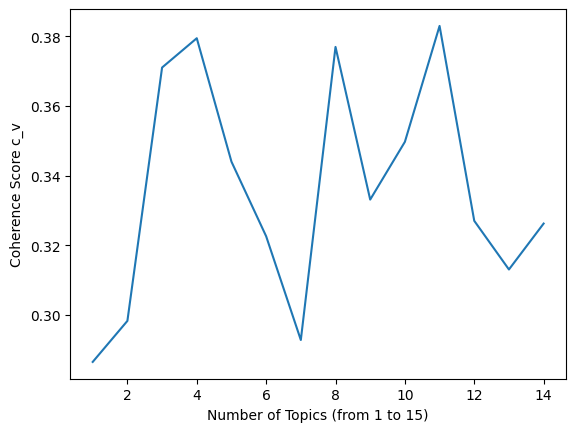

In [42]:
# creating lda object and choosing number of topics
tmm_lda_model = LDAModel(tmm_df)
tmm_lda_model.preprocess(custom_stopwords=custom_stopwords)  
tmm_lda_model.create_bow_model() 
tmm_lda_model.plot_optimal_coherent_scores() 


In [43]:
# number of topics = 4 another good example is 8 based on the c_v measure
tmm_lda_model.create_lda_model(4)

tmm_lda_model.format_topics_sentences()
tmm_df = tmm_lda_model.df
tmm_df.head()

INFO:gensim.models.ldamodel:using symmetric alpha at 0.25
INFO:gensim.models.ldamodel:using symmetric eta at 0.25
INFO:gensim.models.ldamodel:using serial LDA version on this node
INFO:gensim.models.ldamulticore:running online LDA training, 4 topics, 100 passes over the supplied corpus of 1214 documents, updating every 8000 documents, evaluating every ~1214 documents, iterating 100x with a convergence threshold of 0.001000
INFO:gensim.models.ldamulticore:training LDA model using 4 processes
INFO:gensim.models.ldamulticore:PROGRESS: pass 0, dispatched chunk #0 = documents up to #1214/1214, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.250): 0.011*"hormone" + 0.006*"progesterone" + 0.006*"flushes" + 0.006*"therapy" + 0.006*"transition" + 0.006*"depression" + 0.006*"years" + 0.005*"likely" + 0.005*"estradiol" + 0.005*"chapter"
INFO:gensim.models.ldamodel:topic #1 (0.250): 0.008*"years" + 0.006*"transition" + 0.006*"likely" + 0.006*"sex" + 0.005*"like" + 0.005*"important

INFO:gensim.models.ldamodel:topic #2 (0.250): 0.010*"diet" + 0.009*"vitamin" + 0.008*"supplements" + 0.007*"products" + 0.007*"food" + 0.006*"people" + 0.006*"study" + 0.006*"foods" + 0.006*"day" + 0.005*"studies"
INFO:gensim.models.ldamodel:topic #3 (0.250): 0.011*"vaginal" + 0.009*"breast" + 0.009*"pain" + 0.006*"tissues" + 0.006*"like" + 0.006*"bleeding" + 0.006*"called" + 0.006*"studies" + 0.005*"fibroids" + 0.005*"increased"
INFO:gensim.models.ldamodel:topic diff=0.110028, rho=0.362571
INFO:gensim.models.ldamodel:-7.193 per-word bound, 146.3 perplexity estimate based on a held-out corpus of 1214 documents with 35112 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 7, dispatched chunk #0 = documents up to #1214/1214, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.250): 0.013*"hormone" + 0.013*"transition" + 0.009*"depression" + 0.008*"estradiol" + 0.008*"flushes" + 0.008*"progesterone" + 0.007*"brain" + 0.007*"periods" + 0.006*"likely" + 0.005*"therapy"
INFO:g

INFO:gensim.models.ldamodel:topic #1 (0.250): 0.011*"years" + 0.011*"sex" + 0.009*"desire" + 0.008*"like" + 0.007*"osteoporosis" + 0.007*"men" + 0.006*"important" + 0.006*"time" + 0.006*"likely" + 0.005*"sexual"
INFO:gensim.models.ldamodel:topic #2 (0.250): 0.011*"diet" + 0.010*"vitamin" + 0.010*"supplements" + 0.009*"food" + 0.009*"products" + 0.008*"people" + 0.007*"study" + 0.007*"day" + 0.007*"foods" + 0.006*"studies"
INFO:gensim.models.ldamodel:topic #3 (0.250): 0.014*"vaginal" + 0.012*"pain" + 0.010*"breast" + 0.008*"tissues" + 0.006*"called" + 0.006*"studies" + 0.006*"like" + 0.006*"uterus" + 0.006*"dose" + 0.005*"fibroids"
INFO:gensim.models.ldamodel:topic diff=0.057570, rho=0.261649
INFO:gensim.models.ldamodel:-7.141 per-word bound, 141.2 perplexity estimate based on a held-out corpus of 1214 documents with 35112 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 14, dispatched chunk #0 = documents up to #1214/1214, outstanding queue size 1
INFO:gensim.models.ldamodel:topic 

INFO:gensim.models.ldamodel:topic #0 (0.250): 0.015*"transition" + 0.013*"hormone" + 0.010*"flushes" + 0.009*"depression" + 0.008*"estradiol" + 0.008*"brain" + 0.008*"periods" + 0.008*"bleeding" + 0.007*"progesterone" + 0.006*"menstrual_period"
INFO:gensim.models.ldamodel:topic #1 (0.250): 0.011*"years" + 0.010*"sex" + 0.009*"desire" + 0.008*"like" + 0.008*"men" + 0.007*"osteoporosis" + 0.007*"important" + 0.006*"time" + 0.006*"likely" + 0.005*"exercise"
INFO:gensim.models.ldamodel:topic #2 (0.250): 0.011*"diet" + 0.010*"vitamin" + 0.010*"supplements" + 0.009*"food" + 0.009*"products" + 0.008*"people" + 0.007*"study" + 0.007*"day" + 0.007*"foods" + 0.006*"phytoestrogens"
INFO:gensim.models.ldamodel:topic #3 (0.250): 0.015*"vaginal" + 0.012*"pain" + 0.010*"breast" + 0.009*"tissues" + 0.007*"dose" + 0.007*"studies" + 0.006*"estradiol" + 0.006*"uterus" + 0.006*"called" + 0.006*"estrogens"
INFO:gensim.models.ldamodel:topic diff=0.034678, rho=0.215131
INFO:gensim.models.ldamodel:-7.120 per-

INFO:gensim.models.ldamodel:topic diff=0.024400, rho=0.190323
INFO:gensim.models.ldamodel:-7.109 per-word bound, 138.0 perplexity estimate based on a held-out corpus of 1214 documents with 35112 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 27, dispatched chunk #0 = documents up to #1214/1214, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.250): 0.015*"transition" + 0.013*"hormone" + 0.010*"flushes" + 0.009*"depression" + 0.009*"bleeding" + 0.009*"brain" + 0.008*"periods" + 0.008*"estradiol" + 0.007*"progesterone" + 0.006*"menstrual_period"
INFO:gensim.models.ldamodel:topic #1 (0.250): 0.011*"years" + 0.010*"sex" + 0.009*"desire" + 0.008*"men" + 0.008*"like" + 0.008*"osteoporosis" + 0.007*"time" + 0.007*"important" + 0.006*"likely" + 0.005*"people"
INFO:gensim.models.ldamodel:topic #2 (0.250): 0.012*"diet" + 0.011*"supplements" + 0.011*"vitamin" + 0.009*"food" + 0.009*"products" + 0.009*"people" + 0.007*"study" + 0.007*"day" + 0.007*"foods" + 0.006*"phytoestrog

INFO:gensim.models.ldamodel:topic #3 (0.250): 0.016*"vaginal" + 0.012*"pain" + 0.011*"breast" + 0.009*"tissues" + 0.008*"estradiol" + 0.008*"dose" + 0.007*"studies" + 0.007*"medications" + 0.006*"estrogens" + 0.006*"medication"
INFO:gensim.models.ldamodel:topic diff=0.018072, rho=0.169988
INFO:gensim.models.ldamodel:-7.100 per-word bound, 137.2 perplexity estimate based on a held-out corpus of 1214 documents with 35112 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 34, dispatched chunk #0 = documents up to #1214/1214, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.250): 0.015*"transition" + 0.013*"hormone" + 0.011*"flushes" + 0.009*"depression" + 0.009*"bleeding" + 0.009*"brain" + 0.008*"periods" + 0.007*"estradiol" + 0.007*"progesterone" + 0.006*"menstrual_period"
INFO:gensim.models.ldamodel:topic #1 (0.250): 0.011*"years" + 0.010*"sex" + 0.009*"desire" + 0.009*"men" + 0.008*"like" + 0.007*"osteoporosis" + 0.007*"time" + 0.007*"important" + 0.006*"likely" + 0.0

INFO:gensim.models.ldamodel:topic #1 (0.250): 0.011*"years" + 0.010*"sex" + 0.009*"men" + 0.009*"desire" + 0.009*"like" + 0.007*"osteoporosis" + 0.007*"time" + 0.007*"important" + 0.006*"likely" + 0.005*"people"
INFO:gensim.models.ldamodel:topic #2 (0.250): 0.012*"diet" + 0.011*"supplements" + 0.011*"vitamin" + 0.010*"food" + 0.009*"products" + 0.009*"people" + 0.007*"foods" + 0.007*"study" + 0.007*"day" + 0.007*"phytoestrogens"
INFO:gensim.models.ldamodel:topic #3 (0.250): 0.016*"vaginal" + 0.013*"pain" + 0.011*"breast" + 0.009*"tissues" + 0.009*"estradiol" + 0.008*"dose" + 0.007*"medications" + 0.007*"studies" + 0.007*"medication" + 0.006*"effect"
INFO:gensim.models.ldamodel:topic diff=0.013979, rho=0.155030
INFO:gensim.models.ldamodel:-7.093 per-word bound, 136.6 perplexity estimate based on a held-out corpus of 1214 documents with 35112 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 41, dispatched chunk #0 = documents up to #1214/1214, outstanding queue size 1
INFO:gensim.mod

INFO:gensim.models.ldamulticore:PROGRESS: pass 47, dispatched chunk #0 = documents up to #1214/1214, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.250): 0.016*"transition" + 0.013*"hormone" + 0.011*"flushes" + 0.010*"depression" + 0.009*"bleeding" + 0.009*"brain" + 0.009*"periods" + 0.007*"estradiol" + 0.006*"menstrual_period" + 0.006*"progesterone"
INFO:gensim.models.ldamodel:topic #1 (0.250): 0.011*"years" + 0.010*"sex" + 0.009*"men" + 0.009*"like" + 0.009*"desire" + 0.008*"osteoporosis" + 0.007*"time" + 0.007*"important" + 0.006*"likely" + 0.005*"people"
INFO:gensim.models.ldamodel:topic #2 (0.250): 0.012*"diet" + 0.011*"supplements" + 0.011*"vitamin" + 0.010*"food" + 0.009*"products" + 0.009*"people" + 0.007*"foods" + 0.007*"study" + 0.007*"day" + 0.007*"phytoestrogens"
INFO:gensim.models.ldamodel:topic #3 (0.250): 0.016*"vaginal" + 0.013*"pain" + 0.011*"breast" + 0.010*"estradiol" + 0.009*"tissues" + 0.009*"dose" + 0.008*"medications" + 0.007*"medication" + 0.00

INFO:gensim.models.ldamodel:topic diff=0.009348, rho=0.135324
INFO:gensim.models.ldamodel:-7.085 per-word bound, 135.8 perplexity estimate based on a held-out corpus of 1214 documents with 35112 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 54, dispatched chunk #0 = documents up to #1214/1214, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.250): 0.016*"transition" + 0.013*"hormone" + 0.011*"flushes" + 0.010*"depression" + 0.009*"bleeding" + 0.009*"brain" + 0.009*"periods" + 0.007*"menstrual_period" + 0.006*"estradiol" + 0.006*"sleep"
INFO:gensim.models.ldamodel:topic #1 (0.250): 0.011*"years" + 0.010*"sex" + 0.009*"like" + 0.009*"men" + 0.009*"desire" + 0.008*"time" + 0.008*"osteoporosis" + 0.007*"important" + 0.006*"likely" + 0.006*"people"
INFO:gensim.models.ldamodel:topic #2 (0.250): 0.012*"diet" + 0.011*"supplements" + 0.011*"vitamin" + 0.010*"food" + 0.009*"products" + 0.008*"people" + 0.007*"foods" + 0.007*"study" + 0.007*"day" + 0.007*"found"
INFO:gensim

INFO:gensim.models.ldamodel:topic #3 (0.250): 0.016*"vaginal" + 0.013*"pain" + 0.011*"breast" + 0.010*"estradiol" + 0.009*"tissues" + 0.009*"dose" + 0.008*"medications" + 0.008*"medication" + 0.007*"studies" + 0.007*"therapy"
INFO:gensim.models.ldamodel:topic diff=0.007930, rho=0.127405
INFO:gensim.models.ldamodel:-7.082 per-word bound, 135.5 perplexity estimate based on a held-out corpus of 1214 documents with 35112 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 61, dispatched chunk #0 = documents up to #1214/1214, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.250): 0.016*"transition" + 0.013*"hormone" + 0.011*"flushes" + 0.010*"depression" + 0.010*"bleeding" + 0.009*"brain" + 0.009*"periods" + 0.007*"menstrual_period" + 0.006*"sleep" + 0.006*"years"
INFO:gensim.models.ldamodel:topic #1 (0.250): 0.010*"years" + 0.009*"sex" + 0.009*"like" + 0.009*"men" + 0.009*"desire" + 0.008*"time" + 0.007*"osteoporosis" + 0.007*"important" + 0.006*"likely" + 0.006*"people"
I

INFO:gensim.models.ldamodel:topic #2 (0.250): 0.012*"diet" + 0.011*"supplements" + 0.011*"vitamin" + 0.010*"food" + 0.009*"products" + 0.008*"people" + 0.007*"foods" + 0.007*"study" + 0.007*"day" + 0.007*"found"
INFO:gensim.models.ldamodel:topic #3 (0.250): 0.016*"vaginal" + 0.013*"pain" + 0.011*"estradiol" + 0.010*"breast" + 0.009*"tissues" + 0.009*"dose" + 0.008*"medications" + 0.008*"medication" + 0.007*"oral" + 0.007*"studies"
INFO:gensim.models.ldamodel:topic diff=0.006678, rho=0.120730
INFO:gensim.models.ldamodel:-7.079 per-word bound, 135.2 perplexity estimate based on a held-out corpus of 1214 documents with 35112 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 68, dispatched chunk #0 = documents up to #1214/1214, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.250): 0.017*"transition" + 0.012*"hormone" + 0.011*"flushes" + 0.010*"bleeding" + 0.010*"depression" + 0.009*"brain" + 0.009*"periods" + 0.007*"menstrual_period" + 0.006*"sleep" + 0.006*"years"
INFO

INFO:gensim.models.ldamodel:topic #1 (0.250): 0.010*"years" + 0.009*"sex" + 0.009*"like" + 0.009*"men" + 0.008*"desire" + 0.008*"time" + 0.007*"osteoporosis" + 0.007*"important" + 0.006*"likely" + 0.006*"people"
INFO:gensim.models.ldamodel:topic #2 (0.250): 0.012*"diet" + 0.011*"supplements" + 0.011*"vitamin" + 0.010*"food" + 0.009*"products" + 0.008*"people" + 0.007*"foods" + 0.007*"study" + 0.007*"day" + 0.007*"found"
INFO:gensim.models.ldamodel:topic #3 (0.250): 0.015*"vaginal" + 0.013*"pain" + 0.011*"estradiol" + 0.010*"breast" + 0.009*"tissues" + 0.009*"dose" + 0.008*"medications" + 0.008*"medication" + 0.007*"oral" + 0.007*"therapy"
INFO:gensim.models.ldamodel:topic diff=0.005543, rho=0.115006
INFO:gensim.models.ldamodel:-7.077 per-word bound, 135.0 perplexity estimate based on a held-out corpus of 1214 documents with 35112 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 75, dispatched chunk #0 = documents up to #1214/1214, outstanding queue size 1
INFO:gensim.models.ldamode

INFO:gensim.models.ldamodel:topic #0 (0.250): 0.017*"transition" + 0.012*"hormone" + 0.011*"flushes" + 0.010*"bleeding" + 0.010*"depression" + 0.009*"brain" + 0.009*"periods" + 0.007*"menstrual_period" + 0.007*"conditions" + 0.006*"years"
INFO:gensim.models.ldamodel:topic #1 (0.250): 0.010*"years" + 0.009*"like" + 0.009*"sex" + 0.009*"men" + 0.008*"desire" + 0.008*"time" + 0.007*"osteoporosis" + 0.007*"important" + 0.006*"likely" + 0.006*"people"
INFO:gensim.models.ldamodel:topic #2 (0.250): 0.012*"diet" + 0.011*"supplements" + 0.011*"vitamin" + 0.010*"food" + 0.009*"products" + 0.008*"people" + 0.007*"foods" + 0.007*"high" + 0.007*"study" + 0.007*"found"
INFO:gensim.models.ldamodel:topic #3 (0.250): 0.015*"vaginal" + 0.013*"pain" + 0.011*"estradiol" + 0.010*"breast" + 0.009*"tissues" + 0.009*"dose" + 0.008*"medications" + 0.008*"medication" + 0.008*"oral" + 0.007*"therapy"
INFO:gensim.models.ldamodel:topic diff=0.004821, rho=0.110025
INFO:gensim.models.ldamodel:-7.075 per-word bound, 

INFO:gensim.models.ldamodel:-7.074 per-word bound, 134.8 perplexity estimate based on a held-out corpus of 1214 documents with 35112 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 88, dispatched chunk #0 = documents up to #1214/1214, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.250): 0.017*"transition" + 0.012*"hormone" + 0.011*"flushes" + 0.010*"bleeding" + 0.010*"depression" + 0.009*"brain" + 0.009*"periods" + 0.007*"menstrual_period" + 0.007*"conditions" + 0.007*"years"
INFO:gensim.models.ldamodel:topic #1 (0.250): 0.010*"years" + 0.010*"like" + 0.009*"sex" + 0.009*"men" + 0.008*"desire" + 0.008*"time" + 0.007*"osteoporosis" + 0.007*"important" + 0.006*"likely" + 0.006*"people"
INFO:gensim.models.ldamodel:topic #2 (0.250): 0.012*"diet" + 0.011*"supplements" + 0.011*"vitamin" + 0.010*"food" + 0.009*"products" + 0.008*"people" + 0.007*"foods" + 0.007*"high" + 0.007*"found" + 0.007*"study"
INFO:gensim.models.ldamodel:topic #3 (0.250): 0.016*"vaginal" + 0.013*"

INFO:gensim.models.ldamodel:topic #3 (0.250): 0.016*"vaginal" + 0.013*"pain" + 0.012*"estradiol" + 0.010*"breast" + 0.009*"tissues" + 0.009*"dose" + 0.008*"medications" + 0.008*"medication" + 0.008*"oral" + 0.007*"therapy"
INFO:gensim.models.ldamodel:topic diff=0.003862, rho=0.102272
INFO:gensim.models.ldamodel:-7.073 per-word bound, 134.6 perplexity estimate based on a held-out corpus of 1214 documents with 35112 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 95, dispatched chunk #0 = documents up to #1214/1214, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.250): 0.017*"transition" + 0.012*"hormone" + 0.011*"flushes" + 0.010*"bleeding" + 0.010*"depression" + 0.009*"brain" + 0.009*"periods" + 0.007*"conditions" + 0.007*"menstrual_period" + 0.007*"years"
INFO:gensim.models.ldamodel:topic #1 (0.250): 0.010*"years" + 0.010*"like" + 0.009*"sex" + 0.009*"men" + 0.008*"desire" + 0.008*"time" + 0.007*"osteoporosis" + 0.007*"important" + 0.006*"likely" + 0.006*"people"

level_0  index                     book  chapter  paragraph_number  \
0        0   3062  The Menopause Manifesto        1                 1   
1        1   3063  The Menopause Manifesto        1                 2   
2        2   3064  The Menopause Manifesto        1                 3   
3        3   3065  The Menopause Manifesto        1                 4   
4        4   3066  The Menopause Manifesto        1                 5   

                                           paragraph  \
0  IF MENOPAUSE WERE ON YELP it would have one st...   
1  The sex was dry.And it's no surprise. Most wom...   
2  Fear? Check. Uncertainty? Check. Medical ramif...   
3  What little that is spoken about menopause is ...   
4  The absence of menopause from our discourse le...   

                                              tokens  \
0  [yelp, star, establishment, temperature, contr...   
1  [sex, dry, surprise, idea, expect, longer, exp...   
2  [fear, check, uncertainty, check, medical, ram...   
3  [little, spoken, viewed, lens, ovarian, failur...   
4  [absence, discourse, leaves, uninformed, disem...   

                                           processed  dominant_topic  \
0  [temperature, control, issues, heat, followed,...               1   
1  [sex, surprise, idea, expect, longer, period, ...               1   
2  [fear, check, check, check, check, societal, c...               1   
3  [little, viewed, ovarian, failure, disease, ex...               3   
4  [makes, difficult, self, advocate, consequentl...               1   

   perc_contribution                                     topic_keywords  
0             0.5256  years, like, sex, men, desire, time, osteoporo...  
1             0.9705  years, like, sex, men, desire, time, osteoporo...  
2             0.8711  years, like, sex, men, desire, time, osteoporo...  
3             0.4637  vaginal, pain, estradiol, breast, tissues, dos...  
4             0.9608  years, like, sex, men, desire, time, osteoporo...

In [44]:
tmm_sentiment_model = Sentiment(tmm_df)
tmm_sentiment_model.predict(load_from_file=True, file_name='out/sentiment.csv')
tmm_sentiment_model.df.head()

INFO:root:loading sentiments from already exported file:
	out/sentiment.csv
INFO:root:left join done and sentiments are loaded - check: 1214==1214?


level_0  index                     book  chapter  paragraph_number  \
0        0   3062  The Menopause Manifesto        1                 1   
1        1   3063  The Menopause Manifesto        1                 2   
2        2   3064  The Menopause Manifesto        1                 3   
3        3   3065  The Menopause Manifesto        1                 4   
4        4   3066  The Menopause Manifesto        1                 5   

                                           paragraph  \
0  IF MENOPAUSE WERE ON YELP it would have one st...   
1  The sex was dry.And it's no surprise. Most wom...   
2  Fear? Check. Uncertainty? Check. Medical ramif...   
3  What little that is spoken about menopause is ...   
4  The absence of menopause from our discourse le...   

                                              tokens  \
0  [yelp, star, establishment, temperature, contr...   
1  [sex, dry, surprise, idea, expect, longer, exp...   
2  [fear, check, uncertainty, check, medical, ram...   
3  [little, spoken, viewed, lens, ovarian, failur...   
4  [absence, discourse, leaves, uninformed, disem...   

                                           processed  dominant_topic  \
0  [temperature, control, issues, heat, followed,...               1   
1  [sex, surprise, idea, expect, longer, period, ...               1   
2  [fear, check, check, check, check, societal, c...               1   
3  [little, viewed, ovarian, failure, disease, ex...               3   
4  [makes, difficult, self, advocate, consequentl...               1   

   perc_contribution                                     topic_keywords  \
0             0.5256  years, like, sex, men, desire, time, osteoporo...   
1             0.9705  years, like, sex, men, desire, time, osteoporo...   
2             0.8711  years, like, sex, men, desire, time, osteoporo...   
3             0.4637  vaginal, pain, estradiol, breast, tissues, dos...   
4             0.9608  years, like, sex, men, desire, time, osteoporo...   

  sentiment  
0  NEGATIVE  
1  NEGATIVE  
2  NEGATIVE  
3  NEGATIVE  
4  NEGATIVE

In [45]:
tmm_sentiment_model.export_to_csv('out/sentiments_tmm.csv')

INFO:root:file is writen successfully


INFO:root:chapter-topic treemap html is saved in: 
	figures/tmm_chapter_topic.html
INFO:root:topic-sentiment treemap html is saved in: 
	figures/tmm_topic_sentment.html
INFO:root:pyvis html visualization is saved in: 
	figures/tmm_pyvis_topics.html
/Users/ehsanhamzei/opt/anaconda3/envs/lda_env/lib/python3.11/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.

INFO:root:wordclouds are generated and saved in:	figures/tmm_wordclouds.svg


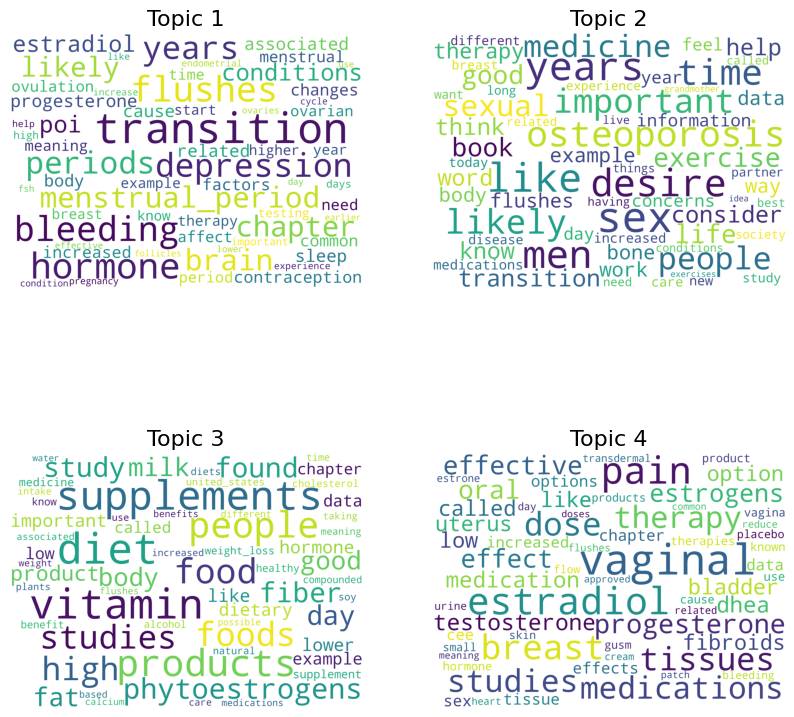

In [46]:
tmm_vis = Vis(sentiment=tmm_sentiment_model, lda=tmm_lda_model)
# chapter sentiments already covered in all books in the shelf 
# - no change (sentiments are the same only topics are changed)

tmm_vis.treemap_chapter_topic('figures/tmm_chapter_topic.html')  # treemap of chapter -> topics
tmm_vis.treemap_topic_sentiment('figures/tmm_topic_sentment.html')  # treemap of topics -> sentiments
tmm_vis.pyviz_topics('figures/tmm_pyvis_topics.html')  # pyVis topic analysis
try:
    tmm_vis.generate_topics_wordcloud('figures/tmm_wordclouds.svg')
except:
    print('issue in creating wordclouds')

### 5. Menopausing

In [47]:
m_df = bookshelf.create_corpus_custom_df(m_book_name)
m_df = m_df.reset_index()
m_df.head()

level_0  index         book  chapter  paragraph_number  \
0        0   4276  Menopausing        1                 1   
1        1   4277  Menopausing        1                 2   
2        2   4278  Menopausing        1                 3   
3        3   4279  Menopausing        1                 4   
4        4   4280  Menopausing        1                 5   

                                           paragraph  
0  INTRODUCTION:\n\n\nTHIS IS HAPPENING, PEOPLE ....  
1  I was forty-four when it started. I remember b...  
2  It was back in 2012 and I was on a Garnier sho...  
3  I found this particularly horrible because I w...  
4  Part of me was just thinking, God, maybe I'm i...

INFO:root:Calling preprocessing in LDA model:

INFO:root:Preprocessor initiated...
INFO:root:	stopwords length (standard): 326
INFO:root:	stopwords length: 381
INFO:root:	All paragraph are normalized by removing unwanted characters
INFO:root:	tokenization and initial preprocessing is done
INFO:root:	word count is done:
INFO:root:		{'know': 169, 'symptoms': 249, 'like': 323, 'feel': 211, 'time': 166, 'going': 193, 'hrt': 407, 'years': 165, 'need': 183, 'oestrogen': 197, 'help': 184}

INFO:gensim.models.phrases:collecting all words and their counts
INFO:gensim.models.phrases:PROGRESS: at sentence #0, processed 0 words and 0 word types
INFO:gensim.models.phrases:collected 32509 token types (unigram + bigrams) from a corpus of 31639 words and 1184 sentences
INFO:gensim.models.phrases:merged Phrases<32509 vocab, min_count=5, threshold=100, max_vocab_size=40000000>
INFO:gensim.utils:Phrases lifecycle event {'msg': 'built Phrases<32509 vocab, min_count=5, threshold=100, max_vocab_size=4000000

preprocessing workflow started...


INFO:gensim.models.ldamodel:using symmetric eta at 1.0
INFO:gensim.models.ldamodel:using serial LDA version on this node
INFO:gensim.models.ldamulticore:running online LDA training, 1 topics, 10 passes over the supplied corpus of 1184 documents, updating every 16000 documents, evaluating every ~1184 documents, iterating 10x with a convergence threshold of 0.001000
INFO:gensim.models.ldamulticore:training LDA model using 8 processes
INFO:gensim.models.ldamulticore:PROGRESS: pass 0, dispatched chunk #0 = documents up to #1184/1184, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (1.000): 0.009*"oestrogen" + 0.009*"going" + 0.008*"need" + 0.008*"help" + 0.008*"know" + 0.008*"time" + 0.008*"years" + 0.007*"want" + 0.006*"perimenopause" + 0.006*"think"
INFO:gensim.models.ldamodel:topic diff=0.551133, rho=1.000000
INFO:gensim.models.ldamodel:-6.730 per-word bound, 106.2 perplexity estimate based on a held-out corpus of 1184 documents with 20857 words
INFO:gensim.models.ldamulti

INFO:gensim.models.ldamodel:topic diff=0.090943, rho=0.621130
INFO:gensim.models.ldamodel:-6.862 per-word bound, 116.3 perplexity estimate based on a held-out corpus of 1184 documents with 20857 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 2, dispatched chunk #0 = documents up to #1184/1184, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.500): 0.015*"oestrogen" + 0.009*"years" + 0.009*"skin" + 0.008*"going" + 0.007*"perimenopause" + 0.007*"time" + 0.007*"life" + 0.007*"need" + 0.006*"know" + 0.006*"look"
INFO:gensim.models.ldamodel:topic #1 (0.500): 0.011*"help" + 0.010*"need" + 0.010*"going" + 0.010*"know" + 0.009*"want" + 0.008*"time" + 0.008*"doctor" + 0.008*"felt" + 0.006*"talk" + 0.006*"bit"
INFO:gensim.models.ldamodel:topic diff=0.122437, rho=0.527633
INFO:gensim.models.ldamodel:-6.824 per-word bound, 113.3 perplexity estimate based on a held-out corpus of 1184 documents with 20857 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 3, dispatched chunk 

INFO:gensim.models.ldamulticore:PROGRESS: pass 1, dispatched chunk #0 = documents up to #1184/1184, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.333): 0.016*"oestrogen" + 0.009*"skin" + 0.009*"years" + 0.008*"going" + 0.007*"time" + 0.007*"perimenopause" + 0.007*"need" + 0.006*"think" + 0.006*"started" + 0.006*"know"
INFO:gensim.models.ldamodel:topic #1 (0.333): 0.010*"going" + 0.010*"need" + 0.009*"know" + 0.009*"help" + 0.009*"want" + 0.009*"time" + 0.008*"doctor" + 0.007*"felt" + 0.007*"talk" + 0.006*"think"
INFO:gensim.models.ldamodel:topic #2 (0.333): 0.011*"help" + 0.009*"years" + 0.009*"going" + 0.008*"need" + 0.008*"know" + 0.008*"life" + 0.007*"time" + 0.006*"look" + 0.006*"good" + 0.006*"want"
INFO:gensim.models.ldamodel:topic diff=0.162256, rho=0.621130
INFO:gensim.models.ldamodel:-6.977 per-word bound, 126.0 perplexity estimate based on a held-out corpus of 1184 documents with 20857 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 2, dispatched chunk

INFO:gensim.models.ldamodel:topic diff=0.078366, rho=0.307264
INFO:gensim.models.ldamodel:-6.781 per-word bound, 109.9 perplexity estimate based on a held-out corpus of 1184 documents with 20857 words
INFO:gensim.utils:LdaMulticore lifecycle event {'msg': 'trained LdaMulticore<num_terms=1137, num_topics=3, decay=0.5, chunksize=2000> in 4.42s', 'datetime': '2023-06-11T21:31:35.991751', 'gensim': '4.3.1', 'python': '3.11.3 (main, May 15 2023, 10:43:03) [Clang 14.0.6 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'created'}
INFO:gensim.topic_coherence.probability_estimation:using ParallelWordOccurrenceAccumulator<processes=7, batch_size=64> to estimate probabilities from sliding windows
INFO:gensim.topic_coherence.text_analysis:7 accumulators retrieved from output queue
INFO:gensim.topic_coherence.text_analysis:accumulated word occurrence stats for 1184 virtual documents
INFO:gensim.models.ldamodel:using symmetric alpha at 0.25
INFO:gensim.models.ldamodel:using symmetric eta at

INFO:gensim.models.ldamulticore:PROGRESS: pass 6, dispatched chunk #0 = documents up to #1184/1184, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.250): 0.038*"oestrogen" + 0.016*"skin" + 0.013*"use" + 0.011*"progesterone" + 0.009*"hair" + 0.009*"perimenopause" + 0.008*"years" + 0.008*"taking" + 0.008*"need" + 0.007*"breast_cancer"
INFO:gensim.models.ldamodel:topic #1 (0.250): 0.015*"need" + 0.013*"know" + 0.013*"want" + 0.012*"going" + 0.012*"doctor" + 0.010*"right" + 0.010*"talk" + 0.009*"help" + 0.009*"time" + 0.008*"think"
INFO:gensim.models.ldamodel:topic #2 (0.250): 0.016*"help" + 0.010*"good" + 0.010*"years" + 0.010*"know" + 0.009*"look" + 0.009*"need" + 0.008*"life" + 0.007*"think" + 0.007*"early" + 0.007*"menopausal"
INFO:gensim.models.ldamodel:topic #3 (0.250): 0.012*"bit" + 0.012*"going" + 0.011*"life" + 0.010*"time" + 0.010*"felt" + 0.009*"story" + 0.009*"started" + 0.009*"years" + 0.008*"thought" + 0.008*"work"
INFO:gensim.models.ldamodel:topic diff=0.161

INFO:gensim.models.ldamodel:topic diff=0.332552, rho=0.621130
INFO:gensim.models.ldamodel:-7.137 per-word bound, 140.7 perplexity estimate based on a held-out corpus of 1184 documents with 20857 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 2, dispatched chunk #0 = documents up to #1184/1184, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.200): 0.032*"oestrogen" + 0.016*"skin" + 0.010*"progesterone" + 0.010*"use" + 0.009*"perimenopause" + 0.008*"years" + 0.007*"body" + 0.007*"need" + 0.006*"taking" + 0.006*"started"
INFO:gensim.models.ldamodel:topic #1 (0.200): 0.013*"know" + 0.012*"need" + 0.010*"want" + 0.010*"doctor" + 0.010*"talk" + 0.010*"think" + 0.009*"help" + 0.008*"going" + 0.007*"things" + 0.007*"people"
INFO:gensim.models.ldamodel:topic #2 (0.200): 0.013*"help" + 0.012*"years" + 0.010*"know" + 0.010*"need" + 0.010*"life" + 0.009*"good" + 0.008*"going" + 0.008*"felt" + 0.007*"think" + 0.007*"look"
INFO:gensim.models.ldamodel:topic #3 (0.200): 0.013*"b

INFO:gensim.models.ldamulticore:PROGRESS: pass 8, dispatched chunk #0 = documents up to #1184/1184, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.200): 0.044*"oestrogen" + 0.020*"skin" + 0.015*"use" + 0.013*"progesterone" + 0.009*"perimenopause" + 0.008*"body" + 0.008*"taking" + 0.007*"risk" + 0.007*"vagina" + 0.007*"need"
INFO:gensim.models.ldamodel:topic #1 (0.200): 0.018*"need" + 0.017*"know" + 0.015*"want" + 0.013*"talk" + 0.013*"think" + 0.012*"doctor" + 0.012*"going" + 0.011*"help" + 0.010*"try" + 0.009*"that's"
INFO:gensim.models.ldamodel:topic #2 (0.200): 0.013*"help" + 0.012*"good" + 0.012*"years" + 0.010*"need" + 0.010*"know" + 0.010*"life" + 0.009*"health" + 0.009*"early" + 0.009*"perimenopause" + 0.008*"look"
INFO:gensim.models.ldamodel:topic #3 (0.200): 0.015*"bit" + 0.012*"hair" + 0.011*"life" + 0.011*"going" + 0.011*"felt" + 0.010*"work" + 0.010*"time" + 0.009*"things" + 0.009*"started" + 0.009*"book"
INFO:gensim.models.ldamodel:topic #4 (0.200): 0.013

INFO:gensim.models.ldamodel:topic #4 (0.167): 0.014*"going" + 0.014*"time" + 0.010*"story" + 0.009*"years" + 0.008*"want" + 0.008*"help" + 0.007*"support" + 0.007*"know" + 0.006*"thought" + 0.006*"people"
INFO:gensim.models.ldamodel:topic #0 (0.167): 0.039*"oestrogen" + 0.014*"skin" + 0.014*"progesterone" + 0.012*"perimenopause" + 0.011*"years" + 0.009*"body" + 0.008*"use" + 0.007*"taking" + 0.007*"started" + 0.007*"start"
INFO:gensim.models.ldamodel:topic #3 (0.167): 0.016*"bit" + 0.012*"hair" + 0.011*"life" + 0.010*"going" + 0.009*"want" + 0.008*"felt" + 0.008*"help" + 0.007*"work" + 0.007*"perimenopause" + 0.007*"book"
INFO:gensim.models.ldamodel:topic #1 (0.167): 0.014*"know" + 0.014*"need" + 0.012*"want" + 0.012*"think" + 0.011*"talk" + 0.011*"going" + 0.010*"doctor" + 0.010*"help" + 0.009*"things" + 0.008*"perimenopause"
INFO:gensim.models.ldamodel:topic diff=0.381104, rho=0.466658
INFO:gensim.models.ldamodel:-7.020 per-word bound, 129.7 perplexity estimate based on a held-out co

INFO:gensim.models.ldamodel:topic #5 (0.167): 0.017*"need" + 0.016*"use" + 0.015*"health" + 0.015*"vagina" + 0.012*"oestrogen" + 0.011*"cancer" + 0.010*"sex" + 0.010*"doctor" + 0.009*"vaginal" + 0.008*"gel"
INFO:gensim.models.ldamodel:topic #3 (0.167): 0.019*"bit" + 0.016*"hair" + 0.014*"life" + 0.011*"going" + 0.010*"felt" + 0.009*"time" + 0.009*"started" + 0.008*"night" + 0.008*"exercise" + 0.008*"things"
INFO:gensim.models.ldamodel:topic #1 (0.167): 0.017*"know" + 0.016*"need" + 0.016*"want" + 0.015*"think" + 0.015*"going" + 0.013*"talk" + 0.011*"that's" + 0.011*"help" + 0.010*"things" + 0.010*"doctor"
INFO:gensim.models.ldamodel:topic #4 (0.167): 0.014*"story" + 0.013*"going" + 0.013*"years" + 0.012*"time" + 0.009*"support" + 0.009*"help" + 0.009*"want" + 0.008*"thought" + 0.008*"told" + 0.008*"felt"
INFO:gensim.models.ldamodel:topic diff=0.163823, rho=0.307264
INFO:gensim.models.ldamodel:-6.883 per-word bound, 118.0 perplexity estimate based on a held-out corpus of 1184 documents 

INFO:gensim.models.ldamodel:topic #3 (0.143): 0.016*"bit" + 0.013*"hair" + 0.011*"work" + 0.010*"going" + 0.009*"life" + 0.009*"felt" + 0.008*"things" + 0.008*"time" + 0.008*"book" + 0.007*"exercise"
INFO:gensim.models.ldamodel:topic #5 (0.143): 0.015*"oestrogen" + 0.015*"use" + 0.014*"cancer" + 0.014*"vagina" + 0.013*"health" + 0.011*"need" + 0.010*"doctor" + 0.009*"vaginal" + 0.008*"gel" + 0.007*"good"
INFO:gensim.models.ldamodel:topic #6 (0.143): 0.016*"felt" + 0.015*"started" + 0.014*"going" + 0.012*"know" + 0.011*"feeling" + 0.010*"want" + 0.010*"way" + 0.009*"years" + 0.009*"better" + 0.009*"perimenopause"
INFO:gensim.models.ldamodel:topic diff=0.402571, rho=0.422879
INFO:gensim.models.ldamodel:-7.018 per-word bound, 129.6 perplexity estimate based on a held-out corpus of 1184 documents with 20857 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 5, dispatched chunk #0 = documents up to #1184/1184, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.143): 0.044*"o

INFO:gensim.models.ldamodel:using symmetric alpha at 0.125
INFO:gensim.models.ldamodel:using symmetric eta at 0.125
INFO:gensim.models.ldamodel:using serial LDA version on this node
INFO:gensim.models.ldamulticore:running online LDA training, 8 topics, 10 passes over the supplied corpus of 1184 documents, updating every 16000 documents, evaluating every ~1184 documents, iterating 10x with a convergence threshold of 0.001000
INFO:gensim.models.ldamulticore:training LDA model using 8 processes
INFO:gensim.models.ldamulticore:PROGRESS: pass 0, dispatched chunk #0 = documents up to #1184/1184, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #3 (0.125): 0.009*"want" + 0.008*"going" + 0.008*"bit" + 0.008*"help" + 0.008*"perimenopause" + 0.007*"skin" + 0.007*"need" + 0.007*"life" + 0.006*"doctor" + 0.006*"time"
INFO:gensim.models.ldamodel:topic #2 (0.125): 0.013*"help" + 0.011*"years" + 0.010*"know" + 0.009*"need" + 0.009*"going" + 0.008*"think" + 0.008*"look" + 0.007*"life" + 0.00

INFO:gensim.models.ldamodel:topic #0 (0.125): 0.052*"oestrogen" + 0.025*"skin" + 0.018*"progesterone" + 0.012*"taking" + 0.012*"body" + 0.011*"hair" + 0.009*"breast_cancer" + 0.009*"use" + 0.009*"perimenopause" + 0.008*"years"
INFO:gensim.models.ldamodel:topic diff=0.404764, rho=0.389486
INFO:gensim.models.ldamodel:-7.037 per-word bound, 131.3 perplexity estimate based on a held-out corpus of 1184 documents with 20857 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 6, dispatched chunk #0 = documents up to #1184/1184, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #1 (0.125): 0.018*"need" + 0.017*"want" + 0.017*"talk" + 0.015*"know" + 0.012*"help" + 0.012*"things" + 0.011*"going" + 0.011*"think" + 0.010*"time" + 0.010*"people"
INFO:gensim.models.ldamodel:topic #7 (0.125): 0.017*"bit" + 0.014*"years" + 0.011*"work" + 0.010*"treatment" + 0.010*"good" + 0.009*"think" + 0.009*"started" + 0.009*"sleep" + 0.009*"anxiety" + 0.008*"taking"
INFO:gensim.models.ldamodel:topic #3 (

INFO:gensim.models.ldamodel:topic diff=0.969998, rho=1.000000
INFO:gensim.models.ldamodel:-7.679 per-word bound, 205.0 perplexity estimate based on a held-out corpus of 1184 documents with 20857 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 1, dispatched chunk #0 = documents up to #1184/1184, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #7 (0.111): 0.012*"years" + 0.012*"bit" + 0.011*"work" + 0.010*"treatment" + 0.010*"taking" + 0.009*"life" + 0.008*"help" + 0.007*"perimenopause" + 0.007*"think" + 0.006*"going"
INFO:gensim.models.ldamodel:topic #6 (0.111): 0.014*"going" + 0.011*"want" + 0.011*"perimenopause" + 0.011*"know" + 0.009*"think" + 0.009*"felt" + 0.009*"feeling" + 0.008*"started" + 0.008*"better" + 0.007*"need"
INFO:gensim.models.ldamodel:topic #5 (0.111): 0.012*"time" + 0.012*"oestrogen" + 0.011*"health" + 0.010*"need" + 0.008*"cancer" + 0.008*"use" + 0.008*"vagina" + 0.007*"doctor" + 0.007*"vaginal" + 0.007*"right"
INFO:gensim.models.ldamodel:topic #8 (0

INFO:gensim.models.ldamodel:-7.046 per-word bound, 132.2 perplexity estimate based on a held-out corpus of 1184 documents with 20857 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 7, dispatched chunk #0 = documents up to #1184/1184, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #3 (0.111): 0.011*"exercise" + 0.011*"life" + 0.011*"hair" + 0.010*"bit" + 0.010*"going" + 0.009*"story" + 0.009*"time" + 0.009*"book" + 0.008*"want" + 0.008*"work"
INFO:gensim.models.ldamodel:topic #7 (0.111): 0.016*"years" + 0.015*"treatment" + 0.014*"bit" + 0.014*"taking" + 0.013*"hot_flushes" + 0.013*"sleep" + 0.012*"started" + 0.012*"work" + 0.010*"anxiety" + 0.009*"night"
INFO:gensim.models.ldamodel:topic #4 (0.111): 0.015*"going" + 0.014*"time" + 0.012*"story" + 0.010*"told" + 0.008*"years" + 0.008*"year" + 0.008*"people" + 0.008*"started" + 0.007*"help" + 0.007*"feeling"
INFO:gensim.models.ldamodel:topic #5 (0.111): 0.017*"health" + 0.017*"use" + 0.016*"cancer" + 0.015*"vagina" + 0.014

INFO:gensim.models.ldamodel:topic #8 (0.100): 0.012*"help" + 0.012*"need" + 0.012*"want" + 0.011*"know" + 0.011*"right" + 0.009*"love" + 0.009*"look" + 0.009*"things" + 0.008*"way" + 0.008*"find"
INFO:gensim.models.ldamodel:topic #0 (0.100): 0.019*"oestrogen" + 0.017*"skin" + 0.012*"years" + 0.011*"body" + 0.011*"hair" + 0.010*"progesterone" + 0.010*"started" + 0.010*"perimenopause" + 0.008*"think" + 0.008*"sex"
INFO:gensim.models.ldamodel:topic #5 (0.100): 0.016*"need" + 0.012*"vagina" + 0.012*"use" + 0.011*"sex" + 0.011*"doctor" + 0.010*"vaginal" + 0.010*"good" + 0.009*"oestrogen" + 0.009*"hormones" + 0.008*"health"
INFO:gensim.models.ldamodel:topic #4 (0.100): 0.017*"going" + 0.016*"time" + 0.010*"want" + 0.009*"help" + 0.009*"story" + 0.009*"know" + 0.009*"years" + 0.007*"oestrogen" + 0.007*"need" + 0.006*"anxiety"
INFO:gensim.models.ldamodel:topic #7 (0.100): 0.014*"bit" + 0.013*"work" + 0.011*"think" + 0.011*"years" + 0.011*"going" + 0.010*"treatment" + 0.010*"help" + 0.009*"taki

INFO:gensim.models.ldamodel:topic #1 (0.100): 0.023*"talk" + 0.017*"need" + 0.016*"want" + 0.014*"know" + 0.012*"help" + 0.011*"going" + 0.011*"doctor" + 0.009*"things" + 0.008*"ask" + 0.008*"try"
INFO:gensim.models.ldamodel:topic #3 (0.100): 0.015*"bit" + 0.012*"felt" + 0.011*"life" + 0.011*"periods" + 0.011*"started" + 0.011*"story" + 0.010*"book" + 0.010*"going" + 0.009*"perimenopause" + 0.009*"exercise"
INFO:gensim.models.ldamodel:topic #2 (0.100): 0.017*"years" + 0.015*"help" + 0.015*"life" + 0.011*"felt" + 0.010*"look" + 0.010*"time" + 0.010*"age" + 0.009*"libido" + 0.008*"early" + 0.008*"know"
INFO:gensim.models.ldamodel:topic #7 (0.100): 0.016*"work" + 0.015*"think" + 0.015*"bit" + 0.012*"going" + 0.012*"kind" + 0.012*"sleep" + 0.012*"years" + 0.011*"remember" + 0.010*"help" + 0.010*"thought"
INFO:gensim.models.ldamodel:topic diff=0.306153, rho=0.322883
INFO:gensim.models.ldamodel:-7.064 per-word bound, 133.8 perplexity estimate based on a held-out corpus of 1184 documents with

INFO:gensim.models.ldamodel:topic #9 (0.091): 0.039*"oestrogen" + 0.015*"progesterone" + 0.013*"hair" + 0.012*"skin" + 0.010*"time" + 0.009*"need" + 0.009*"breast_cancer" + 0.009*"perimenopause" + 0.008*"hormones" + 0.008*"help"
INFO:gensim.models.ldamodel:topic #4 (0.091): 0.018*"going" + 0.018*"time" + 0.014*"story" + 0.011*"years" + 0.009*"find" + 0.008*"help" + 0.008*"want" + 0.008*"year" + 0.007*"know" + 0.007*"doctor"
INFO:gensim.models.ldamodel:topic #0 (0.091): 0.033*"oestrogen" + 0.016*"body" + 0.016*"years" + 0.012*"perimenopause" + 0.009*"skin" + 0.008*"ovaries" + 0.008*"taking" + 0.008*"changes" + 0.007*"life" + 0.007*"levels"
INFO:gensim.models.ldamodel:topic diff=0.780615, rho=0.466658
INFO:gensim.models.ldamodel:-7.270 per-word bound, 154.3 perplexity estimate based on a held-out corpus of 1184 documents with 20857 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 4, dispatched chunk #0 = documents up to #1184/1184, outstanding queue size 1
INFO:gensim.models.ldamodel

INFO:gensim.models.ldamodel:topic #6 (0.091): 0.032*"felt" + 0.016*"going" + 0.015*"started" + 0.012*"feeling" + 0.012*"years" + 0.010*"perimenopause" + 0.010*"way" + 0.009*"went" + 0.009*"perimenopausal" + 0.009*"having"
INFO:gensim.models.ldamodel:topic #7 (0.091): 0.024*"work" + 0.014*"treatment" + 0.011*"remember" + 0.009*"sleep" + 0.009*"help" + 0.008*"years" + 0.008*"appointment" + 0.008*"day" + 0.008*"anxiety" + 0.008*"hot_flushes"
INFO:gensim.models.ldamodel:topic #1 (0.091): 0.022*"know" + 0.020*"talk" + 0.015*"think" + 0.013*"going" + 0.012*"time" + 0.011*"book" + 0.011*"that's" + 0.011*"help" + 0.011*"things" + 0.010*"need"
INFO:gensim.models.ldamodel:topic diff=0.278729, rho=0.307264
INFO:gensim.models.ldamodel:-7.063 per-word bound, 133.7 perplexity estimate based on a held-out corpus of 1184 documents with 20857 words
INFO:gensim.utils:LdaMulticore lifecycle event {'msg': 'trained LdaMulticore<num_terms=1137, num_topics=11, decay=0.5, chunksize=2000> in 4.56s', 'datetime'

INFO:gensim.models.ldamodel:topic #9 (0.083): 0.047*"oestrogen" + 0.025*"hair" + 0.016*"skin" + 0.016*"progesterone" + 0.014*"need" + 0.014*"taking" + 0.011*"perimenopause" + 0.009*"time" + 0.008*"hormones" + 0.008*"start"
INFO:gensim.models.ldamodel:topic #10 (0.083): 0.014*"doctor" + 0.014*"want" + 0.013*"help" + 0.013*"life" + 0.012*"perimenopause" + 0.011*"look" + 0.011*"better" + 0.010*"need" + 0.009*"oestrogen" + 0.008*"periods"
INFO:gensim.models.ldamodel:topic diff=0.757009, rho=0.422879
INFO:gensim.models.ldamodel:-7.227 per-word bound, 149.8 perplexity estimate based on a held-out corpus of 1184 documents with 20857 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 5, dispatched chunk #0 = documents up to #1184/1184, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #5 (0.083): 0.017*"cancer" + 0.016*"use" + 0.014*"vaginal" + 0.014*"vagina" + 0.014*"health" + 0.013*"oestrogen" + 0.011*"need" + 0.010*"getting" + 0.010*"thyroid" + 0.009*"doctor"
INFO:gensim.models.l

INFO:gensim.models.ldamodel:using symmetric alpha at 0.07692307692307693
INFO:gensim.models.ldamodel:using symmetric eta at 0.07692307692307693
INFO:gensim.models.ldamodel:using serial LDA version on this node
INFO:gensim.models.ldamulticore:running online LDA training, 13 topics, 10 passes over the supplied corpus of 1184 documents, updating every 16000 documents, evaluating every ~1184 documents, iterating 10x with a convergence threshold of 0.001000
INFO:gensim.models.ldamulticore:training LDA model using 8 processes
INFO:gensim.models.ldamulticore:PROGRESS: pass 0, dispatched chunk #0 = documents up to #1184/1184, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #8 (0.077): 0.014*"need" + 0.014*"help" + 0.011*"know" + 0.009*"things" + 0.009*"way" + 0.008*"look" + 0.008*"right" + 0.007*"going" + 0.007*"love" + 0.007*"oestrogen"
INFO:gensim.models.ldamodel:topic #3 (0.077): 0.010*"bit" + 0.009*"going" + 0.008*"want" + 0.008*"skin" + 0.008*"book" + 0.008*"need" + 0.007*"peri

INFO:gensim.models.ldamodel:topic #12 (0.077): 0.020*"thyroid" + 0.018*"boobs" + 0.013*"changes" + 0.013*"doctor" + 0.011*"times" + 0.011*"exercise" + 0.011*"life" + 0.010*"find" + 0.009*"place" + 0.009*"bra"
INFO:gensim.models.ldamodel:topic diff=0.689096, rho=0.389486
INFO:gensim.models.ldamodel:-7.220 per-word bound, 149.1 perplexity estimate based on a held-out corpus of 1184 documents with 20857 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 6, dispatched chunk #0 = documents up to #1184/1184, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #3 (0.077): 0.013*"bit" + 0.013*"life" + 0.012*"time" + 0.012*"book" + 0.010*"work" + 0.010*"story" + 0.010*"maybe" + 0.010*"going" + 0.009*"want" + 0.009*"help"
INFO:gensim.models.ldamodel:topic #12 (0.077): 0.022*"thyroid" + 0.018*"boobs" + 0.015*"changes" + 0.013*"exercise" + 0.013*"doctor" + 0.012*"times" + 0.011*"life" + 0.010*"place" + 0.010*"find" + 0.009*"bra"
INFO:gensim.models.ldamodel:topic #7 (0.077): 0.022*"bit" + 

INFO:gensim.models.ldamodel:-8.072 per-word bound, 269.1 perplexity estimate based on a held-out corpus of 1184 documents with 20857 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 1, dispatched chunk #0 = documents up to #1184/1184, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #13 (0.071): 0.022*"years" + 0.015*"know" + 0.012*"things" + 0.011*"doctor" + 0.011*"work" + 0.010*"need" + 0.009*"help" + 0.009*"felt" + 0.009*"going" + 0.008*"story"
INFO:gensim.models.ldamodel:topic #11 (0.071): 0.013*"going" + 0.009*"perimenopause" + 0.008*"skin" + 0.008*"periods" + 0.007*"want" + 0.007*"look" + 0.007*"oestrogen" + 0.007*"thought" + 0.006*"came" + 0.006*"felt"
INFO:gensim.models.ldamodel:topic #12 (0.071): 0.009*"day" + 0.009*"boobs" + 0.008*"going" + 0.008*"find" + 0.008*"breast_cancer" + 0.007*"night" + 0.007*"shower" + 0.007*"know" + 0.007*"age" + 0.007*"help"
INFO:gensim.models.ldamodel:topic #9 (0.071): 0.033*"oestrogen" + 0.011*"progesterone" + 0.010*"help" + 0.010*"

INFO:gensim.models.ldamodel:-7.207 per-word bound, 147.7 perplexity estimate based on a held-out corpus of 1184 documents with 20857 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 7, dispatched chunk #0 = documents up to #1184/1184, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #5 (0.071): 0.023*"sex" + 0.023*"use" + 0.023*"vagina" + 0.019*"cancer" + 0.017*"oestrogen" + 0.015*"vaginal" + 0.015*"treatment" + 0.012*"health" + 0.011*"vulva" + 0.011*"vaginal_dryness"
INFO:gensim.models.ldamodel:topic #10 (0.071): 0.020*"start" + 0.017*"want" + 0.014*"hair" + 0.013*"getting" + 0.012*"going" + 0.012*"age" + 0.012*"perimenopause" + 0.011*"help" + 0.010*"look" + 0.010*"oestrogen"
INFO:gensim.models.ldamodel:topic #9 (0.071): 0.066*"oestrogen" + 0.028*"progesterone" + 0.015*"skin" + 0.012*"hair" + 0.012*"breast_cancer" + 0.011*"taking" + 0.010*"need" + 0.010*"perimenopause" + 0.010*"hormones" + 0.009*"combined"
INFO:gensim.models.ldamodel:topic #6 (0.071): 0.020*"started" + 0

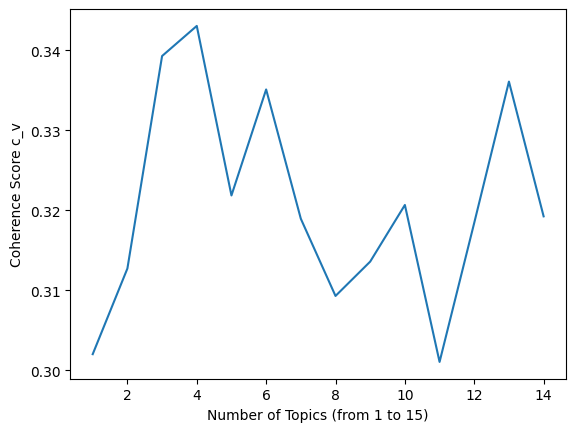

In [48]:
# creating lda object and choosing number of topics
m_lda_model = LDAModel(m_df)
m_lda_model.preprocess(custom_stopwords=custom_stopwords)  
m_lda_model.create_bow_model() 
m_lda_model.plot_optimal_coherent_scores() 

In [49]:
# number of topics = 4 another good example is 6 (or 10) based on the c_v measure
m_lda_model.create_lda_model(4)

m_lda_model.format_topics_sentences()
m_df = m_lda_model.df
m_df.head()

INFO:gensim.models.ldamodel:using symmetric alpha at 0.25
INFO:gensim.models.ldamodel:using symmetric eta at 0.25
INFO:gensim.models.ldamodel:using serial LDA version on this node
INFO:gensim.models.ldamulticore:running online LDA training, 4 topics, 100 passes over the supplied corpus of 1184 documents, updating every 8000 documents, evaluating every ~1184 documents, iterating 100x with a convergence threshold of 0.001000
INFO:gensim.models.ldamulticore:training LDA model using 4 processes
INFO:gensim.models.ldamulticore:PROGRESS: pass 0, dispatched chunk #0 = documents up to #1184/1184, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.250): 0.014*"oestrogen" + 0.010*"going" + 0.010*"help" + 0.010*"want" + 0.010*"skin" + 0.009*"hair" + 0.008*"time" + 0.007*"use" + 0.007*"bit" + 0.006*"breast_cancer"
INFO:gensim.models.ldamodel:topic #1 (0.250): 0.012*"going" + 0.011*"know" + 0.009*"years" + 0.007*"help" + 0.007*"body" + 0.007*"started" + 0.007*"want" + 0.007*"oestrogen

INFO:gensim.models.ldamodel:topic diff=0.109063, rho=0.362929
INFO:gensim.models.ldamodel:-6.864 per-word bound, 116.5 perplexity estimate based on a held-out corpus of 1184 documents with 20857 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 7, dispatched chunk #0 = documents up to #1184/1184, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.250): 0.023*"oestrogen" + 0.015*"hair" + 0.014*"skin" + 0.011*"use" + 0.011*"breast_cancer" + 0.009*"vagina" + 0.008*"cancer" + 0.008*"help" + 0.007*"good" + 0.007*"taking"
INFO:gensim.models.ldamodel:topic #1 (0.250): 0.013*"going" + 0.011*"know" + 0.009*"started" + 0.008*"time" + 0.008*"years" + 0.008*"work" + 0.007*"people" + 0.007*"think" + 0.007*"felt" + 0.007*"day"
INFO:gensim.models.ldamodel:topic #2 (0.250): 0.015*"need" + 0.012*"years" + 0.010*"want" + 0.010*"know" + 0.010*"felt" + 0.010*"book" + 0.009*"time" + 0.009*"help" + 0.009*"going" + 0.009*"think"
INFO:gensim.models.ldamodel:topic #3 (0.250): 0.018*"oestrogen"

INFO:gensim.models.ldamodel:-6.815 per-word bound, 112.6 perplexity estimate based on a held-out corpus of 1184 documents with 20857 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 14, dispatched chunk #0 = documents up to #1184/1184, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.250): 0.024*"oestrogen" + 0.017*"hair" + 0.016*"skin" + 0.012*"breast_cancer" + 0.011*"use" + 0.010*"vagina" + 0.010*"cancer" + 0.008*"good" + 0.008*"taking" + 0.007*"treatment"
INFO:gensim.models.ldamodel:topic #1 (0.250): 0.014*"going" + 0.011*"know" + 0.009*"time" + 0.009*"started" + 0.008*"years" + 0.008*"felt" + 0.008*"work" + 0.008*"bit" + 0.008*"life" + 0.007*"people"
INFO:gensim.models.ldamodel:topic #2 (0.250): 0.015*"need" + 0.012*"help" + 0.012*"want" + 0.012*"years" + 0.011*"book" + 0.010*"know" + 0.010*"going" + 0.010*"think" + 0.010*"time" + 0.009*"story"
INFO:gensim.models.ldamodel:topic #3 (0.250): 0.020*"oestrogen" + 0.015*"perimenopause" + 0.012*"hormones" + 0.010*"nee

INFO:gensim.models.ldamulticore:PROGRESS: pass 21, dispatched chunk #0 = documents up to #1184/1184, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.250): 0.024*"oestrogen" + 0.018*"hair" + 0.017*"skin" + 0.012*"breast_cancer" + 0.011*"use" + 0.011*"cancer" + 0.011*"vagina" + 0.008*"taking" + 0.008*"good" + 0.007*"treatment"
INFO:gensim.models.ldamodel:topic #1 (0.250): 0.014*"going" + 0.011*"know" + 0.010*"time" + 0.009*"started" + 0.009*"felt" + 0.009*"years" + 0.008*"bit" + 0.008*"life" + 0.008*"work" + 0.007*"people"
INFO:gensim.models.ldamodel:topic #2 (0.250): 0.015*"need" + 0.014*"help" + 0.013*"want" + 0.012*"book" + 0.012*"years" + 0.011*"going" + 0.011*"know" + 0.010*"story" + 0.010*"think" + 0.010*"talk"
INFO:gensim.models.ldamodel:topic #3 (0.250): 0.021*"oestrogen" + 0.016*"perimenopause" + 0.012*"hormones" + 0.010*"need" + 0.009*"progesterone" + 0.008*"doctor" + 0.008*"dose" + 0.007*"hormone" + 0.007*"start" + 0.007*"help"
INFO:gensim.models.ldamodel:topi

INFO:gensim.models.ldamodel:topic #0 (0.250): 0.024*"oestrogen" + 0.018*"hair" + 0.017*"skin" + 0.013*"breast_cancer" + 0.012*"cancer" + 0.011*"use" + 0.011*"vagina" + 0.008*"taking" + 0.008*"good" + 0.008*"treatment"
INFO:gensim.models.ldamodel:topic #1 (0.250): 0.014*"going" + 0.010*"know" + 0.010*"felt" + 0.010*"time" + 0.009*"started" + 0.009*"years" + 0.008*"life" + 0.008*"bit" + 0.008*"work" + 0.007*"people"
INFO:gensim.models.ldamodel:topic #2 (0.250): 0.015*"need" + 0.015*"help" + 0.014*"want" + 0.013*"book" + 0.011*"know" + 0.011*"years" + 0.011*"going" + 0.011*"story" + 0.010*"think" + 0.010*"talk"
INFO:gensim.models.ldamodel:topic #3 (0.250): 0.021*"oestrogen" + 0.016*"perimenopause" + 0.013*"hormones" + 0.010*"need" + 0.009*"progesterone" + 0.009*"doctor" + 0.008*"dose" + 0.008*"hormone" + 0.007*"start" + 0.007*"help"
INFO:gensim.models.ldamodel:topic diff=0.019735, rho=0.183828
INFO:gensim.models.ldamodel:-6.785 per-word bound, 110.3 perplexity estimate based on a held-out

INFO:gensim.models.ldamodel:topic #1 (0.250): 0.014*"going" + 0.010*"felt" + 0.010*"know" + 0.010*"time" + 0.009*"started" + 0.009*"years" + 0.009*"life" + 0.008*"bit" + 0.008*"work" + 0.007*"people"
INFO:gensim.models.ldamodel:topic #2 (0.250): 0.015*"need" + 0.015*"help" + 0.014*"want" + 0.013*"book" + 0.012*"know" + 0.011*"going" + 0.011*"story" + 0.011*"years" + 0.010*"talk" + 0.010*"think"
INFO:gensim.models.ldamodel:topic #3 (0.250): 0.021*"oestrogen" + 0.017*"perimenopause" + 0.013*"hormones" + 0.010*"need" + 0.009*"progesterone" + 0.009*"doctor" + 0.008*"dose" + 0.008*"start" + 0.008*"hormone" + 0.007*"help"
INFO:gensim.models.ldamodel:topic diff=0.014207, rho=0.165313
INFO:gensim.models.ldamodel:-6.780 per-word bound, 109.9 perplexity estimate based on a held-out corpus of 1184 documents with 20857 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 36, dispatched chunk #0 = documents up to #1184/1184, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.250): 0.0

INFO:gensim.models.ldamodel:topic #2 (0.250): 0.015*"help" + 0.015*"need" + 0.014*"want" + 0.014*"book" + 0.012*"know" + 0.011*"going" + 0.011*"story" + 0.010*"talk" + 0.010*"years" + 0.010*"think"
INFO:gensim.models.ldamodel:topic #3 (0.250): 0.021*"oestrogen" + 0.017*"perimenopause" + 0.013*"hormones" + 0.010*"doctor" + 0.009*"need" + 0.009*"progesterone" + 0.008*"start" + 0.008*"dose" + 0.008*"hormone" + 0.007*"help"
INFO:gensim.models.ldamodel:topic diff=0.010999, rho=0.151460
INFO:gensim.models.ldamodel:-6.775 per-word bound, 109.5 perplexity estimate based on a held-out corpus of 1184 documents with 20857 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 43, dispatched chunk #0 = documents up to #1184/1184, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.250): 0.025*"oestrogen" + 0.018*"hair" + 0.017*"skin" + 0.013*"breast_cancer" + 0.013*"cancer" + 0.011*"use" + 0.011*"vagina" + 0.009*"treatment" + 0.009*"taking" + 0.008*"good"
INFO:gensim.models.ldamodel:top

INFO:gensim.models.ldamodel:topic #3 (0.250): 0.021*"oestrogen" + 0.016*"perimenopause" + 0.013*"hormones" + 0.010*"doctor" + 0.009*"progesterone" + 0.009*"need" + 0.008*"start" + 0.008*"dose" + 0.008*"hormone" + 0.007*"help"
INFO:gensim.models.ldamodel:topic diff=0.008480, rho=0.140592
INFO:gensim.models.ldamodel:-6.772 per-word bound, 109.3 perplexity estimate based on a held-out corpus of 1184 documents with 20857 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 50, dispatched chunk #0 = documents up to #1184/1184, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.250): 0.025*"oestrogen" + 0.018*"hair" + 0.018*"skin" + 0.013*"breast_cancer" + 0.013*"cancer" + 0.011*"use" + 0.011*"vagina" + 0.009*"treatment" + 0.009*"taking" + 0.008*"age"
INFO:gensim.models.ldamodel:topic #1 (0.250): 0.014*"going" + 0.011*"felt" + 0.010*"time" + 0.010*"know" + 0.009*"years" + 0.009*"started" + 0.009*"life" + 0.008*"bit" + 0.008*"work" + 0.007*"people"
INFO:gensim.models.ldamodel:to

INFO:gensim.models.ldamodel:topic diff=0.006737, rho=0.131771
INFO:gensim.models.ldamodel:-6.770 per-word bound, 109.1 perplexity estimate based on a held-out corpus of 1184 documents with 20857 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 57, dispatched chunk #0 = documents up to #1184/1184, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.250): 0.025*"oestrogen" + 0.018*"hair" + 0.018*"skin" + 0.013*"breast_cancer" + 0.013*"cancer" + 0.011*"use" + 0.011*"vagina" + 0.009*"treatment" + 0.008*"taking" + 0.008*"age"
INFO:gensim.models.ldamodel:topic #1 (0.250): 0.014*"going" + 0.011*"felt" + 0.010*"time" + 0.010*"know" + 0.010*"years" + 0.009*"started" + 0.009*"life" + 0.008*"bit" + 0.008*"work" + 0.007*"people"
INFO:gensim.models.ldamodel:topic #2 (0.250): 0.016*"help" + 0.016*"need" + 0.015*"want" + 0.014*"book" + 0.013*"know" + 0.012*"going" + 0.011*"story" + 0.011*"talk" + 0.010*"time" + 0.010*"think"
INFO:gensim.models.ldamodel:topic #3 (0.250): 0.021*"oestro

INFO:gensim.models.ldamodel:-6.768 per-word bound, 109.0 perplexity estimate based on a held-out corpus of 1184 documents with 20857 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 64, dispatched chunk #0 = documents up to #1184/1184, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.250): 0.025*"oestrogen" + 0.018*"hair" + 0.018*"skin" + 0.013*"breast_cancer" + 0.013*"cancer" + 0.011*"use" + 0.011*"vagina" + 0.009*"treatment" + 0.008*"taking" + 0.008*"age"
INFO:gensim.models.ldamodel:topic #1 (0.250): 0.014*"going" + 0.011*"felt" + 0.010*"time" + 0.010*"years" + 0.010*"know" + 0.009*"started" + 0.009*"life" + 0.008*"bit" + 0.008*"work" + 0.007*"day"
INFO:gensim.models.ldamodel:topic #2 (0.250): 0.016*"help" + 0.016*"need" + 0.015*"want" + 0.014*"book" + 0.013*"know" + 0.012*"going" + 0.011*"story" + 0.011*"talk" + 0.010*"doctor" + 0.010*"time"
INFO:gensim.models.ldamodel:topic #3 (0.250): 0.021*"oestrogen" + 0.017*"perimenopause" + 0.014*"hormones" + 0.010*"doctor"

INFO:gensim.models.ldamulticore:PROGRESS: pass 71, dispatched chunk #0 = documents up to #1184/1184, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.250): 0.025*"oestrogen" + 0.018*"hair" + 0.018*"skin" + 0.013*"breast_cancer" + 0.013*"cancer" + 0.011*"vagina" + 0.011*"use" + 0.009*"treatment" + 0.008*"taking" + 0.008*"age"
INFO:gensim.models.ldamodel:topic #1 (0.250): 0.014*"going" + 0.011*"felt" + 0.010*"time" + 0.010*"years" + 0.010*"know" + 0.009*"started" + 0.009*"life" + 0.008*"bit" + 0.008*"work" + 0.008*"day"
INFO:gensim.models.ldamodel:topic #2 (0.250): 0.016*"help" + 0.016*"need" + 0.015*"want" + 0.014*"book" + 0.013*"know" + 0.012*"going" + 0.011*"story" + 0.011*"talk" + 0.011*"doctor" + 0.010*"time"
INFO:gensim.models.ldamodel:topic #3 (0.250): 0.021*"oestrogen" + 0.017*"perimenopause" + 0.014*"hormones" + 0.010*"doctor" + 0.009*"progesterone" + 0.009*"need" + 0.009*"start" + 0.008*"dose" + 0.007*"hormone" + 0.007*"help"
INFO:gensim.models.ldamodel:topic di

INFO:gensim.models.ldamodel:topic #0 (0.250): 0.025*"oestrogen" + 0.018*"hair" + 0.018*"skin" + 0.013*"breast_cancer" + 0.013*"cancer" + 0.011*"vagina" + 0.011*"use" + 0.009*"treatment" + 0.008*"taking" + 0.008*"age"
INFO:gensim.models.ldamodel:topic #1 (0.250): 0.013*"going" + 0.011*"felt" + 0.010*"time" + 0.010*"years" + 0.009*"know" + 0.009*"life" + 0.009*"started" + 0.008*"bit" + 0.008*"work" + 0.008*"day"
INFO:gensim.models.ldamodel:topic #2 (0.250): 0.017*"help" + 0.016*"need" + 0.016*"want" + 0.014*"book" + 0.013*"know" + 0.012*"going" + 0.011*"story" + 0.011*"doctor" + 0.011*"talk" + 0.010*"think"
INFO:gensim.models.ldamodel:topic #3 (0.250): 0.021*"oestrogen" + 0.017*"perimenopause" + 0.014*"hormones" + 0.010*"doctor" + 0.009*"start" + 0.009*"progesterone" + 0.009*"need" + 0.008*"dose" + 0.007*"hormone" + 0.007*"changes"
INFO:gensim.models.ldamodel:topic diff=0.003791, rho=0.112090
INFO:gensim.models.ldamodel:-6.765 per-word bound, 108.8 perplexity estimate based on a held-out

INFO:gensim.models.ldamodel:topic #1 (0.250): 0.013*"going" + 0.011*"felt" + 0.010*"time" + 0.010*"years" + 0.009*"life" + 0.009*"know" + 0.009*"started" + 0.009*"bit" + 0.008*"work" + 0.008*"day"
INFO:gensim.models.ldamodel:topic #2 (0.250): 0.017*"help" + 0.016*"need" + 0.016*"want" + 0.014*"book" + 0.013*"know" + 0.012*"going" + 0.011*"story" + 0.011*"doctor" + 0.011*"talk" + 0.010*"think"
INFO:gensim.models.ldamodel:topic #3 (0.250): 0.021*"oestrogen" + 0.016*"perimenopause" + 0.014*"hormones" + 0.010*"doctor" + 0.009*"start" + 0.009*"progesterone" + 0.009*"need" + 0.008*"dose" + 0.007*"hormone" + 0.007*"changes"
INFO:gensim.models.ldamodel:topic diff=0.003290, rho=0.107464
INFO:gensim.models.ldamodel:-6.764 per-word bound, 108.7 perplexity estimate based on a held-out corpus of 1184 documents with 20857 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 86, dispatched chunk #0 = documents up to #1184/1184, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.250): 0.

INFO:gensim.models.ldamodel:topic #2 (0.250): 0.017*"help" + 0.016*"need" + 0.016*"want" + 0.014*"book" + 0.013*"know" + 0.012*"going" + 0.011*"story" + 0.011*"doctor" + 0.011*"talk" + 0.010*"think"
INFO:gensim.models.ldamodel:topic #3 (0.250): 0.021*"oestrogen" + 0.016*"perimenopause" + 0.014*"hormones" + 0.010*"doctor" + 0.009*"start" + 0.009*"progesterone" + 0.009*"need" + 0.008*"dose" + 0.007*"hormone" + 0.007*"changes"
INFO:gensim.models.ldamodel:topic diff=0.002975, rho=0.103367
INFO:gensim.models.ldamodel:-6.763 per-word bound, 108.6 perplexity estimate based on a held-out corpus of 1184 documents with 20857 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 93, dispatched chunk #0 = documents up to #1184/1184, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.250): 0.025*"oestrogen" + 0.018*"hair" + 0.018*"skin" + 0.013*"breast_cancer" + 0.013*"cancer" + 0.011*"vagina" + 0.011*"use" + 0.009*"treatment" + 0.008*"taking" + 0.008*"age"
INFO:gensim.models.ldamodel:

INFO:gensim.models.ldamodel:topic #3 (0.250): 0.021*"oestrogen" + 0.016*"perimenopause" + 0.014*"hormones" + 0.010*"doctor" + 0.009*"start" + 0.009*"progesterone" + 0.009*"need" + 0.008*"dose" + 0.007*"hormone" + 0.007*"changes"
INFO:gensim.models.ldamodel:topic diff=0.002616, rho=0.099705
INFO:gensim.models.ldamodel:-6.763 per-word bound, 108.6 perplexity estimate based on a held-out corpus of 1184 documents with 20857 words
INFO:gensim.utils:LdaMulticore lifecycle event {'msg': 'trained LdaMulticore<num_terms=1137, num_topics=4, decay=0.5, chunksize=2000> in 54.73s', 'datetime': '2023-06-11T21:34:10.964483', 'gensim': '4.3.1', 'python': '3.11.3 (main, May 15 2023, 10:43:03) [Clang 14.0.6 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'created'}
INFO:gensim.models.ldamodel:topic #0 (0.250): 0.025*"oestrogen" + 0.018*"hair" + 0.018*"skin" + 0.013*"breast_cancer" + 0.013*"cancer" + 0.011*"vagina" + 0.011*"use" + 0.009*"treatment" + 0.008*"taking" + 0.008*"age"
INFO:gensim.mod

level_0  index         book  chapter  paragraph_number  \
0        0   4276  Menopausing        1                 1   
1        1   4277  Menopausing        1                 2   
2        2   4278  Menopausing        1                 3   
3        3   4279  Menopausing        1                 4   
4        4   4280  Menopausing        1                 5   

                                           paragraph  \
0  INTRODUCTION:\n\n\nTHIS IS HAPPENING, PEOPLE ....   
1  I was forty-four when it started. I remember b...   
2  It was back in 2012 and I was on a Garnier sho...   
3  I found this particularly horrible because I w...   
4  Part of me was just thinking, God, maybe I'm i...   

                                              tokens  \
0  [introduction, happening, people, menopausingm...   
1  [started, remember, weird, best, way, describe...   
2  [garnier, shoot, prague, working, amazing, dir...   
3  [found, particularly, horrible, heroin, addict...   
4  [thinking, god, maybe, ill, maybe, there's, go...   

                                           processed  dominant_topic  \
0  [happening, people, book, know, weird, literal...               2   
1  [started, remember, weird, best, way, describe...               1   
2  [working, amazing, asking, release, inner, fre...               1   
3  [found, particularly, horrible, long, time, ag...               1   
4  [thinking, god, maybe, maybe, there's, going, ...               2   

   perc_contribution                                     topic_keywords  
0             0.8953  help, need, want, book, know, going, story, do...  
1             0.9479  going, felt, time, years, life, started, know,...  
2             0.9108  going, felt, time, years, life, started, know,...  
3             0.7796  going, felt, time, years, life, started, know,...  
4             0.5437  help, need, want, book, know, going, story, do...

In [50]:
m_sentiment_model = Sentiment(m_df)
m_sentiment_model.predict(load_from_file=True, file_name='out/sentiment.csv')
m_sentiment_model.df.head()

INFO:root:loading sentiments from already exported file:
	out/sentiment.csv
INFO:root:left join done and sentiments are loaded - check: 1184==1184?


level_0  index         book  chapter  paragraph_number  \
0        0   4276  Menopausing        1                 1   
1        1   4277  Menopausing        1                 2   
2        2   4278  Menopausing        1                 3   
3        3   4279  Menopausing        1                 4   
4        4   4280  Menopausing        1                 5   

                                           paragraph  \
0  INTRODUCTION:\n\n\nTHIS IS HAPPENING, PEOPLE ....   
1  I was forty-four when it started. I remember b...   
2  It was back in 2012 and I was on a Garnier sho...   
3  I found this particularly horrible because I w...   
4  Part of me was just thinking, God, maybe I'm i...   

                                              tokens  \
0  [introduction, happening, people, menopausingm...   
1  [started, remember, weird, best, way, describe...   
2  [garnier, shoot, prague, working, amazing, dir...   
3  [found, particularly, horrible, heroin, addict...   
4  [thinking, god, maybe, ill, maybe, there's, go...   

                                           processed  dominant_topic  \
0  [happening, people, book, know, weird, literal...               2   
1  [started, remember, weird, best, way, describe...               1   
2  [working, amazing, asking, release, inner, fre...               1   
3  [found, particularly, horrible, long, time, ag...               1   
4  [thinking, god, maybe, maybe, there's, going, ...               2   

   perc_contribution                                     topic_keywords  \
0             0.8953  help, need, want, book, know, going, story, do...   
1             0.9479  going, felt, time, years, life, started, know,...   
2             0.9108  going, felt, time, years, life, started, know,...   
3             0.7796  going, felt, time, years, life, started, know,...   
4             0.5437  help, need, want, book, know, going, story, do...   

  sentiment  
0  POSITIVE  
1  NEGATIVE  
2   NEUTRAL  
3  NEGATIVE  
4  NEGATIVE

In [51]:
m_sentiment_model.export_to_csv('out/sentiments_m.csv')

INFO:root:file is writen successfully


INFO:root:chapter-topic treemap html is saved in: 
	figures/m_chapter_topic.html
INFO:root:topic-sentiment treemap html is saved in: 
	figures/m_topic_sentment.html
INFO:root:pyvis html visualization is saved in: 
	figures/m_pyvis_topics.html
/Users/ehsanhamzei/opt/anaconda3/envs/lda_env/lib/python3.11/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.

INFO:root:wordclouds are generated and saved in:	figures/m_wordclouds.svg


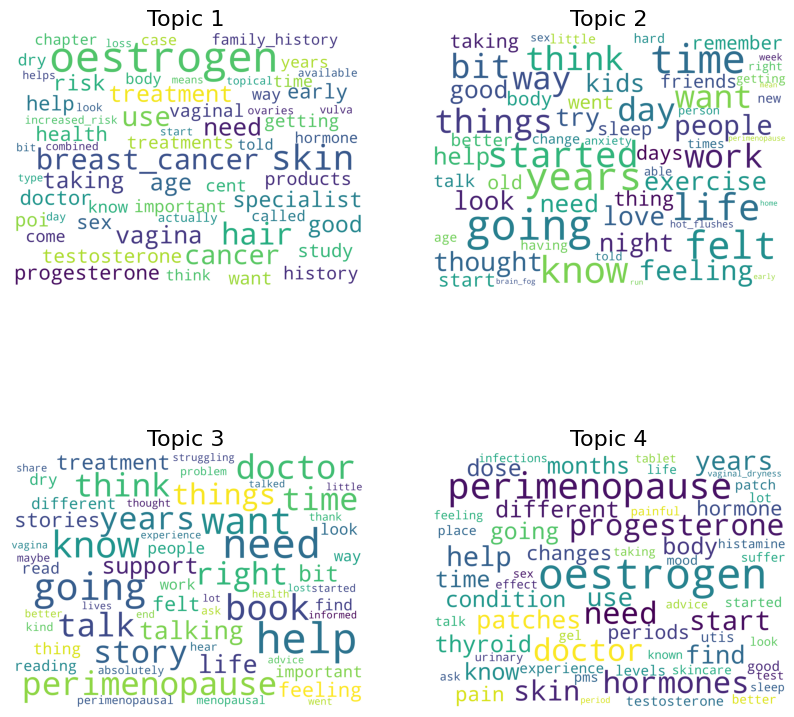

In [52]:
m_vis = Vis(sentiment=m_sentiment_model, lda=m_lda_model)
# chapter sentiments already covered in all books in the shelf 
# - no change (sentiments are the same only topics are changed)

m_vis.treemap_chapter_topic('figures/m_chapter_topic.html')  # treemap of chapter -> topics
m_vis.treemap_topic_sentiment('figures/m_topic_sentment.html')  # treemap of topics -> sentiments
m_vis.pyviz_topics('figures/m_pyvis_topics.html')  # pyVis topic analysis
try:
    m_vis.generate_topics_wordcloud('figures/m_wordclouds.svg')
except:
    print('issue in creating wordclouds')